In [46]:
import pandas as pd

import numpy as np
import pyswarms as ps
from mealpy import ACOR, FloatVar
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Importar los datos

In [47]:
df=pd.read_csv('Aportes.csv',parse_dates=True,index_col='Date')
df_test=pd.read_csv('Aportes_2.csv',parse_dates=True,index_col='Date')
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,23.6,96.0,NARE,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,26.7,95.0,NARE,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,24.0,96.0,NARE,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,0,4.6,22.4,98.0,NARE,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,1,0.0,21.0,98.0,NARE,40.62


# 2. Preprocesamiento

In [48]:
df.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df_test.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal
Date,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62


In [49]:
df['ValorAnterior']=df['AporCaudal'].shift(1)
df_test['ValorAnterior']=df_test['AporCaudal'].shift(1)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62,43.80


In [50]:
df.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df_test.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,40.62,43.80


Reemplazar datos faltantes

In [51]:
df = df.fillna(df.mean())

In [52]:
df.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [53]:
df_test.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      1
dtype: int64

In [54]:
df.shape

(8637, 14)

In [55]:
X = df.drop(columns=['AporCaudal']).values
y = df['AporCaudal'].values

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Función objetivo

||y - Xw||^2_2 + alpha * ||w||^2_2 + beta * ||w||_1

In [11]:
alpha=0.1
beta=0.1

In [12]:
# Funcion objetivo para ACO
def objective_function(w):
    global X, y, alpha, beta
    l2_norm_squared = np.linalg.norm(y - np.dot(X, w))**2
    l2_regularization = alpha * np.linalg.norm(w)**2
    l1_regularization = beta * np.sum(np.abs(w))
    return l2_norm_squared/X.shape[0] + l2_regularization + l1_regularization

In [13]:
def objective_function_2(w):
    global X, y, alpha, beta
    l2_norm_squared = np.linalg.norm(y[:, np.newaxis] - np.dot(X, w.T), axis=0)**2
    l2_regularization = alpha * np.linalg.norm(w, axis=1)**2
    l1_regularization = beta * np.sum(np.abs(w), axis=1)
    return l2_norm_squared/X.shape[0] + l2_regularization + l1_regularization

In [43]:
def plot_pred_train(w):
    df_2 = df.copy()
    df_2['AporCaudal_pred'] = df_2.drop(columns=['AporCaudal']).values.dot(w)

    plt.figure(figsize=(20,6))
    plt.plot(df['AporCaudal'][8100:], label='Aportes Reales',color='blue', alpha=0.5)
    plt.plot(df_2['AporCaudal_pred'][8100:], label='Aportes Pred',color='red', alpha=0.5)
    plt.xlabel('Date')
    plt.ylabel('m3/s')
    plt.legend()
    plt.show()

def plot_pred_test(w):
    df_2 = df_test.copy().drop(columns=['AporCaudal'])
    aporte_real = df_test['AporCaudal'].values
    aporte_pred_dia_anterior = df_2.values.dot(w)
    aporte_pred = np.zeros(len(aporte_real))
    # aporte_pred[0] = 26.057
    for i in range(len(df_2)):
        x = df_2.iloc[i].values
        if i==0:
            x[-1] = 26.057
        else:
            x[-1] = aporte_pred[i-1]
        pred = x.dot(w)
        aporte_pred[i] = pred

    plt.figure(figsize=(20,6))
    plt.plot(aporte_real[0:15], label='Aportes Reales',color='black', alpha=0.7)
    plt.plot(aporte_pred[0:15], label='Aportes Pred',color='red', alpha=0.7)
    plt.plot(aporte_pred_dia_anterior[0:15], label='Aportes Pred Dia Anterior',color='blue', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('m3/s')
    plt.legend()
    plt.show()

# 4. PSO: Optimización por enjambre de particulas

In [15]:
#Definicmos los hiperparametros
options = {'c1': 2, 'c2': 2, 'w':0.9}

#Valores max y min iniciales para las particulas
max_bound = 1*np.ones(13)
min_bound = - max_bound
bounds = (min_bound, max_bound)

In [ ]:
parameters_history = []
cost_history = []
solutions = []
for alpha in [0.01,0.1,1]:
    for beta in [0.01,0.1,1]:
        for c1 in [1,2]:
            for c2 in [1,2]:
                for w in [0.7, 0.8, 0.9]:
                    for n_particles in [100, 200, 500]:
                        options = {'c1': c1, 'c2': c2, 'w':w}
                        #Instanciacion del optimizador
                        optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=13, options=options, bounds=bounds)
                        #Corremos el algoritmo PSO
                        cost, pos = optimizer.optimize(objective_function_2, 100)

                        #Extraemos la mejor solucion
                        solution_PSO = optimizer.swarm.best_pos
                        print(f"Parameters of the best solution : {solution_PSO}")

                        parameters_history.append({'alpha': alpha, 'beta': beta, 'c1': c1, 'c2': c2, 'w': w, 'n_particles': n_particles})
                        cost_history.append(cost)
                        solutions.append(solution_PSO)


2025-03-01 16:51:49,375 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}
pyswarms.single.global_best:   0%|          |0/100

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:51:51,892 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.34591167602736, best pos: [ 0.01831086  0.74841657 -0.6408131  -0.6352363  -0.03685152  0.51268109
  0.23867239  0.39555511 -0.38089898  0.01428805 -0.79854673  0.34100397
  0.86767689]
2025-03-01 16:51:51,909 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.01831086  0.74841657 -0.6408131  -0.6352363  -0.03685152  0.51268109
  0.23867239  0.39555511 -0.38089898  0.01428805 -0.79854673  0.34100397
  0.86767689]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:51:55,049 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.14958433460095, best pos: [-0.16292139 -0.37241379 -0.52949406 -0.77813097  0.09358286  0.55742953
 -0.01780008 -0.53566543 -0.30639846  0.35776064 -0.04581362  0.31947725
  0.87646951]
2025-03-01 16:51:55,061 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.16292139 -0.37241379 -0.52949406 -0.77813097  0.09358286  0.55742953
 -0.01780008 -0.53566543 -0.30639846  0.35776064 -0.04581362  0.31947725
  0.87646951]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:52:04,166 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.2068159629703, best pos: [-0.20582351  0.31338378 -0.29780263 -0.30675593 -0.38128747  0.57274799
  0.14400822 -0.1327994   0.09021883 -0.17283167 -0.99947766  0.3210243
  0.8757118 ]
2025-03-01 16:52:04,188 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.20582351  0.31338378 -0.29780263 -0.30675593 -0.38128747  0.57274799
  0.14400822 -0.1327994   0.09021883 -0.17283167 -0.99947766  0.3210243
  0.8757118 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:52:06,675 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6292387558209, best pos: [ 0.4504031   0.09197403  0.04563629  0.05687822  0.18924673  0.64926372
  0.04562023  0.52225084  0.38043148  0.32954529 -0.72334708  0.32470836
  0.87644939]
2025-03-01 16:52:06,693 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.4504031   0.09197403  0.04563629  0.05687822  0.18924673  0.64926372
  0.04562023  0.52225084  0.38043148  0.32954529 -0.72334708  0.32470836
  0.87644939]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:52:10,293 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.27441954493787, best pos: [-0.01511121  0.40130156 -0.1622062  -0.20057469 -0.31367542  0.32895026
  0.54972967  0.15496302 -0.09765247  0.05237647 -0.98374124  0.3417058
  0.86969396]
2025-03-01 16:52:10,311 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.01511121  0.40130156 -0.1622062  -0.20057469 -0.31367542  0.32895026
  0.54972967  0.15496302 -0.09765247  0.05237647 -0.98374124  0.3417058
  0.86969396]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:52:19,048 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.4631383465711, best pos: [-0.01289911  0.43207426 -0.31176546  0.02433002 -0.06970907  0.43966067
  0.17254417 -0.06164553  0.42124129 -0.26846338 -0.88139095  0.31078609
  0.87964951]
2025-03-01 16:52:19,063 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.01289911  0.43207426 -0.31176546  0.02433002 -0.06970907  0.43966067
  0.17254417 -0.06164553  0.42124129 -0.26846338 -0.88139095  0.31078609
  0.87964951]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:52:21,319 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.7724001773445, best pos: [ 0.25221479 -0.3912026  -0.52376971 -0.11116881 -0.01610403 -0.45047578
  0.55816004 -0.46008167  0.20506663 -0.26671169 -0.18494213  0.31939035
  0.88807656]
2025-03-01 16:52:21,334 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.25221479 -0.3912026  -0.52376971 -0.11116881 -0.01610403 -0.45047578
  0.55816004 -0.46008167  0.20506663 -0.26671169 -0.18494213  0.31939035
  0.88807656]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:52:25,245 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8712630815614, best pos: [-0.07247179  0.09986181  0.08611676  0.55706716 -0.41500007  0.31131559
  0.49371722  0.13312672  0.5924376   0.42575962 -0.83451329  0.30083364
  0.87948698]
2025-03-01 16:52:25,261 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.07247179  0.09986181  0.08611676  0.55706716 -0.41500007  0.31131559
  0.49371722  0.13312672  0.5924376   0.42575962 -0.83451329  0.30083364
  0.87948698]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:52:31,729 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.82192404740806, best pos: [ 0.71410903 -0.91435823 -0.22644691 -0.60933194  0.4683425  -0.50710208
  0.14534982 -0.47969301  0.35110615 -0.97468739 -0.9676254   0.29009761
  0.87152843]
2025-03-01 16:52:31,741 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.71410903 -0.91435823 -0.22644691 -0.60933194  0.4683425  -0.50710208
  0.14534982 -0.47969301  0.35110615 -0.97468739 -0.9676254   0.29009761
  0.87152843]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:52:33,528 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.9516924041302, best pos: [-0.34832874  0.21329121 -0.57894861 -0.53458478  0.04442971  0.97209179
 -0.64859953  0.40692404 -0.46754477 -0.17239518 -0.61929971  0.3045944
  0.87654894]
2025-03-01 16:52:33,544 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.34832874  0.21329121 -0.57894861 -0.53458478  0.04442971  0.97209179
 -0.64859953  0.40692404 -0.46754477 -0.17239518 -0.61929971  0.3045944
  0.87654894]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:52:37,530 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.55925954526526, best pos: [-0.24296208  0.11560513 -0.08221384 -0.56514409  0.61980722  0.29017039
  0.34956566  0.04385384  0.34738822  0.56222472 -0.7181964   0.33680925
  0.86469313]
2025-03-01 16:52:37,551 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.24296208  0.11560513 -0.08221384 -0.56514409  0.61980722  0.29017039
  0.34956566  0.04385384  0.34738822  0.56222472 -0.7181964   0.33680925
  0.86469313]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:52:45,128 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.22767905476724, best pos: [ 0.25754099  0.15926547 -0.89499703 -0.04549322  0.44924274  0.52746963
 -0.59023912  0.30550043  0.02019354  0.02696893 -0.94804418  0.32655116
  0.87452859]
2025-03-01 16:52:45,146 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.25754099  0.15926547 -0.89499703 -0.04549322  0.44924274  0.52746963
 -0.59023912  0.30550043  0.02019354  0.02696893 -0.94804418  0.32655116
  0.87452859]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:52:47,722 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.6056019154131, best pos: [ 0.12220603 -0.02953712 -0.79177227  0.80876698 -0.52633262  0.00612377
 -0.56510822  0.36411403 -0.40439853  0.45884513 -0.57168267  0.35594215
  0.87016876]
2025-03-01 16:52:47,740 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.12220603 -0.02953712 -0.79177227  0.80876698 -0.52633262  0.00612377
 -0.56510822  0.36411403 -0.40439853  0.45884513 -0.57168267  0.35594215
  0.87016876]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:52:50,979 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.16432070997547, best pos: [-0.02708426  0.17658932 -0.82351632  0.57032979 -0.60916872  0.85660574
 -0.31725674  0.52401515 -0.19880127  0.54378487 -0.80764405  0.36526043
  0.87191312]
2025-03-01 16:52:50,994 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.02708426  0.17658932 -0.82351632  0.57032979 -0.60916872  0.85660574
 -0.31725674  0.52401515 -0.19880127  0.54378487 -0.80764405  0.36526043
  0.87191312]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:52:58,120 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.94548520776533, best pos: [ 0.42539363  0.35253025  0.31678098 -0.32857349  0.33924087 -0.01146732
  0.64700799  0.81111482 -0.7649016   0.29961332 -0.75926383  0.32081814
  0.87629578]
2025-03-01 16:52:58,145 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.42539363  0.35253025  0.31678098 -0.32857349  0.33924087 -0.01146732
  0.64700799  0.81111482 -0.7649016   0.29961332 -0.75926383  0.32081814
  0.87629578]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:53:00,575 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.58923744283544, best pos: [ 0.79515142  0.38566677  0.13420368 -0.72836039  0.15958259  0.28787561
  0.75003982 -0.62710047  0.44631838 -0.48799245 -0.91288107  0.36887104
  0.85758725]
2025-03-01 16:53:00,593 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.79515142  0.38566677  0.13420368 -0.72836039  0.15958259  0.28787561
  0.75003982 -0.62710047  0.44631838 -0.48799245 -0.91288107  0.36887104
  0.85758725]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:53:04,650 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.3034998648215, best pos: [-0.53785616 -0.64604039 -0.65488364 -0.19273499  0.85410221 -0.98612202
  0.06851043 -0.17348021  0.33268057 -0.02691516 -0.2328469   0.31855855
  0.87176   ]
2025-03-01 16:53:04,663 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.53785616 -0.64604039 -0.65488364 -0.19273499  0.85410221 -0.98612202
  0.06851043 -0.17348021  0.33268057 -0.02691516 -0.2328469   0.31855855
  0.87176   ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:53:13,186 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.94383812416976, best pos: [ 0.07751737  0.14273104 -0.83207641 -0.12735003  0.7742441  -0.21197335
 -0.13591625 -0.05378156  0.69652913 -0.42885575 -0.9795597   0.28992694
  0.88820654]
2025-03-01 16:53:13,204 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.07751737  0.14273104 -0.83207641 -0.12735003  0.7742441  -0.21197335
 -0.13591625 -0.05378156  0.69652913 -0.42885575 -0.9795597   0.28992694
  0.88820654]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:53:14,946 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.68050239864704, best pos: [-0.06006177  0.38162944 -0.71165724  0.38584297 -0.305503    0.40928064
  0.5746738   0.07193748 -0.6264716   0.9156406  -0.61600853  0.31119943
  0.87665284]
2025-03-01 16:53:14,959 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.06006177  0.38162944 -0.71165724  0.38584297 -0.305503    0.40928064
  0.5746738   0.07193748 -0.6264716   0.9156406  -0.61600853  0.31119943
  0.87665284]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:53:19,423 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.29583586643486, best pos: [-0.11458484 -0.33890365 -0.01009084 -0.42923729 -0.26993997  0.16682705
  0.0816382  -0.35764487  0.44345817 -0.44820964 -0.94312929  0.31616189
  0.87351915]
2025-03-01 16:53:19,438 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.11458484 -0.33890365 -0.01009084 -0.42923729 -0.26993997  0.16682705
  0.0816382  -0.35764487  0.44345817 -0.44820964 -0.94312929  0.31616189
  0.87351915]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:53:26,434 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.2010034922721, best pos: [ 0.07232254  0.33783988 -0.50108583 -0.55174949  0.14992352  0.14820464
  0.02905646  0.18729478 -0.02470043 -0.32408797 -0.95301612  0.3233421
  0.87104112]
2025-03-01 16:53:26,447 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.07232254  0.33783988 -0.50108583 -0.55174949  0.14992352  0.14820464
  0.02905646  0.18729478 -0.02470043 -0.32408797 -0.95301612  0.3233421
  0.87104112]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:53:28,202 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.25957108613517, best pos: [ 0.34438143  0.261165   -0.85415761  0.68152962 -0.74598171 -0.46756629
  0.50866164  0.18399171 -0.23143274 -0.27824244 -0.35089547  0.33264034
  0.86859707]
2025-03-01 16:53:28,247 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.34438143  0.261165   -0.85415761  0.68152962 -0.74598171 -0.46756629
  0.50866164  0.18399171 -0.23143274 -0.27824244 -0.35089547  0.33264034
  0.86859707]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:53:32,063 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.249562909516, best pos: [ 0.0815575   0.20031239 -0.88372192 -0.48070976  0.46575002 -0.23250859
 -0.41687433  0.2807813  -0.26201896 -0.58723035 -0.89555422  0.33425382
  0.87253178]
2025-03-01 16:53:32,079 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.0815575   0.20031239 -0.88372192 -0.48070976  0.46575002 -0.23250859
 -0.41687433  0.2807813  -0.26201896 -0.58723035 -0.89555422  0.33425382
  0.87253178]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:53:38,713 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.5040982774101, best pos: [-0.31526254 -0.04681891 -0.78378109 -0.43485238  0.48862079 -0.19827054
 -0.21641458 -0.24666272  0.21084654  0.06394379 -0.89208518  0.3572845
  0.86203365]
2025-03-01 16:53:38,729 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.31526254 -0.04681891 -0.78378109 -0.43485238  0.48862079 -0.19827054
 -0.21641458 -0.24666272  0.21084654  0.06394379 -0.89208518  0.3572845
  0.86203365]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:53:40,568 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.7734120140181, best pos: [ 0.56990472 -0.33947659 -0.41808278  0.28037664  0.32755215  0.39545191
 -0.12507062  0.1584085   0.41001236  0.26618874 -0.73530408  0.26787231
  0.89131643]
2025-03-01 16:53:40,581 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.56990472 -0.33947659 -0.41808278  0.28037664  0.32755215  0.39545191
 -0.12507062  0.1584085   0.41001236  0.26618874 -0.73530408  0.26787231
  0.89131643]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:53:44,667 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.38758758152136, best pos: [-0.88143066  0.10315892 -0.14164084  0.06557566 -0.14435254 -0.31114822
 -0.38470884  0.15528298 -0.37521505  0.14717167 -0.82536247  0.37015605
  0.87225169]
2025-03-01 16:53:44,690 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.88143066  0.10315892 -0.14164084  0.06557566 -0.14435254 -0.31114822
 -0.38470884  0.15528298 -0.37521505  0.14717167 -0.82536247  0.37015605
  0.87225169]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:53:53,435 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6357033749106, best pos: [ 0.15072017 -0.88098735  0.61615976  0.51011885 -0.47171501  0.39234241
  0.50619211 -0.38270999  0.49727687  0.69160608 -0.9954984   0.33551449
  0.87242383]
2025-03-01 16:53:53,454 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.15072017 -0.88098735  0.61615976  0.51011885 -0.47171501  0.39234241
  0.50619211 -0.38270999  0.49727687  0.69160608 -0.9954984   0.33551449
  0.87242383]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:53:55,951 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.03761659426726, best pos: [-0.43803963 -0.25030376 -0.53890933  0.07874805 -0.52081255  0.22178874
  0.40244323 -0.16730878 -0.38649637  0.53609291 -0.84961293  0.37351173
  0.86067046]
2025-03-01 16:53:55,960 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.43803963 -0.25030376 -0.53890933  0.07874805 -0.52081255  0.22178874
  0.40244323 -0.16730878 -0.38649637  0.53609291 -0.84961293  0.37351173
  0.86067046]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:00,170 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.01316332859926, best pos: [-0.67057344 -0.08225597 -0.90804261  0.44982768  0.1382942  -0.94627231
 -0.22689423 -0.26390271  0.1870241  -0.59662551 -0.85258455  0.33919547
  0.88317325]
2025-03-01 16:54:00,197 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.67057344 -0.08225597 -0.90804261  0.44982768  0.1382942  -0.94627231
 -0.22689423 -0.26390271  0.1870241  -0.59662551 -0.85258455  0.33919547
  0.88317325]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:09,420 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.5427894972442, best pos: [-0.27702789  0.07486386 -0.570274   -0.84268678 -0.38400201 -0.14056581
  0.84082625 -0.78380487  0.40304264 -0.86433195 -0.89049074  0.3331835
  0.87142686]
2025-03-01 16:54:09,434 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.27702789  0.07486386 -0.570274   -0.84268678 -0.38400201 -0.14056581
  0.84082625 -0.78380487  0.40304264 -0.86433195 -0.89049074  0.3331835
  0.87142686]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:54:11,476 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.8426071523893, best pos: [ 0.44716456 -0.44813448 -0.26985129  0.04523398  0.29649175 -0.65983336
  0.04482271  0.03255712  0.50579335 -0.90562795 -0.49846748  0.36432324
  0.85136996]
2025-03-01 16:54:11,486 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.44716456 -0.44813448 -0.26985129  0.04523398  0.29649175 -0.65983336
  0.04482271  0.03255712  0.50579335 -0.90562795 -0.49846748  0.36432324
  0.85136996]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:14,771 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.21029303537154, best pos: [ 0.62544176 -0.52596605 -0.63426882 -0.17187684 -0.50732419  0.57196936
  0.49229266 -0.59159042  0.09794254 -0.1947082  -0.99701765  0.28081558
  0.87305263]
2025-03-01 16:54:14,785 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.62544176 -0.52596605 -0.63426882 -0.17187684 -0.50732419  0.57196936
  0.49229266 -0.59159042  0.09794254 -0.1947082  -0.99701765  0.28081558
  0.87305263]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:21,827 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.98836814015976, best pos: [-0.27545845  0.29726105 -0.1129449   0.33631215 -0.02848343  0.32238074
 -0.86930496  0.99284306  0.28289993 -0.18607693 -0.57788173  0.30515531
  0.87491703]
2025-03-01 16:54:21,844 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.27545845  0.29726105 -0.1129449   0.33631215 -0.02848343  0.32238074
 -0.86930496  0.99284306  0.28289993 -0.18607693 -0.57788173  0.30515531
  0.87491703]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:54:24,012 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.8736156386836, best pos: [ 0.54456643 -0.06540777  0.76218466 -0.25604997  0.38752995 -0.17405328
  0.48420349  0.68310004 -0.0537569  -0.09282554 -0.81966333  0.34398331
  0.8866595 ]
2025-03-01 16:54:24,027 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.54456643 -0.06540777  0.76218466 -0.25604997  0.38752995 -0.17405328
  0.48420349  0.68310004 -0.0537569  -0.09282554 -0.81966333  0.34398331
  0.8866595 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:27,844 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.30993498649474, best pos: [ 0.52684115 -0.86586531  0.1858933  -0.34927905 -0.20164702  0.14929013
  0.54855501  0.41620923 -0.74957356  0.67517493 -0.40229674  0.31237552
  0.88009812]
2025-03-01 16:54:27,855 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.52684115 -0.86586531  0.1858933  -0.34927905 -0.20164702  0.14929013
  0.54855501  0.41620923 -0.74957356  0.67517493 -0.40229674  0.31237552
  0.88009812]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:34,724 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.4995729780391, best pos: [ 0.31060627 -0.96602102 -0.92073324  0.57108304  0.74806375 -0.77986721
  0.4266886  -0.63011717  0.69323358 -0.05845589 -0.41013     0.29062444
  0.87876333]
2025-03-01 16:54:34,735 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.31060627 -0.96602102 -0.92073324  0.57108304  0.74806375 -0.77986721
  0.4266886  -0.63011717  0.69323358 -0.05845589 -0.41013     0.29062444
  0.87876333]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:36,313 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.9537345797753, best pos: [ 0.10922504  0.14717863 -0.27353062 -0.58204963  0.60323815  0.08352121
  0.41798486 -0.2142663   0.37401412 -0.21218157 -0.74964825  0.35679733
  0.86573465]
2025-03-01 16:54:36,323 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.10922504  0.14717863 -0.27353062 -0.58204963  0.60323815  0.08352121
  0.41798486 -0.2142663   0.37401412 -0.21218157 -0.74964825  0.35679733
  0.86573465]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:39,260 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8179241082835, best pos: [-0.23367963 -0.0341893  -0.38599145  0.29507471 -0.15929743 -0.33151984
  0.30444391 -0.24599419  0.25875439 -0.2668376  -0.83647977  0.32556517
  0.87400174]
2025-03-01 16:54:39,273 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.23367963 -0.0341893  -0.38599145  0.29507471 -0.15929743 -0.33151984
  0.30444391 -0.24599419  0.25875439 -0.2668376  -0.83647977  0.32556517
  0.87400174]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:46,431 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.5359986945558, best pos: [-0.0164305   0.06121891 -0.737887   -0.01531557 -0.0548533   0.17716639
 -0.0143606   0.01108724 -0.2434287   0.09555632 -0.98881396  0.32217282
  0.86921164]
2025-03-01 16:54:46,444 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.0164305   0.06121891 -0.737887   -0.01531557 -0.0548533   0.17716639
 -0.0143606   0.01108724 -0.2434287   0.09555632 -0.98881396  0.32217282
  0.86921164]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:54:48,004 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.39746606751567, best pos: [-0.18040057  0.37014758 -0.24900343 -0.34472345  0.1421953  -0.05328869
  0.65279348  0.06410195  0.08769478  0.44564879  0.199476    0.35465728
  0.87345555]
2025-03-01 16:54:48,016 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.18040057  0.37014758 -0.24900343 -0.34472345  0.1421953  -0.05328869
  0.65279348  0.06410195  0.08769478  0.44564879  0.199476    0.35465728
  0.87345555]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:50,697 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.9032745198653, best pos: [-0.33058605  0.26164833 -0.1759461   0.01463562 -0.47347377 -0.11305798
  0.41973508  0.17317895 -0.19514429 -0.20714808 -0.8936377   0.3487788
  0.87151575]
2025-03-01 16:54:50,707 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.33058605  0.26164833 -0.1759461   0.01463562 -0.47347377 -0.11305798
  0.41973508  0.17317895 -0.19514429 -0.20714808 -0.8936377   0.3487788
  0.87151575]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:57,058 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.60416868444713, best pos: [ 0.23085957  0.06661643 -0.39486752 -0.18946406  0.02873902  0.18388963
  0.25122539  0.04405915 -0.11755078 -0.10890407 -0.88636725  0.32189111
  0.87260512]
2025-03-01 16:54:57,069 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.23085957  0.06661643 -0.39486752 -0.18946406  0.02873902  0.18388963
  0.25122539  0.04405915 -0.11755078 -0.10890407 -0.88636725  0.32189111
  0.87260512]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:54:58,527 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.453847142821, best pos: [-0.68560514  0.75449164 -0.34124951 -0.43310098  0.04736491 -0.4169584
  0.16436732  0.7259288   0.12819733 -0.45019779 -0.64186111  0.3205569
  0.86373459]
2025-03-01 16:54:58,536 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.68560514  0.75449164 -0.34124951 -0.43310098  0.04736491 -0.4169584
  0.16436732  0.7259288   0.12819733 -0.45019779 -0.64186111  0.3205569
  0.86373459]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:01,703 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.42697045065665, best pos: [ 0.31175856 -0.58343737 -0.54868539  0.50736646  0.51376872 -0.5720415
  0.14697389 -0.18311703 -0.2527274   0.5650128  -0.64369575  0.32250826
  0.87336079]
2025-03-01 16:55:01,713 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.31175856 -0.58343737 -0.54868539  0.50736646  0.51376872 -0.5720415
  0.14697389 -0.18311703 -0.2527274   0.5650128  -0.64369575  0.32250826
  0.87336079]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:08,106 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.1435614121781, best pos: [-0.90050185  0.10395144  0.14584488 -0.38890498 -0.19290094 -0.31231087
  0.10868193  0.17929228 -0.09993142  0.19643487 -0.52365274  0.32301156
  0.87793223]
2025-03-01 16:55:08,119 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.90050185  0.10395144  0.14584488 -0.38890498 -0.19290094 -0.31231087
  0.10868193  0.17929228 -0.09993142  0.19643487 -0.52365274  0.32301156
  0.87793223]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:09,564 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.9477447738734, best pos: [ 0.05230474  0.02003385 -0.78301716 -0.06873562  0.42304569 -0.48348041
  0.41430691  0.07947759 -0.28256216  0.17582942 -0.81802985  0.35428608
  0.86256121]
2025-03-01 16:55:09,573 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.05230474  0.02003385 -0.78301716 -0.06873562  0.42304569 -0.48348041
  0.41430691  0.07947759 -0.28256216  0.17582942 -0.81802985  0.35428608
  0.86256121]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:12,047 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8326354475814, best pos: [ 0.20829879 -0.46038243 -0.01565273  0.02644164  0.64588617  0.05049608
  0.31024296 -0.29940929  0.50201329  0.56554575 -0.92500188  0.32039457
  0.87278298]
2025-03-01 16:55:12,055 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.20829879 -0.46038243 -0.01565273  0.02644164  0.64588617  0.05049608
  0.31024296 -0.29940929  0.50201329  0.56554575 -0.92500188  0.32039457
  0.87278298]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:17,721 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8791368362717, best pos: [-0.34362133  0.58780888 -0.79297265 -0.44404259  0.90347981 -0.57125055
 -0.07382732  0.45182026 -0.08495724 -0.03852307 -0.86831988  0.33366981
  0.87402235]
2025-03-01 16:55:17,731 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.34362133  0.58780888 -0.79297265 -0.44404259  0.90347981 -0.57125055
 -0.07382732  0.45182026 -0.08495724 -0.03852307 -0.86831988  0.33366981
  0.87402235]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:19,137 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.24398075541325, best pos: [-0.13207397 -0.5758962  -0.98498125  0.71954744 -0.56208897  0.34180813
 -0.06856863 -0.20053694 -0.45896803  0.43385536 -0.70627934  0.32647755
  0.87411864]
2025-03-01 16:55:19,149 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.13207397 -0.5758962  -0.98498125  0.71954744 -0.56208897  0.34180813
 -0.06856863 -0.20053694 -0.45896803  0.43385536 -0.70627934  0.32647755
  0.87411864]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:21,653 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.28972961027125, best pos: [ 0.04795819 -0.06061035 -0.90024408  0.35986266  0.15921756  0.08256304
  0.33887863  0.03218933 -0.12630437  0.17175339 -0.62013857  0.34644815
  0.87403319]
2025-03-01 16:55:21,661 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.04795819 -0.06061035 -0.90024408  0.35986266  0.15921756  0.08256304
  0.33887863  0.03218933 -0.12630437  0.17175339 -0.62013857  0.34644815
  0.87403319]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:27,064 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.90944878861274, best pos: [ 0.16820731 -0.19755743 -0.05774463  0.05785448  0.11074628  0.07914867
  0.11229096  0.18519369  0.12770169  0.46428691 -0.96395431  0.34844233
  0.86881659]
2025-03-01 16:55:27,074 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.16820731 -0.19755743 -0.05774463  0.05785448  0.11074628  0.07914867
  0.11229096  0.18519369  0.12770169  0.46428691 -0.96395431  0.34844233
  0.86881659]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:55:28,609 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.8875970667481, best pos: [ 0.28963089  0.21919655 -0.59994795 -0.4371645   0.83939345  0.2448349
 -0.25219519 -0.64428436  0.56152772 -0.71339097 -0.73093654  0.35672192
  0.86390505]
2025-03-01 16:55:28,618 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.28963089  0.21919655 -0.59994795 -0.4371645   0.83939345  0.2448349
 -0.25219519 -0.64428436  0.56152772 -0.71339097 -0.73093654  0.35672192
  0.86390505]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:55:31,297 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.08837973993957, best pos: [ 0.01635243  0.03846379 -0.9926368   0.32030202  0.46942882  0.83543074
 -0.41532698  0.62237281 -0.78812393  0.63885154 -0.86869448  0.30929102
  0.8880211 ]
2025-03-01 16:55:31,307 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.01635243  0.03846379 -0.9926368   0.32030202  0.46942882  0.83543074
 -0.41532698  0.62237281 -0.78812393  0.63885154 -0.86869448  0.30929102
  0.8880211 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:55:36,751 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.53300640061775, best pos: [-0.47652191  0.0186446  -0.07868002 -0.42112487  0.14077653  0.15412342
 -0.64319216 -0.29437321 -0.06714055  0.19180027 -0.98610653  0.34538448
  0.86619964]
2025-03-01 16:55:36,761 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.47652191  0.0186446  -0.07868002 -0.42112487  0.14077653  0.15412342
 -0.64319216 -0.29437321 -0.06714055  0.19180027 -0.98610653  0.34538448
  0.86619964]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:38,272 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6048010862604, best pos: [-4.35013198e-02 -7.42432577e-02 -2.02038197e-01 -5.33006165e-01
  8.36194720e-04  2.95386437e-01  1.56844713e-01 -1.53279059e-01
 -1.17499685e-01 -2.02013892e-03 -8.09168605e-01  3.33615196e-01
  8.72582711e-01]
2025-03-01 16:55:38,282 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-4.35013198e-02 -7.42432577e-02 -2.02038197e-01 -5.33006165e-01
  8.36194720e-04  2.95386437e-01  1.56844713e-01 -1.53279059e-01
 -1.17499685e-01 -2.02013892e-03 -8.09168605e-01  3.33615196e-01
  8.72582711e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:40,791 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.9782732939193, best pos: [ 0.18582484  0.11123491 -0.24865159 -0.27722379 -0.39050269  0.17691481
 -0.11654727  0.15195361 -0.12364334 -0.60461725 -0.79780051  0.34546876
  0.87169298]
2025-03-01 16:55:40,801 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.18582484  0.11123491 -0.24865159 -0.27722379 -0.39050269  0.17691481
 -0.11654727  0.15195361 -0.12364334 -0.60461725 -0.79780051  0.34546876
  0.87169298]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:46,330 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.7077184284568, best pos: [-0.29123087 -0.01083992 -0.5534674  -0.72759187  0.42513384  0.55349093
  0.23312528 -0.67088192 -0.09699507  0.50110317 -0.94499845  0.33377255
  0.87377636]
2025-03-01 16:55:46,342 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.29123087 -0.01083992 -0.5534674  -0.72759187  0.42513384  0.55349093
  0.23312528 -0.67088192 -0.09699507  0.50110317 -0.94499845  0.33377255
  0.87377636]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:47,778 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.11251771036854, best pos: [-0.34792601 -0.86631734 -0.2619713  -0.20018929 -0.81763336  0.70819372
 -0.11958841 -0.62975793 -0.12092587  0.30817667 -0.91752047  0.32787054
  0.86459649]
2025-03-01 16:55:47,788 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.34792601 -0.86631734 -0.2619713  -0.20018929 -0.81763336  0.70819372
 -0.11958841 -0.62975793 -0.12092587  0.30817667 -0.91752047  0.32787054
  0.86459649]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:50,310 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.1190919069223, best pos: [-0.99651574  0.43847041 -0.07857161 -0.68982694  0.10862012  0.41997837
 -0.41612417  0.41437366 -0.16006985  0.43013276 -0.48493556  0.32890962
  0.87256312]
2025-03-01 16:55:50,320 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.99651574  0.43847041 -0.07857161 -0.68982694  0.10862012  0.41997837
 -0.41612417  0.41437366 -0.16006985  0.43013276 -0.48493556  0.32890962
  0.87256312]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:55:56,036 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.91817935717387, best pos: [ 0.10305634  0.12482984 -0.28350179 -0.2053501  -0.15482595  0.38949713
  0.2141047   0.31588674  0.10357671  0.03870754 -0.78397161  0.31465092
  0.8724476 ]
2025-03-01 16:55:56,048 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.10305634  0.12482984 -0.28350179 -0.2053501  -0.15482595  0.38949713
  0.2141047   0.31588674  0.10357671  0.03870754 -0.78397161  0.31465092
  0.8724476 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:55:57,539 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.99414511618284, best pos: [-0.53404682  0.47261512 -0.88035763 -0.65634277 -0.94864566  0.05709985
 -0.4050778   0.11641801 -0.9240521  -0.25513537 -0.66938682  0.32262469
  0.86265914]
2025-03-01 16:55:57,550 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.53404682  0.47261512 -0.88035763 -0.65634277 -0.94864566  0.05709985
 -0.4050778   0.11641801 -0.9240521  -0.25513537 -0.66938682  0.32262469
  0.86265914]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:56:00,104 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.814372010505, best pos: [-0.4790667  -0.44848352  0.50384771 -0.51783251  0.83434693  0.60739694
 -0.20092048  0.17376514  0.80583939  0.7185242  -0.42850914  0.32351704
  0.86853841]
2025-03-01 16:56:00,119 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.4790667  -0.44848352  0.50384771 -0.51783251  0.83434693  0.60739694
 -0.20092048  0.17376514  0.80583939  0.7185242  -0.42850914  0.32351704
  0.86853841]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:56:06,412 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.34714265587814, best pos: [-0.34238652  0.26521329  0.823316   -0.54624985 -0.09219589  0.38023681
 -0.0962896   0.55184792 -0.08129845  0.20763206 -0.86542631  0.3163182
  0.87310201]
2025-03-01 16:56:06,424 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.34238652  0.26521329  0.823316   -0.54624985 -0.09219589  0.38023681
 -0.0962896   0.55184792 -0.08129845  0.20763206 -0.86542631  0.3163182
  0.87310201]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:56:07,932 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.09663636148696, best pos: [-0.30422591  0.47876806  0.01131025 -0.2513418  -0.40865263  0.48849167
  0.57272399 -0.57469142  0.50518474  0.11100086 -0.75340924  0.34144116
  0.87314216]
2025-03-01 16:56:07,945 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.30422591  0.47876806  0.01131025 -0.2513418  -0.40865263  0.48849167
  0.57272399 -0.57469142  0.50518474  0.11100086 -0.75340924  0.34144116
  0.87314216]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:56:10,504 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.0959848936392, best pos: [ 0.15913041 -0.32939848  0.27585848  0.57153981 -0.21254906  0.48987789
 -0.43486847  0.3598247   0.65558264  0.00828857 -0.99634386  0.33441986
  0.87413267]
2025-03-01 16:56:10,514 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.15913041 -0.32939848  0.27585848  0.57153981 -0.21254906  0.48987789
 -0.43486847  0.3598247   0.65558264  0.00828857 -0.99634386  0.33441986
  0.87413267]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:56:15,901 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8128217495524, best pos: [ 0.5744698  -0.6734604  -0.02748714 -0.15279159 -0.09825215  0.01848549
  0.32745631 -0.00448546 -0.10821319 -0.28453644 -0.95693152  0.33093858
  0.86597029]
2025-03-01 16:56:15,911 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.5744698  -0.6734604  -0.02748714 -0.15279159 -0.09825215  0.01848549
  0.32745631 -0.00448546 -0.10821319 -0.28453644 -0.95693152  0.33093858
  0.86597029]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 16:56:17,613 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.05647162834197, best pos: [ 0.37738576  0.01417984 -0.89075442 -0.8112774  -0.26369624 -0.16749378
 -0.2352726   0.7339498  -0.24334424 -0.3417236  -0.17880141  0.3369497
  0.87885048]
2025-03-01 16:56:17,624 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.37738576  0.01417984 -0.89075442 -0.8112774  -0.26369624 -0.16749378
 -0.2352726   0.7339498  -0.24334424 -0.3417236  -0.17880141  0.3369497
  0.87885048]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:56:20,065 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.6663079619586, best pos: [ 0.45959194 -0.96131331 -0.08506181 -0.03112437 -0.78643359  0.51544353
 -0.15156193 -0.28946946 -0.04921775 -0.10009691 -0.70041085  0.3516026
  0.85576504]
2025-03-01 16:56:20,074 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.45959194 -0.96131331 -0.08506181 -0.03112437 -0.78643359  0.51544353
 -0.15156193 -0.28946946 -0.04921775 -0.10009691 -0.70041085  0.3516026
  0.85576504]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:56:25,659 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.1844990896585, best pos: [ 0.06897763 -0.95955252 -0.17201433 -0.40561238  0.91099594 -0.18974253
 -0.78292277  0.35781894 -0.15131701 -0.28928567 -0.98787752  0.35254215
  0.86670232]
2025-03-01 16:56:25,670 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.06897763 -0.95955252 -0.17201433 -0.40561238  0.91099594 -0.18974253
 -0.78292277  0.35781894 -0.15131701 -0.28928567 -0.98787752  0.35254215
  0.86670232]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:56:27,111 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.55987635728644, best pos: [-0.28093716 -0.35968078 -0.49382322 -0.07859865  0.99115213 -0.49043628
 -0.15570268  0.12381449  0.50411565 -0.4013739  -0.61467174  0.33692319
  0.87553172]
2025-03-01 16:56:27,121 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.28093716 -0.35968078 -0.49382322 -0.07859865  0.99115213 -0.49043628
 -0.15570268  0.12381449  0.50411565 -0.4013739  -0.61467174  0.33692319
  0.87553172]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:56:29,690 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.5499834408936, best pos: [-1.09878132e-04  3.12486223e-01  9.04552973e-01 -9.72735137e-01
 -7.26804642e-01  2.86170657e-01  5.22972127e-01  6.34541522e-01
 -4.12271502e-01 -5.21133824e-01 -5.36263484e-01  3.24397580e-01
  8.72046614e-01]
2025-03-01 16:56:29,699 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-1.09878132e-04  3.12486223e-01  9.04552973e-01 -9.72735137e-01
 -7.26804642e-01  2.86170657e-01  5.22972127e-01  6.34541522e-01
 -4.12271502e-01 -5.21133824e-01 -5.36263484e-01  3.24397580e-01
  8.72046614e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:56:35,151 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.519525907045, best pos: [ 0.40973679 -0.18650775 -0.22896865  0.76605518 -0.3900546  -0.0931774
  0.74684088  0.12399979 -0.74284357  0.4424693  -0.96519103  0.34660982
  0.87240928]
2025-03-01 16:56:35,162 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.40973679 -0.18650775 -0.22896865  0.76605518 -0.3900546  -0.0931774
  0.74684088  0.12399979 -0.74284357  0.4424693  -0.96519103  0.34660982
  0.87240928]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 16:56:36,593 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.58317961612124, best pos: [-0.00894037 -0.18895152 -0.04814677  0.20090346  0.00096783 -0.04411419
  0.13649461  0.04692283  0.25325515  0.04950975 -0.4897876   0.31062508
  0.88180481]
2025-03-01 16:56:36,602 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.00894037 -0.18895152 -0.04814677  0.20090346  0.00096783 -0.04411419
  0.13649461  0.04692283  0.25325515  0.04950975 -0.4897876   0.31062508
  0.88180481]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 16:56:39,062 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.15395619931667, best pos: [-0.04957787 -0.00146222  0.04350383 -0.08330064  0.02470922 -0.02365078
  0.05291781 -0.00814624  0.20087069  0.08592658 -0.53130467  0.32636891
  0.87290027]
2025-03-01 16:56:39,071 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.04957787 -0.00146222  0.04350383 -0.08330064  0.02470922 -0.02365078
  0.05291781 -0.00814624  0.20087069  0.08592658 -0.53130467  0.32636891
  0.87290027]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 16:56:44,749 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.0828108525797, best pos: [ 7.45748062e-04 -7.12823481e-02 -1.50099661e-01 -3.01027553e-02
  1.28558674e-03  1.17408031e-02 -5.15674304e-04 -1.67468600e-01
  3.93572878e-03 -7.90981275e-04 -5.02985595e-01  3.29447947e-01
  8.74539715e-01]
2025-03-01 16:56:44,763 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 7.45748062e-04 -7.12823481e-02 -1.50099661e-01 -3.01027553e-02
  1.28558674e-03  1.17408031e-02 -5.15674304e-04 -1.67468600e-01
  3.93572878e-03 -7.90981275e-04 -5.02985595e-01  3.29447947e-01
  8.74539715e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 16:56:46,785 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.64197107480646, best pos: [-0.00180454 -0.5729531  -0.1360034   0.05903009 -0.2892737   0.2592081
  0.17172756 -0.01655234 -0.06846686  0.13394101  0.14761542  0.27065726
  0.88913897]
2025-03-01 16:56:46,797 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.00180454 -0.5729531  -0.1360034   0.05903009 -0.2892737   0.2592081
  0.17172756 -0.01655234 -0.06846686  0.13394101  0.14761542  0.27065726
  0.88913897]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 16:56:49,571 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.4078896568894, best pos: [ 6.01189890e-04 -1.18921263e-01  9.08354733e-03 -2.07780570e-01
  1.51083983e-01 -1.53398273e-02  1.39347561e-02  1.84514139e-01
  5.83036165e-02  1.12993517e-01 -3.32285827e-01  3.14175254e-01
  8.78800941e-01]
2025-03-01 16:56:49,579 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 6.01189890e-04 -1.18921263e-01  9.08354733e-03 -2.07780570e-01
  1.51083983e-01 -1.53398273e-02  1.39347561e-02  1.84514139e-01
  5.83036165e-02  1.12993517e-01 -3.32285827e-01  3.14175254e-01
  8.78800941e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 16:56:55,587 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.6474124330865, best pos: [ 0.08876819 -0.00802721 -0.01266902 -0.03669665 -0.02552118  0.347822
  0.45414222 -0.00148095  0.18751766  0.00789445 -0.52368248  0.32528332
  0.87620136]
2025-03-01 16:56:55,599 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.08876819 -0.00802721 -0.01266902 -0.03669665 -0.02552118  0.347822
  0.45414222 -0.00148095  0.18751766  0.00789445 -0.52368248  0.32528332
  0.87620136]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:56:57,176 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.3678245280431, best pos: [-0.11768066 -0.20041974 -0.13227556  0.33568792  0.13358421 -0.57083502
  0.18081472  0.52680793  0.01128081 -0.10027674 -0.42369972  0.32593417
  0.88610203]
2025-03-01 16:56:57,189 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.11768066 -0.20041974 -0.13227556  0.33568792  0.13358421 -0.57083502
  0.18081472  0.52680793  0.01128081 -0.10027674 -0.42369972  0.32593417
  0.88610203]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:56:59,746 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.4894853086706, best pos: [ 0.15805958 -0.57037149 -0.0826954   0.49225534  0.06231233 -0.21341531
  0.28498002 -0.10054695  0.42604102 -0.18389726 -0.09033862  0.31843977
  0.87922088]
2025-03-01 16:56:59,754 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.15805958 -0.57037149 -0.0826954   0.49225534  0.06231233 -0.21341531
  0.28498002 -0.10054695  0.42604102 -0.18389726 -0.09033862  0.31843977
  0.87922088]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:57:06,315 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.7270600204082, best pos: [ 0.19846297  0.24962959 -0.00632568 -0.00531579  0.3836275  -0.22758276
  0.25398235  0.14737101  0.35005583 -0.02148958 -0.21283362  0.317207
  0.88067655]
2025-03-01 16:57:06,325 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.19846297  0.24962959 -0.00632568 -0.00531579  0.3836275  -0.22758276
  0.25398235  0.14737101  0.35005583 -0.02148958 -0.21283362  0.317207
  0.88067655]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 16:57:07,845 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.02199202494864, best pos: [ 0.0038506  -0.37235993  0.00827674 -0.02954732  0.2102423  -0.05529205
  0.30037244  0.02293669  0.02318428  0.0877099  -0.30042104  0.35949898
  0.87044944]
2025-03-01 16:57:07,855 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.0038506  -0.37235993  0.00827674 -0.02954732  0.2102423  -0.05529205
  0.30037244  0.02293669  0.02318428  0.0877099  -0.30042104  0.35949898
  0.87044944]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 16:57:10,522 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.35738660955263, best pos: [-0.20933227 -0.01933282 -0.05634463  0.00418177 -0.05027219  0.00394455
  0.09151255 -0.01886171 -0.0942623   0.13859485 -0.40934973  0.3176713
  0.87195981]
2025-03-01 16:57:10,532 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.20933227 -0.01933282 -0.05634463  0.00418177 -0.05027219  0.00394455
  0.09151255 -0.01886171 -0.0942623   0.13859485 -0.40934973  0.3176713
  0.87195981]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 16:57:16,125 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.161316822687, best pos: [-0.01216648 -0.0199175  -0.0402357  -0.08771733 -0.00829358  0.06659308
  0.06853301  0.08221901  0.12860067  0.12515736 -0.6575415   0.33027086
  0.86691381]
2025-03-01 16:57:16,146 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.01216648 -0.0199175  -0.0402357  -0.08771733 -0.00829358  0.06659308
  0.06853301  0.08221901  0.12860067  0.12515736 -0.6575415   0.33027086
  0.86691381]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:57:17,645 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.7235147666291, best pos: [ 0.08699505  0.18628438 -0.61808913 -0.40612643  0.04925896 -0.07396607
  0.16507096 -0.01517127 -0.07002627 -0.34620311 -0.95478415  0.36685428
  0.86550653]
2025-03-01 16:57:17,653 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.08699505  0.18628438 -0.61808913 -0.40612643  0.04925896 -0.07396607
  0.16507096 -0.01517127 -0.07002627 -0.34620311 -0.95478415  0.36685428
  0.86550653]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:57:20,191 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.435124701239, best pos: [-0.27790474  0.21448692  0.06940319  0.05292308 -0.45302458 -0.03252672
 -0.21241764  0.66611054 -0.34656769 -0.21123059 -0.16167983  0.31216127
  0.87537792]
2025-03-01 16:57:20,201 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.27790474  0.21448692  0.06940319  0.05292308 -0.45302458 -0.03252672
 -0.21241764  0.66611054 -0.34656769 -0.21123059 -0.16167983  0.31216127
  0.87537792]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 16:57:26,503 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.09684804646247, best pos: [ 0.15677209 -0.00720452  0.20180941 -0.05003071 -0.09583563  0.20021356
 -0.02587679  0.0976378  -0.02454719 -0.14812898 -0.48603664  0.34532738
  0.86729418]
2025-03-01 16:57:26,514 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.15677209 -0.00720452  0.20180941 -0.05003071 -0.09583563  0.20021356
 -0.02587679  0.0976378  -0.02454719 -0.14812898 -0.48603664  0.34532738
  0.86729418]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 16:57:28,112 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.6451962151405, best pos: [ 0.04752087 -0.52282402  0.21250843 -0.30820156 -0.10323889  0.08739834
 -0.0481228   0.29315317 -0.07432548 -0.19468306 -0.46134116  0.26721954
  0.87434788]
2025-03-01 16:57:28,126 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.04752087 -0.52282402  0.21250843 -0.30820156 -0.10323889  0.08739834
 -0.0481228   0.29315317 -0.07432548 -0.19468306 -0.46134116  0.26721954
  0.87434788]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 16:57:30,571 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.6474566045477, best pos: [-0.19958996  0.04817811  0.22599542 -0.05752946  0.07842771  0.09298275
  0.49896826 -0.27236608  0.9380973   0.10708708 -0.45184648  0.24926864
  0.88228872]
2025-03-01 16:57:30,581 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.19958996  0.04817811  0.22599542 -0.05752946  0.07842771  0.09298275
  0.49896826 -0.27236608  0.9380973   0.10708708 -0.45184648  0.24926864
  0.88228872]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 16:57:37,021 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.2753477320411, best pos: [ 0.43499166 -0.26121112  0.19172101  0.0977269   0.05216509 -0.08800629
 -0.66263137  0.57870423 -0.08111841 -0.36810027 -0.43984548  0.32624945
  0.87028031]
2025-03-01 16:57:37,032 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.43499166 -0.26121112  0.19172101  0.0977269   0.05216509 -0.08800629
 -0.66263137  0.57870423 -0.08111841 -0.36810027 -0.43984548  0.32624945
  0.87028031]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 16:57:38,604 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.59484879144, best pos: [-0.08499809 -0.04459957 -0.09969849  0.01078917  0.07363318  0.08612234
 -0.26116282  0.01014655  0.3084094   0.04652708 -0.42388686  0.32804555
  0.87369103]
2025-03-01 16:57:38,614 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.08499809 -0.04459957 -0.09969849  0.01078917  0.07363318  0.08612234
 -0.26116282  0.01014655  0.3084094   0.04652708 -0.42388686  0.32804555
  0.87369103]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 16:57:41,269 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.3871803232135, best pos: [-0.29220573 -0.07135647 -0.0104439  -0.06308552  0.07411853  0.00469923
 -0.06272299  0.08036748 -0.00416358 -0.07334566 -0.72200158  0.30682521
  0.87948373]
2025-03-01 16:57:41,280 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.29220573 -0.07135647 -0.0104439  -0.06308552  0.07411853  0.00469923
 -0.06272299  0.08036748 -0.00416358 -0.07334566 -0.72200158  0.30682521
  0.87948373]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 16:57:48,041 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.77927911036033, best pos: [-3.95222468e-03 -7.07981331e-04 -4.85674358e-02 -7.68761929e-03
  4.30585284e-03  1.72398940e-02  8.16045777e-03  3.21114388e-02
  7.69964191e-03 -9.57056039e-03 -6.13660529e-01  3.16869999e-01
  8.76303892e-01]
2025-03-01 16:57:48,053 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-3.95222468e-03 -7.07981331e-04 -4.85674358e-02 -7.68761929e-03
  4.30585284e-03  1.72398940e-02  8.16045777e-03  3.21114388e-02
  7.69964191e-03 -9.57056039e-03 -6.13660529e-01  3.16869999e-01
  8.76303892e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 16:57:49,777 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.56205286570224, best pos: [ 0.29505904  0.46582498 -0.67862021  0.10839741  0.11414921 -0.06962325
  0.01091927 -0.20124664  0.03714901 -0.43724737 -0.27956551  0.33450168
  0.87506601]
2025-03-01 16:57:49,787 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.29505904  0.46582498 -0.67862021  0.10839741  0.11414921 -0.06962325
  0.01091927 -0.20124664  0.03714901 -0.43724737 -0.27956551  0.33450168
  0.87506601]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:57:52,965 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.1651868069171, best pos: [-0.03468729 -0.10875805 -0.86301471 -0.1752478  -0.25984388  0.03610978
  0.01548919 -0.23017907  0.35155244 -0.41508766 -0.13711103  0.31225533
  0.87423585]
2025-03-01 16:57:52,974 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.03468729 -0.10875805 -0.86301471 -0.1752478  -0.25984388  0.03610978
  0.01548919 -0.23017907  0.35155244 -0.41508766 -0.13711103  0.31225533
  0.87423585]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:57:59,415 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.5831431671931, best pos: [-5.06743838e-04 -7.67658559e-01 -1.84315376e-01  8.21738452e-02
 -1.23617397e-01  1.23193898e-02 -2.53033451e-01 -2.83973033e-02
 -2.15581401e-03  2.40087350e-01 -5.77305924e-01  3.30183062e-01
  8.59923133e-01]
2025-03-01 16:57:59,429 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-5.06743838e-04 -7.67658559e-01 -1.84315376e-01  8.21738452e-02
 -1.23617397e-01  1.23193898e-02 -2.53033451e-01 -2.83973033e-02
 -2.15581401e-03  2.40087350e-01 -5.77305924e-01  3.30183062e-01
  8.59923133e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:58:01,267 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.2644245736775, best pos: [ 0.0732597   0.04480255 -0.44861907  0.14300274 -0.27479714  0.39409801
 -0.29221374 -0.00771991  0.19883931  0.02023147 -0.43520182  0.36115977
  0.85287614]
2025-03-01 16:58:01,275 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.0732597   0.04480255 -0.44861907  0.14300274 -0.27479714  0.39409801
 -0.29221374 -0.00771991  0.19883931  0.02023147 -0.43520182  0.36115977
  0.85287614]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 16:58:04,063 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.4714142779404, best pos: [-0.81357758 -0.10471896  0.10312738 -0.39412665 -0.15319193  0.21368036
  0.16304086 -0.28486561  0.38217163  0.0662329  -0.04450882  0.30427627
  0.86132577]
2025-03-01 16:58:04,075 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.81357758 -0.10471896  0.10312738 -0.39412665 -0.15319193  0.21368036
  0.16304086 -0.28486561  0.38217163  0.0662329  -0.04450882  0.30427627
  0.86132577]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:58:09,892 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.4173088632871, best pos: [-0.26270596 -0.39935768  0.41917086  0.04462417 -0.23037603 -0.07043509
  0.24853199 -0.04972859  0.0647031   0.59292342 -0.50623488  0.36694525
  0.86787898]
2025-03-01 16:58:09,906 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.26270596 -0.39935768  0.41917086  0.04462417 -0.23037603 -0.07043509
  0.24853199 -0.04972859  0.0647031   0.59292342 -0.50623488  0.36694525
  0.86787898]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:58:11,469 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.3062337807063, best pos: [-0.45850001 -0.05886434 -0.15344451 -0.46832573  0.0731456  -0.48911142
 -0.06932939  0.29286635  0.0163745  -0.17305671 -0.61553653  0.37523588
  0.85584518]
2025-03-01 16:58:11,478 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.45850001 -0.05886434 -0.15344451 -0.46832573  0.0731456  -0.48911142
 -0.06932939  0.29286635  0.0163745  -0.17305671 -0.61553653  0.37523588
  0.85584518]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:58:13,900 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.291070511308, best pos: [ 0.02781762  0.17425647 -0.69570925  0.60497887 -0.03093291 -0.11317977
  0.02889345  0.1339585   0.5523525  -0.23332169 -0.13019156  0.31455437
  0.88245139]
2025-03-01 16:58:13,910 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.02781762  0.17425647 -0.69570925  0.60497887 -0.03093291 -0.11317977
  0.02889345  0.1339585   0.5523525  -0.23332169 -0.13019156  0.31455437
  0.88245139]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:58:19,544 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.21521448315343, best pos: [ 0.15202758  0.6250666  -0.00224971 -0.29147233 -0.12712975  0.30238859
  0.39263877  0.53986132  0.07617197 -0.08268591 -0.9447005   0.35535755
  0.86569213]
2025-03-01 16:58:19,555 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.15202758  0.6250666  -0.00224971 -0.29147233 -0.12712975  0.30238859
  0.39263877  0.53986132  0.07617197 -0.08268591 -0.9447005   0.35535755
  0.86569213]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 16:58:21,006 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.0320467036323, best pos: [-0.02813977  0.09625425 -0.42037783  0.01933347  0.2873835   0.64199857
  0.0789455   0.02952654  0.38517691  0.15478323 -0.62711656  0.34702765
  0.87881485]
2025-03-01 16:58:21,017 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.02813977  0.09625425 -0.42037783  0.01933347  0.2873835   0.64199857
  0.0789455   0.02952654  0.38517691  0.15478323 -0.62711656  0.34702765
  0.87881485]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 16:58:23,709 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.58064054438927, best pos: [ 9.74249381e-01  5.58591121e-02 -2.98393477e-01 -1.50577638e-01
 -6.35813773e-02  3.73026631e-01  2.12248150e-01 -9.54414850e-02
  3.56006755e-01 -1.79969351e-01 -5.45564651e-04  3.70122451e-01
  8.56727814e-01]
2025-03-01 16:58:23,720 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 9.74249381e-01  5.58591121e-02 -2.98393477e-01 -1.50577638e-01
 -6.35813773e-02  3.73026631e-01  2.12248150e-01 -9.54414850e-02
  3.56006755e-01 -1.79969351e-01 -5.45564651e-04  3.70122451e-01
  8.56727814e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 16:58:30,137 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.8164727529684, best pos: [ 0.02327452 -0.46892093 -0.68837599 -0.11897517  0.13522859 -0.06644367
  0.12683737  0.04898137 -0.47694889  0.33610178  0.07671457  0.28511284
  0.87628215]
2025-03-01 16:58:30,150 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.02327452 -0.46892093 -0.68837599 -0.11897517  0.13522859 -0.06644367
  0.12683737  0.04898137 -0.47694889  0.33610178  0.07671457  0.28511284
  0.87628215]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 16:58:31,770 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.18015571445466, best pos: [-4.54750131e-01  1.58516497e-01 -9.10961831e-01 -3.85360393e-04
  2.73030910e-02 -1.66724551e-01 -6.45644407e-01  3.70566074e-01
 -4.73586747e-01 -3.58079595e-01 -4.36921888e-01  3.04009284e-01
  8.72805502e-01]
2025-03-01 16:58:31,779 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-4.54750131e-01  1.58516497e-01 -9.10961831e-01 -3.85360393e-04
  2.73030910e-02 -1.66724551e-01 -6.45644407e-01  3.70566074e-01
 -4.73586747e-01 -3.58079595e-01 -4.36921888e-01  3.04009284e-01
  8.72805502e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 16:58:34,794 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.09351058050424, best pos: [ 0.12811489  0.41552218 -0.37773954 -0.57471166 -0.25068544  0.03767774
  0.49360046  0.04117097  0.06238047  0.13320952 -0.3139444   0.33590493
  0.88013386]
2025-03-01 16:58:34,804 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.12811489  0.41552218 -0.37773954 -0.57471166 -0.25068544  0.03767774
  0.49360046  0.04117097  0.06238047  0.13320952 -0.3139444   0.33590493
  0.88013386]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 16:58:40,882 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.0604675148427, best pos: [-0.28885729 -0.08895059 -0.16696449 -0.02539985 -0.28509602 -0.25024479
 -0.19938898  0.57903644 -0.83301623  0.26652349 -0.9531139   0.25583347
  0.88107726]
2025-03-01 16:58:40,893 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.28885729 -0.08895059 -0.16696449 -0.02539985 -0.28509602 -0.25024479
 -0.19938898  0.57903644 -0.83301623  0.26652349 -0.9531139   0.25583347
  0.88107726]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:58:42,388 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.87756049416635, best pos: [-0.1207703   0.1778771   0.37881311 -0.00373833  0.03329038 -0.03947853
  0.21778348  0.31059211  0.40623869  0.26941891 -0.93055005  0.34758907
  0.86935887]
2025-03-01 16:58:42,399 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.1207703   0.1778771   0.37881311 -0.00373833  0.03329038 -0.03947853
  0.21778348  0.31059211  0.40623869  0.26941891 -0.93055005  0.34758907
  0.86935887]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:58:45,398 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.5351841872025, best pos: [ 0.36273491 -0.05914953 -0.37780307 -0.37291039  0.20511193  0.23697567
 -0.04358792  0.22369939 -0.03863323 -0.38839511 -0.97484064  0.31628503
  0.87887091]
2025-03-01 16:58:45,407 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.36273491 -0.05914953 -0.37780307 -0.37291039  0.20511193  0.23697567
 -0.04358792  0.22369939 -0.03863323 -0.38839511 -0.97484064  0.31628503
  0.87887091]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:58:51,491 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.4194015554221, best pos: [ 0.16764537 -0.55016934 -0.60402089 -0.37576821  0.07151857  0.2572183
 -0.33548218 -0.10241539 -0.41264174 -0.16019726 -0.97870213  0.32255153
  0.87231769]
2025-03-01 16:58:51,501 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.16764537 -0.55016934 -0.60402089 -0.37576821  0.07151857  0.2572183
 -0.33548218 -0.10241539 -0.41264174 -0.16019726 -0.97870213  0.32255153
  0.87231769]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:58:52,998 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8196316054433, best pos: [ 0.69527828 -0.50922765 -0.48438831  0.04823984  0.23059876 -0.07073134
  0.17653423 -0.23311774 -0.02495948 -0.17564921 -0.89223862  0.33217015
  0.86352389]
2025-03-01 16:58:53,007 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.69527828 -0.50922765 -0.48438831  0.04823984  0.23059876 -0.07073134
  0.17653423 -0.23311774 -0.02495948 -0.17564921 -0.89223862  0.33217015
  0.86352389]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:58:56,252 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8089288563162, best pos: [-0.1766826   0.1579482  -0.37894405  0.50368181 -0.002323   -0.01808373
 -0.01685968  0.53420849  0.16919469  0.12693894 -0.76029079  0.34308671
  0.870995  ]
2025-03-01 16:58:56,261 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.1766826   0.1579482  -0.37894405  0.50368181 -0.002323   -0.01808373
 -0.01685968  0.53420849  0.16919469  0.12693894 -0.76029079  0.34308671
  0.870995  ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:03,433 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.55661113604714, best pos: [ 0.2194934  -0.38148309 -0.71164359  0.12110942  0.12486377  0.13386142
 -0.14821675 -0.28073968 -0.26418     0.25796851 -0.99555945  0.32850664
  0.87414838]
2025-03-01 16:59:03,443 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.2194934  -0.38148309 -0.71164359  0.12110942  0.12486377  0.13386142
 -0.14821675 -0.28073968 -0.26418     0.25796851 -0.99555945  0.32850664
  0.87414838]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:05,328 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.2939917613077, best pos: [ 4.86550408e-02 -3.73717462e-01 -1.13339498e-01  3.96777366e-01
 -7.16456151e-01  4.40727836e-02  3.46864052e-04 -2.90035132e-01
 -2.06922316e-01 -5.31031678e-01 -9.99642053e-01  3.26909530e-01
  8.67875920e-01]
2025-03-01 16:59:05,337 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 4.86550408e-02 -3.73717462e-01 -1.13339498e-01  3.96777366e-01
 -7.16456151e-01  4.40727836e-02  3.46864052e-04 -2.90035132e-01
 -2.06922316e-01 -5.31031678e-01 -9.99642053e-01  3.26909530e-01
  8.67875920e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:59:08,202 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.63026357446205, best pos: [ 0.00406938  0.0028465  -0.06023588 -0.01663612  0.85958667  0.14730524
 -0.78833181  0.90069506  0.67059606 -0.70934221 -0.67158135  0.35233238
  0.86905335]
2025-03-01 16:59:08,213 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.00406938  0.0028465  -0.06023588 -0.01663612  0.85958667  0.14730524
 -0.78833181  0.90069506  0.67059606 -0.70934221 -0.67158135  0.35233238
  0.86905335]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:14,595 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.89861330560586, best pos: [-0.64080346 -0.34342851  0.02341282 -0.4629179  -0.08956684  0.46720637
 -0.25691421  0.17985075 -0.67963288  0.42633072 -0.85593267  0.32547996
  0.87746452]
2025-03-01 16:59:14,606 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.64080346 -0.34342851  0.02341282 -0.4629179  -0.08956684  0.46720637
 -0.25691421  0.17985075 -0.67963288  0.42633072 -0.85593267  0.32547996
  0.87746452]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:16,062 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.0763645563544, best pos: [-0.05562649 -0.59258261 -0.8429708   0.31883373  0.28633249 -0.37435224
 -0.04151083 -0.25776467  0.09478852  0.21418509 -0.48232738  0.3232573
  0.87891336]
2025-03-01 16:59:16,071 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.05562649 -0.59258261 -0.8429708   0.31883373  0.28633249 -0.37435224
 -0.04151083 -0.25776467  0.09478852  0.21418509 -0.48232738  0.3232573
  0.87891336]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:18,684 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.22240328530734, best pos: [-0.43837917  0.08140346 -0.28411558 -0.12562196 -0.11029125  0.07618526
 -0.33343117  0.05598071  0.45908973 -0.35346727 -0.18468401  0.33773015
  0.87381565]
2025-03-01 16:59:18,692 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.43837917  0.08140346 -0.28411558 -0.12562196 -0.11029125  0.07618526
 -0.33343117  0.05598071  0.45908973 -0.35346727 -0.18468401  0.33773015
  0.87381565]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:59:24,344 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.4291285651891, best pos: [-0.55753273  0.2022609  -0.75720941 -0.33732025 -0.04322513 -0.07822062
 -0.07927848 -0.20654874 -0.4277825  -0.01292763 -0.98296065  0.32934519
  0.86953507]
2025-03-01 16:59:24,355 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.55753273  0.2022609  -0.75720941 -0.33732025 -0.04322513 -0.07822062
 -0.07927848 -0.20654874 -0.4277825  -0.01292763 -0.98296065  0.32934519
  0.86953507]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:59:25,815 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9814153230161, best pos: [-0.7065871  -0.12590524 -0.18752329 -0.14210381 -0.51666719 -0.38203886
  0.87062677 -0.76067421  0.01811371  0.4175002  -0.35436264  0.33580411
  0.8852199 ]
2025-03-01 16:59:25,824 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.7065871  -0.12590524 -0.18752329 -0.14210381 -0.51666719 -0.38203886
  0.87062677 -0.76067421  0.01811371  0.4175002  -0.35436264  0.33580411
  0.8852199 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:28,348 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.08059811713713, best pos: [-0.04964509 -0.64763011 -0.44283008 -0.89796194  0.33938224  0.25476849
 -0.30298355 -0.10144158 -0.58813077 -0.10644936 -0.41838844  0.32173717
  0.87965709]
2025-03-01 16:59:28,357 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.04964509 -0.64763011 -0.44283008 -0.89796194  0.33938224  0.25476849
 -0.30298355 -0.10144158 -0.58813077 -0.10644936 -0.41838844  0.32173717
  0.87965709]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:33,880 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6978755520984, best pos: [ 0.71069771 -0.39557634 -0.29481195  0.03929501  0.1597872   0.82632743
 -0.37224856  0.39320317 -0.21646452  0.11519956 -0.9738068   0.33627668
  0.86854571]
2025-03-01 16:59:33,891 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.71069771 -0.39557634 -0.29481195  0.03929501  0.1597872   0.82632743
 -0.37224856  0.39320317 -0.21646452  0.11519956 -0.9738068   0.33627668
  0.86854571]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:59:35,440 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.72873616260733, best pos: [-0.73918818 -0.12768223  0.29756206 -0.27901102 -0.0594037  -0.1830803
 -0.15229949  0.02679581  0.3352101  -0.55424511 -0.27188442  0.30691994
  0.8843771 ]
2025-03-01 16:59:35,448 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.73918818 -0.12768223  0.29756206 -0.27901102 -0.0594037  -0.1830803
 -0.15229949  0.02679581  0.3352101  -0.55424511 -0.27188442  0.30691994
  0.8843771 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 16:59:38,012 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.6287678942976, best pos: [ 0.11517787  0.11593848 -0.14672186 -0.51997087  0.27347249  0.89903923
 -0.60834818  0.8477282   0.70076827 -0.16822248 -0.06199206  0.37525557
  0.86076714]
2025-03-01 16:59:38,023 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.11517787  0.11593848 -0.14672186 -0.51997087  0.27347249  0.89903923
 -0.60834818  0.8477282   0.70076827 -0.16822248 -0.06199206  0.37525557
  0.86076714]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:43,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.75708609883463, best pos: [-0.1488817  -0.13605176 -0.35820826 -0.03033557  0.32274864  0.74905757
 -0.56505762  0.30857827 -0.11913963  0.4921182  -0.92204263  0.3262455
  0.86604691]
2025-03-01 16:59:43,583 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.1488817  -0.13605176 -0.35820826 -0.03033557  0.32274864  0.74905757
 -0.56505762  0.30857827 -0.11913963  0.4921182  -0.92204263  0.3262455
  0.86604691]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:45,057 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.76880488245206, best pos: [-0.0169166  -0.46203231 -0.24202122 -0.05504563  0.11445547 -0.12908777
  0.0027305  -0.27255028  0.24638609 -0.06789394 -0.55579565  0.3400162
  0.87018791]
2025-03-01 16:59:45,065 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.0169166  -0.46203231 -0.24202122 -0.05504563  0.11445547 -0.12908777
  0.0027305  -0.27255028  0.24638609 -0.06789394 -0.55579565  0.3400162
  0.87018791]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=365
2025-03-01 16:59:47,655 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.49866497786434, best pos: [-0.10159641 -0.20437599 -0.33950211 -0.19484346 -0.46879233  0.53428057
 -0.06618592 -0.11405835 -0.22158342  0.02388257 -0.83243882  0.33035642
  0.87114985]
2025-03-01 16:59:47,666 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.10159641 -0.20437599 -0.33950211 -0.19484346 -0.46879233  0.53428057
 -0.06618592 -0.11405835 -0.22158342  0.02388257 -0.83243882  0.33035642
  0.87114985]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:53,379 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.5176877815758, best pos: [-0.09450156  0.25451738  0.10692019 -0.49893044 -0.21039023  0.3878122
  0.29694854  0.37250617 -0.29526988  0.15406143 -0.91974159  0.33117834
  0.87137396]
2025-03-01 16:59:53,391 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.09450156  0.25451738  0.10692019 -0.49893044 -0.21039023  0.3878122
  0.29694854  0.37250617 -0.29526988  0.15406143 -0.91974159  0.33117834
  0.87137396]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 16:59:54,826 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.57478854905486, best pos: [-0.49980742  0.08410523  0.03452953  0.32986647 -0.58878805  0.24360905
  0.17767462  0.30317105  0.41728346  0.20364144 -0.16608585  0.32210329
  0.87318161]
2025-03-01 16:59:54,836 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.49980742  0.08410523  0.03452953  0.32986647 -0.58878805  0.24360905
  0.17767462  0.30317105  0.41728346  0.20364144 -0.16608585  0.32210329
  0.87318161]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 16:59:57,411 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6740360022253, best pos: [ 0.15317393 -0.52992296 -0.92704531  0.50994184 -0.37938731  0.16360125
 -0.34352702 -0.23735027 -0.26512362  0.19067463 -0.97864376  0.33431185
  0.87033937]
2025-03-01 16:59:57,419 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.15317393 -0.52992296 -0.92704531  0.50994184 -0.37938731  0.16360125
 -0.34352702 -0.23735027 -0.26512362  0.19067463 -0.97864376  0.33431185
  0.87033937]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:03,250 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.2975620853337, best pos: [-0.81916375  0.30984969  0.03438889 -0.39829113 -0.12081814 -0.24363098
  0.15036776  0.47144159  0.58355026 -0.18817605 -0.94008557  0.35908771
  0.86548736]
2025-03-01 17:00:03,262 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.81916375  0.30984969  0.03438889 -0.39829113 -0.12081814 -0.24363098
  0.15036776  0.47144159  0.58355026 -0.18817605 -0.94008557  0.35908771
  0.86548736]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:00:04,840 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.1712010380251, best pos: [-0.46233382 -0.33071704 -0.89702744  0.544873    0.04089248 -0.37033895
 -0.30228499  0.32453165  0.2196625   0.28375133 -0.40964392  0.37139154
  0.85614776]
2025-03-01 17:00:04,854 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.46233382 -0.33071704 -0.89702744  0.544873    0.04089248 -0.37033895
 -0.30228499  0.32453165  0.2196625   0.28375133 -0.40964392  0.37139154
  0.85614776]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:07,394 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.18294118827725, best pos: [ 0.38881874 -0.15407309 -0.64247555 -0.61287702  0.8120217  -0.03413202
 -0.36649546  0.75864307 -0.31992911 -0.25021353 -0.64528477  0.30122207
  0.88378483]
2025-03-01 17:00:07,402 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.38881874 -0.15407309 -0.64247555 -0.61287702  0.8120217  -0.03413202
 -0.36649546  0.75864307 -0.31992911 -0.25021353 -0.64528477  0.30122207
  0.88378483]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:12,795 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.1467946367545, best pos: [-0.11591329 -0.08543357 -0.33315537  0.91153089  0.25162531  0.22076626
  0.47473637 -0.33123913  0.85634584  0.76084695 -0.89290031  0.30675431
  0.87206288]
2025-03-01 17:00:12,806 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.11591329 -0.08543357 -0.33315537  0.91153089  0.25162531  0.22076626
  0.47473637 -0.33123913  0.85634584  0.76084695 -0.89290031  0.30675431
  0.87206288]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:14,363 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.4066678768319, best pos: [-0.24860376  0.27537707 -0.19498137 -0.12177306 -0.90445475  0.04298125
  0.04900594  0.12516411  0.26937798 -0.54727226 -0.87315199  0.37489149
  0.86335294]
2025-03-01 17:00:14,374 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.24860376  0.27537707 -0.19498137 -0.12177306 -0.90445475  0.04298125
  0.04900594  0.12516411  0.26937798 -0.54727226 -0.87315199  0.37489149
  0.86335294]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:16,859 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.16631048599885, best pos: [-0.60005188  0.34901342 -0.71917264  0.24057201 -0.3860073  -0.14574493
 -0.21011262 -0.00166713  0.57500467 -0.45905445 -0.70912271  0.36467164
  0.86832902]
2025-03-01 17:00:16,867 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.60005188  0.34901342 -0.71917264  0.24057201 -0.3860073  -0.14574493
 -0.21011262 -0.00166713  0.57500467 -0.45905445 -0.70912271  0.36467164
  0.86832902]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:22,690 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.6895871814158, best pos: [-0.10994321 -0.14404312  0.22280547 -0.20879132  0.35980758  0.8920663
 -0.29928232  0.22162849  0.17555732  0.81929089 -0.89451163  0.33443363
  0.86855779]
2025-03-01 17:00:22,700 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.10994321 -0.14404312  0.22280547 -0.20879132  0.35980758  0.8920663
 -0.29928232  0.22162849  0.17555732  0.81929089 -0.89451163  0.33443363
  0.86855779]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:00:24,191 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.37081965308255, best pos: [-0.52117116 -0.8594774   0.68788982 -0.00151013 -0.36151301  0.2030978
  0.26641521  0.19860028 -0.32303651  0.64555427 -0.72991893  0.31781393
  0.89230864]
2025-03-01 17:00:24,203 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.52117116 -0.8594774   0.68788982 -0.00151013 -0.36151301  0.2030978
  0.26641521  0.19860028 -0.32303651  0.64555427 -0.72991893  0.31781393
  0.89230864]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:26,761 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.0537554977422, best pos: [-0.56292512  0.08818707 -0.10141077 -0.96514862  0.64653543  0.152669
 -0.06572533  0.35208429  0.16908284  0.49046625 -0.98507099  0.35706156
  0.86147126]
2025-03-01 17:00:26,770 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.56292512  0.08818707 -0.10141077 -0.96514862  0.64653543  0.152669
 -0.06572533  0.35208429  0.16908284  0.49046625 -0.98507099  0.35706156
  0.86147126]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:00:32,352 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.5530375063475, best pos: [-0.06229163 -0.95203691  0.02005076 -0.07113394  0.76867656 -0.81513935
  0.4751644  -0.03152297  0.15169859  0.0095416  -0.67724471  0.30282459
  0.88365378]
2025-03-01 17:00:32,363 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.06229163 -0.95203691  0.02005076 -0.07113394  0.76867656 -0.81513935
  0.4751644  -0.03152297  0.15169859  0.0095416  -0.67724471  0.30282459
  0.88365378]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:00:33,929 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.53992861220485, best pos: [-0.89275313 -0.51495833  0.08953218 -0.370178    0.44852125 -0.63308582
  0.23051832  0.05542308 -0.13792742  0.638235   -0.20048168  0.2402451
  0.88583528]
2025-03-01 17:00:33,939 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.89275313 -0.51495833  0.08953218 -0.370178    0.44852125 -0.63308582
  0.23051832  0.05542308 -0.13792742  0.638235   -0.20048168  0.2402451
  0.88583528]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:00:36,511 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.64451323632846, best pos: [-0.83911763 -0.59254807 -0.05701372 -0.60952349 -0.67827823 -0.28381111
  0.26850532 -0.48055492  0.44290482 -0.20110283 -0.91655196  0.33081919
  0.87094808]
2025-03-01 17:00:36,523 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.83911763 -0.59254807 -0.05701372 -0.60952349 -0.67827823 -0.28381111
  0.26850532 -0.48055492  0.44290482 -0.20110283 -0.91655196  0.33081919
  0.87094808]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:42,182 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.21963642337806, best pos: [ 0.15345529 -0.68964103  0.06164791 -0.02716553 -0.27243039 -0.12521473
 -0.50661783  0.26445381  0.32508736 -0.29969322 -0.65826078  0.34765309
  0.87062257]
2025-03-01 17:00:42,193 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.15345529 -0.68964103  0.06164791 -0.02716553 -0.27243039 -0.12521473
 -0.50661783  0.26445381  0.32508736 -0.29969322 -0.65826078  0.34765309
  0.87062257]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:00:43,649 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.73526980098416, best pos: [ 0.46526607 -0.55819976  0.09455608  0.22642895 -0.2728526  -0.17927464
 -0.11128142  0.04920663  0.42029032 -0.73811929 -0.44486504  0.33814359
  0.86971027]
2025-03-01 17:00:43,660 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.46526607 -0.55819976  0.09455608  0.22642895 -0.2728526  -0.17927464
 -0.11128142  0.04920663  0.42029032 -0.73811929 -0.44486504  0.33814359
  0.86971027]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:46,192 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.92675834195154, best pos: [ 0.24112565  0.19879526 -0.09192991 -0.16653566 -0.25867082  0.04158821
  0.55443792  0.22416042  0.07050069 -0.49084084 -0.96284474  0.32853073
  0.87182721]
2025-03-01 17:00:46,202 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.24112565  0.19879526 -0.09192991 -0.16653566 -0.25867082  0.04158821
  0.55443792  0.22416042  0.07050069 -0.49084084 -0.96284474  0.32853073
  0.87182721]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:51,821 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8481520887441, best pos: [-0.0046988   0.10594987 -0.22698802  0.01173739  0.00630232  0.43666948
  0.12173725 -0.18425258  0.54796328 -0.05357478 -0.98251133  0.32122337
  0.8768483 ]
2025-03-01 17:00:51,835 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.0046988   0.10594987 -0.22698802  0.01173739  0.00630232  0.43666948
  0.12173725 -0.18425258  0.54796328 -0.05357478 -0.98251133  0.32122337
  0.8768483 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:00:53,325 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.8374133976371, best pos: [-0.48948924  0.41902236 -0.90275069 -0.5048183   0.6225703   0.23675333
 -0.39674232  0.03190388  0.2340805  -0.22016761 -0.34502864  0.30807726
  0.86934802]
2025-03-01 17:00:53,335 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.48948924  0.41902236 -0.90275069 -0.5048183   0.6225703   0.23675333
 -0.39674232  0.03190388  0.2340805  -0.22016761 -0.34502864  0.30807726
  0.86934802]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:00:56,196 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.02391680816436, best pos: [-0.39346444 -0.08537836 -0.32296363  0.22489114 -0.21615554 -0.26189456
  0.13487467 -0.27325899  0.45935648 -0.14371489 -0.86629241  0.33606915
  0.86698979]
2025-03-01 17:00:56,209 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.39346444 -0.08537836 -0.32296363  0.22489114 -0.21615554 -0.26189456
  0.13487467 -0.27325899  0.45935648 -0.14371489 -0.86629241  0.33606915
  0.86698979]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:01:02,444 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.2560263697836, best pos: [-0.27073764  0.12392414 -0.49755915 -0.18710646 -0.15721284 -0.03665099
 -0.29843369  0.16623163 -0.1866039  -0.13281117 -0.43795936  0.32564784
  0.87180877]
2025-03-01 17:01:02,454 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.27073764  0.12392414 -0.49755915 -0.18710646 -0.15721284 -0.03665099
 -0.29843369  0.16623163 -0.1866039  -0.13281117 -0.43795936  0.32564784
  0.87180877]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:01:04,046 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.4975897036206, best pos: [-0.28376562  0.59850166 -0.28875523 -0.84125649  0.43094973  0.76896477
  0.20469964  0.3060291  -0.18162001  0.21301337 -0.60516912  0.34228347
  0.86879437]
2025-03-01 17:01:04,056 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.28376562  0.59850166 -0.28875523 -0.84125649  0.43094973  0.76896477
  0.20469964  0.3060291  -0.18162001  0.21301337 -0.60516912  0.34228347
  0.86879437]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:01:06,797 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9227411087868, best pos: [ 0.419851   -0.3195687  -0.07719456 -0.03030002 -0.20261564  0.4550261
 -0.13740287 -0.59024045  0.41595432 -0.11127327 -0.41933728  0.33739337
  0.87298941]
2025-03-01 17:01:06,806 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.419851   -0.3195687  -0.07719456 -0.03030002 -0.20261564  0.4550261
 -0.13740287 -0.59024045  0.41595432 -0.11127327 -0.41933728  0.33739337
  0.87298941]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:01:12,522 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.6085934724003, best pos: [ 0.32945028 -0.71811468 -0.92473142 -0.57842575 -0.07727335  0.53088832
  0.41750947 -0.75021524 -0.62999829 -0.03132942 -0.71643388  0.34092363
  0.86965164]
2025-03-01 17:01:12,531 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.32945028 -0.71811468 -0.92473142 -0.57842575 -0.07727335  0.53088832
  0.41750947 -0.75021524 -0.62999829 -0.03132942 -0.71643388  0.34092363
  0.86965164]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:01:14,004 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.0417104124764, best pos: [ 0.32606054  0.09975101 -0.68019179  0.07657038  0.66910339 -0.06171631
  0.06243478  0.08876821  0.5016709  -0.18179787 -0.94761106  0.34321
  0.86477045]
2025-03-01 17:01:14,017 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.32606054  0.09975101 -0.68019179  0.07657038  0.66910339 -0.06171631
  0.06243478  0.08876821  0.5016709  -0.18179787 -0.94761106  0.34321
  0.86477045]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:01:16,669 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.14853788639283, best pos: [-0.41081571 -0.34494975 -0.30286649 -0.77011742  0.28533844  0.04194353
 -0.22050916 -0.13378022 -0.28497247 -0.23081697 -0.62513573  0.32484618
  0.87269297]
2025-03-01 17:01:16,680 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.41081571 -0.34494975 -0.30286649 -0.77011742  0.28533844  0.04194353
 -0.22050916 -0.13378022 -0.28497247 -0.23081697 -0.62513573  0.32484618
  0.87269297]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:01:22,937 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.98560788986885, best pos: [ 0.22170574 -0.07914108 -0.09487261 -0.44889519  0.0163614  -0.14935514
  0.77116562  0.01510921 -0.18008188 -0.05586669 -0.94587145  0.34842669
  0.86507355]
2025-03-01 17:01:22,955 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.22170574 -0.07914108 -0.09487261 -0.44889519  0.0163614  -0.14935514
  0.77116562  0.01510921 -0.18008188 -0.05586669 -0.94587145  0.34842669
  0.86507355]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:01:24,563 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.5266632688379, best pos: [ 0.99532933  0.32686915 -0.41371123  0.390715   -0.72275757  0.94587128
  0.61053743 -0.1399726   0.79881953 -0.1756986  -0.66710533  0.36877108
  0.86129036]
2025-03-01 17:01:24,572 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.99532933  0.32686915 -0.41371123  0.390715   -0.72275757  0.94587128
  0.61053743 -0.1399726   0.79881953 -0.1756986  -0.66710533  0.36877108
  0.86129036]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:01:28,016 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.402382653079, best pos: [ 0.0700645  -0.13210913 -0.81009475  0.15654171 -0.0634285   0.06077768
 -0.40982019  0.23677886 -0.38695962  0.35291653 -0.58057067  0.32579165
  0.87179817]
2025-03-01 17:01:28,026 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.0700645  -0.13210913 -0.81009475  0.15654171 -0.0634285   0.06077768
 -0.40982019  0.23677886 -0.38695962  0.35291653 -0.58057067  0.32579165
  0.87179817]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:01:35,626 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.38427825213637, best pos: [ 0.17787123  0.4696452  -0.43990799 -0.37065642 -0.19258853 -0.01883449
  0.50652551  0.68409917 -0.08952446 -0.48393131 -0.96392836  0.34337151
  0.8653547 ]
2025-03-01 17:01:35,636 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.17787123  0.4696452  -0.43990799 -0.37065642 -0.19258853 -0.01883449
  0.50652551  0.68409917 -0.08952446 -0.48393131 -0.96392836  0.34337151
  0.8653547 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:01:37,516 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.0503660954378, best pos: [-0.9784328   0.22453709 -0.11950984 -0.15028325  0.71765049 -0.54013302
 -0.87859805  0.88584934  0.35293831  0.27450997 -0.72639262  0.31184106
  0.86555197]
2025-03-01 17:01:37,526 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.9784328   0.22453709 -0.11950984 -0.15028325  0.71765049 -0.54013302
 -0.87859805  0.88584934  0.35293831  0.27450997 -0.72639262  0.31184106
  0.86555197]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:01:40,912 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.77787231825204, best pos: [-0.00296145  0.13654636  0.62348901  0.23922812  0.50609609  0.04956532
  0.19959433  0.89409094  0.99248378 -0.11470353 -0.95080165  0.32534783
  0.86869495]
2025-03-01 17:01:40,922 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.00296145  0.13654636  0.62348901  0.23922812  0.50609609  0.04956532
  0.19959433  0.89409094  0.99248378 -0.11470353 -0.95080165  0.32534783
  0.86869495]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:01:48,146 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.57666773169, best pos: [ 0.43152178 -0.40363776  0.15301671  0.08126534 -0.71959111  0.31644893
  0.37350861 -0.26107024  0.12575042 -0.13894411 -0.82010415  0.29935869
  0.8778271 ]
2025-03-01 17:01:48,160 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.43152178 -0.40363776  0.15301671  0.08126534 -0.71959111  0.31644893
  0.37350861 -0.26107024  0.12575042 -0.13894411 -0.82010415  0.29935869
  0.8778271 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:01:50,033 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.5662359187369, best pos: [ 0.33124917  0.13302953  0.34790887  0.07200681  0.03776786  0.46586056
  0.05793299  0.63232775  0.02942278  0.66818492 -0.99717588  0.31029227
  0.87685638]
2025-03-01 17:01:50,042 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.33124917  0.13302953  0.34790887  0.07200681  0.03776786  0.46586056
  0.05793299  0.63232775  0.02942278  0.66818492 -0.99717588  0.31029227
  0.87685638]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:01:53,324 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.3389761287001, best pos: [-0.64784503 -0.00207973  0.00893885 -0.25017761  0.19154328  0.04229431
 -0.58651571  0.57251539  0.09965789  0.37389742 -0.81116857  0.34893777
  0.86125247]
2025-03-01 17:01:53,335 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.64784503 -0.00207973  0.00893885 -0.25017761  0.19154328  0.04229431
 -0.58651571  0.57251539  0.09965789  0.37389742 -0.81116857  0.34893777
  0.86125247]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:02:01,013 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.8956568155617, best pos: [-0.04873041  0.24375286 -0.13534558 -0.49033421  0.47209519  0.23588513
  0.10799695  0.27117179 -0.04184302  0.06684099 -0.89324431  0.33912757
  0.87257804]
2025-03-01 17:02:01,024 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.04873041  0.24375286 -0.13534558 -0.49033421  0.47209519  0.23588513
  0.10799695  0.27117179 -0.04184302  0.06684099 -0.89324431  0.33912757
  0.87257804]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:02:02,530 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.2694041522859, best pos: [ 0.04318192  0.64281421 -0.72152779  0.00298875  0.11294294  0.05031756
  0.79218471  0.06371797 -0.00218347 -0.27150244 -0.84076935  0.31975382
  0.87929289]
2025-03-01 17:02:02,541 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.04318192  0.64281421 -0.72152779  0.00298875  0.11294294  0.05031756
  0.79218471  0.06371797 -0.00218347 -0.27150244 -0.84076935  0.31975382
  0.87929289]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:02:05,546 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.25528510515494, best pos: [-0.22908386  0.48760119 -0.41778705 -0.26730108  0.56493732 -0.1839186
  0.1962218   0.62899124 -0.26969562  0.28110794 -0.69711853  0.31583282
  0.87126762]
2025-03-01 17:02:05,557 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.22908386  0.48760119 -0.41778705 -0.26730108  0.56493732 -0.1839186
  0.1962218   0.62899124 -0.26969562  0.28110794 -0.69711853  0.31583282
  0.87126762]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:02:11,654 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.3709547626093, best pos: [ 0.44394741 -0.16301781 -0.39042535  0.61234005 -0.30026341  0.09856106
  0.32541721 -0.13413495 -0.03504798  0.04896317 -0.97698658  0.32740771
  0.86545973]
2025-03-01 17:02:11,665 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.44394741 -0.16301781 -0.39042535  0.61234005 -0.30026341  0.09856106
  0.32541721 -0.13413495 -0.03504798  0.04896317 -0.97698658  0.32740771
  0.86545973]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:02:13,252 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.16602115444846, best pos: [-0.88782991  0.94964596 -0.20987841 -0.65187297 -0.79811498 -0.08427741
  0.12986223  0.1235827   0.20469918 -0.40362705 -0.75078628  0.30909738
  0.87867536]
2025-03-01 17:02:13,261 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.88782991  0.94964596 -0.20987841 -0.65187297 -0.79811498 -0.08427741
  0.12986223  0.1235827   0.20469918 -0.40362705 -0.75078628  0.30909738
  0.87867536]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:02:15,786 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9360300901482, best pos: [-0.89316195 -0.21866038  0.45569321 -0.17835737 -0.38563965 -0.50405015
  0.11179077  0.61418542  0.26139821 -0.02863256 -0.56704231  0.32360593
  0.87735515]
2025-03-01 17:02:15,796 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.89316195 -0.21866038  0.45569321 -0.17835737 -0.38563965 -0.50405015
  0.11179077  0.61418542  0.26139821 -0.02863256 -0.56704231  0.32360593
  0.87735515]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:02:22,394 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.29095615703864, best pos: [-0.03266254 -0.18014519 -0.2466669  -0.94945094 -0.10831106  0.38400934
  0.40299324 -0.00216238 -0.79244958  0.51662255 -0.93866602  0.34317763
  0.86236189]
2025-03-01 17:02:22,405 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.03266254 -0.18014519 -0.2466669  -0.94945094 -0.10831106  0.38400934
  0.40299324 -0.00216238 -0.79244958  0.51662255 -0.93866602  0.34317763
  0.86236189]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:02:24,381 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.1593984885851, best pos: [ 0.62462582 -0.82807188 -0.06396713 -0.06466338  0.39449382 -0.24643793
  0.05875779 -0.13472042 -0.10745625  0.12011358 -0.33764455  0.34228362
  0.86064266]
2025-03-01 17:02:24,391 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.62462582 -0.82807188 -0.06396713 -0.06466338  0.39449382 -0.24643793
  0.05875779 -0.13472042 -0.10745625  0.12011358 -0.33764455  0.34228362
  0.86064266]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:02:27,927 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9933715452248, best pos: [ 0.37416653  0.19075234  0.411806   -0.45201106 -0.91741181  0.90878583
  0.46377269  0.44094602  0.09240161 -0.39119528 -0.29382684  0.32170869
  0.87250373]
2025-03-01 17:02:27,941 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.37416653  0.19075234  0.411806   -0.45201106 -0.91741181  0.90878583
  0.46377269  0.44094602  0.09240161 -0.39119528 -0.29382684  0.32170869
  0.87250373]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=366
2025-03-01 17:02:35,470 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 365.9827896851244, best pos: [-0.09817099  0.04117115 -0.42093514 -0.08877681  0.26846805 -0.20613175
  0.60533419 -0.40549282  0.04821573  0.08395253 -0.97458769  0.35078578
  0.86870135]
2025-03-01 17:02:35,482 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.09817099  0.04117115 -0.42093514 -0.08877681  0.26846805 -0.20613175
  0.60533419 -0.40549282  0.04821573  0.08395253 -0.97458769  0.35078578
  0.86870135]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:02:37,223 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.99684852606356, best pos: [ 0.07016078 -0.67660996 -0.20474207 -0.70510145  0.42964284 -0.06015929
  0.05238921 -0.98620666  0.23769485 -0.70441054 -0.94911267  0.37454539
  0.86140106]
2025-03-01 17:02:37,239 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.07016078 -0.67660996 -0.20474207 -0.70510145  0.42964284 -0.06015929
  0.05238921 -0.98620666  0.23769485 -0.70441054 -0.94911267  0.37454539
  0.86140106]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:02:40,507 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.774929292261, best pos: [ 0.3967409   0.09614744 -0.36646466 -0.02664386  0.82888885  0.30694969
 -0.67726356  0.95134545 -0.58046392  0.77166785 -0.64804192  0.36297857
  0.85411328]
2025-03-01 17:02:40,515 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.3967409   0.09614744 -0.36646466 -0.02664386  0.82888885  0.30694969
 -0.67726356  0.95134545 -0.58046392  0.77166785 -0.64804192  0.36297857
  0.85411328]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:02:47,559 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.60519435260227, best pos: [-0.60850299  0.46807752 -0.07570059  0.08936971  0.35460545  0.0935685
  0.3896102  -0.10287358  0.76966992  0.90577367 -0.59984692  0.34017342
  0.87056237]
2025-03-01 17:02:47,579 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.60850299  0.46807752 -0.07570059  0.08936971  0.35460545  0.0935685
  0.3896102  -0.10287358  0.76966992  0.90577367 -0.59984692  0.34017342
  0.87056237]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:02:49,452 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.0405045032995, best pos: [-0.79449027 -0.67436016  0.19743071 -0.05273009 -0.36981043  0.13036264
  0.02247694 -0.07961471  0.02813878  0.69557802 -0.61253876  0.36533502
  0.87144674]
2025-03-01 17:02:49,461 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.79449027 -0.67436016  0.19743071 -0.05273009 -0.36981043  0.13036264
  0.02247694 -0.07961471  0.02813878  0.69557802 -0.61253876  0.36533502
  0.87144674]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:02:52,128 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.8949615171426, best pos: [-0.72956743 -0.27546954 -0.06142403 -0.13457151 -0.39817235 -0.23738395
 -0.2944635  -0.17192386  0.42010697  0.04969142 -0.8121334   0.29414945
  0.85866445]
2025-03-01 17:02:52,141 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.72956743 -0.27546954 -0.06142403 -0.13457151 -0.39817235 -0.23738395
 -0.2944635  -0.17192386  0.42010697  0.04969142 -0.8121334   0.29414945
  0.85866445]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:02:58,980 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.3882911424457, best pos: [ 0.80381996  0.35167467  0.13551774 -0.68920737  0.94465231  0.26022007
  0.73607137  0.39663521 -0.33575728  0.67163434 -0.47620482  0.31666471
  0.86650563]
2025-03-01 17:02:58,991 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.80381996  0.35167467  0.13551774 -0.68920737  0.94465231  0.26022007
  0.73607137  0.39663521 -0.33575728  0.67163434 -0.47620482  0.31666471
  0.86650563]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:03:00,935 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.5143480360207, best pos: [-0.32519215  0.01814989 -0.33359871 -0.01564416  0.01608798  0.09067797
 -0.00308457 -0.00914296  0.0597262   0.01612935 -0.16734002  0.31626359
  0.87892357]
2025-03-01 17:03:00,952 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.32519215  0.01814989 -0.33359871 -0.01564416  0.01608798  0.09067797
 -0.00308457 -0.00914296  0.0597262   0.01612935 -0.16734002  0.31626359
  0.87892357]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:03:03,807 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.32588909934447, best pos: [-5.94687054e-04 -8.73129661e-02 -8.09273411e-03 -8.97275716e-02
 -9.28216303e-03  9.94663210e-02  2.98842375e-03 -6.64410637e-05
  2.53241688e-01 -2.11103492e-01 -4.38356131e-01  3.28480217e-01
  8.72772827e-01]
2025-03-01 17:03:03,816 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-5.94687054e-04 -8.73129661e-02 -8.09273411e-03 -8.97275716e-02
 -9.28216303e-03  9.94663210e-02  2.98842375e-03 -6.64410637e-05
  2.53241688e-01 -2.11103492e-01 -4.38356131e-01  3.28480217e-01
  8.72772827e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:03:10,050 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.10785763282985, best pos: [-1.56982465e-01 -1.59925160e-01 -1.99164819e-03 -1.61857704e-02
  4.16788416e-04 -2.02910329e-04  1.65174694e-01  3.75844623e-03
  3.07289470e-04  6.69708560e-04 -5.82029572e-01  3.25359643e-01
  8.74355670e-01]
2025-03-01 17:03:10,059 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-1.56982465e-01 -1.59925160e-01 -1.99164819e-03 -1.61857704e-02
  4.16788416e-04 -2.02910329e-04  1.65174694e-01  3.75844623e-03
  3.07289470e-04  6.69708560e-04 -5.82029572e-01  3.25359643e-01
  8.74355670e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:03:11,514 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.96813302662747, best pos: [-3.16524268e-01 -2.34827994e-04 -4.99553238e-01  1.00405715e-02
  2.70667541e-01 -7.91699587e-02 -7.38673404e-02  5.24464729e-02
  2.15063757e-01  1.59282089e-02 -6.03995725e-01  3.30116393e-01
  8.71579600e-01]
2025-03-01 17:03:11,521 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-3.16524268e-01 -2.34827994e-04 -4.99553238e-01  1.00405715e-02
  2.70667541e-01 -7.91699587e-02 -7.38673404e-02  5.24464729e-02
  2.15063757e-01  1.59282089e-02 -6.03995725e-01  3.30116393e-01
  8.71579600e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:03:14,085 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.30367145036325, best pos: [ 0.36395153 -0.27354626  0.00974722  0.1284231  -0.18374301  0.3531781
 -0.0713809   0.18891186 -0.12694531 -0.11046063 -0.21065067  0.28982942
  0.89106889]
2025-03-01 17:03:14,100 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.36395153 -0.27354626  0.00974722  0.1284231  -0.18374301  0.3531781
 -0.0713809   0.18891186 -0.12694531 -0.11046063 -0.21065067  0.28982942
  0.89106889]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:03:20,979 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.3285255849154, best pos: [-0.00721551 -0.03183018 -0.24785466 -0.03145832  0.12114088  0.00438001
  0.07835125  0.05650268 -0.05572413  0.10775269 -0.27032991  0.32397767
  0.87589628]
2025-03-01 17:03:20,996 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.00721551 -0.03183018 -0.24785466 -0.03145832  0.12114088  0.00438001
  0.07835125  0.05650268 -0.05572413  0.10775269 -0.27032991  0.32397767
  0.87589628]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:03:22,860 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.68568631577887, best pos: [ 0.17387305  0.57201327  0.10469621  0.02274898 -0.23377924  0.0151684
  0.30520191  0.70934808  0.00895464  0.67115532 -0.57372855  0.33960286
  0.86555833]
2025-03-01 17:03:22,868 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.17387305  0.57201327  0.10469621  0.02274898 -0.23377924  0.0151684
  0.30520191  0.70934808  0.00895464  0.67115532 -0.57372855  0.33960286
  0.86555833]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:03:26,060 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.75072308156314, best pos: [ 0.02515502 -0.08379179 -0.59815986 -0.1065242   0.29021737 -0.04323546
 -0.31133499  0.00557892  0.08405022 -0.31550266 -0.08434137  0.29699659
  0.87804555]
2025-03-01 17:03:26,070 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.02515502 -0.08379179 -0.59815986 -0.1065242   0.29021737 -0.04323546
 -0.31133499  0.00557892  0.08405022 -0.31550266 -0.08434137  0.29699659
  0.87804555]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:03:33,668 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.25068294408146, best pos: [ 0.25833124  0.02371472 -0.01287197 -0.21968876  0.41037629  0.2027704
  0.10368874 -0.01323147  0.21391789  0.60942305 -0.1029805   0.33273631
  0.86687881]
2025-03-01 17:03:33,679 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.25833124  0.02371472 -0.01287197 -0.21968876  0.41037629  0.2027704
  0.10368874 -0.01323147  0.21391789  0.60942305 -0.1029805   0.33273631
  0.86687881]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:03:35,463 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.1221256064106, best pos: [ 0.00192886 -0.03020511 -0.49453431 -0.02175286 -0.00632928  0.00836905
  0.42950866 -0.02095032 -0.30246953  0.1561724  -0.72273334  0.30142921
  0.87847576]
2025-03-01 17:03:35,477 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.00192886 -0.03020511 -0.49453431 -0.02175286 -0.00632928  0.00836905
  0.42950866 -0.02095032 -0.30246953  0.1561724  -0.72273334  0.30142921
  0.87847576]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:03:38,786 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.0285251342364, best pos: [-0.04977163  0.08880639 -0.0858105  -0.32104741  0.0758692   0.28418446
  0.07915844 -0.15162494  0.07697924  0.04494495 -0.14582662  0.31007426
  0.87687361]
2025-03-01 17:03:38,795 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.04977163  0.08880639 -0.0858105  -0.32104741  0.0758692   0.28418446
  0.07915844 -0.15162494  0.07697924  0.04494495 -0.14582662  0.31007426
  0.87687361]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:03:46,437 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.085379351243, best pos: [-0.00391026 -0.15572063  0.00481499 -0.10908814  0.01254231  0.04368802
  0.05273082  0.01461873  0.04906547 -0.01199554 -0.7231855   0.31237969
  0.8761301 ]
2025-03-01 17:03:46,450 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.00391026 -0.15572063  0.00481499 -0.10908814  0.01254231  0.04368802
  0.05273082  0.01461873  0.04906547 -0.01199554 -0.7231855   0.31237969
  0.8761301 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:03:48,222 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.5665097198433, best pos: [ 0.53042018 -0.28742582 -0.28728427 -0.16368768  0.42623565 -0.68510058
  0.129436    0.46745269  0.19769094 -0.31826478 -0.27809188  0.3488871
  0.87049609]
2025-03-01 17:03:48,235 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.53042018 -0.28742582 -0.28728427 -0.16368768  0.42623565 -0.68510058
  0.129436    0.46745269  0.19769094 -0.31826478 -0.27809188  0.3488871
  0.87049609]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:03:51,466 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.7177480169264, best pos: [ 0.02375244 -0.01819667  0.03486619 -0.73068328  0.32805221  0.33091202
 -0.12598553  0.40096307 -0.07947757 -0.11664701 -0.35777379  0.33566555
  0.86895715]
2025-03-01 17:03:51,476 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.02375244 -0.01819667  0.03486619 -0.73068328  0.32805221  0.33091202
 -0.12598553  0.40096307 -0.07947757 -0.11664701 -0.35777379  0.33566555
  0.86895715]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:03:58,818 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.77422093267035, best pos: [-0.0334646   0.04656391 -0.02107404  0.23718583  0.11294537  0.29237463
  0.11903623 -0.01546696  0.49120222  0.13331148  0.01761244  0.33693578
  0.86502847]
2025-03-01 17:03:58,827 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.0334646   0.04656391 -0.02107404  0.23718583  0.11294537  0.29237463
  0.11903623 -0.01546696  0.49120222  0.13331148  0.01761244  0.33693578
  0.86502847]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:04:00,655 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.7689255446283, best pos: [-0.10369712  0.18910891 -0.72594671  0.00140632  0.21386359  0.2759439
 -0.23071147 -0.07206379 -0.02728857  0.17745977 -0.53209497  0.34093188
  0.87854556]
2025-03-01 17:04:00,670 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.10369712  0.18910891 -0.72594671  0.00140632  0.21386359  0.2759439
 -0.23071147 -0.07206379 -0.02728857  0.17745977 -0.53209497  0.34093188
  0.87854556]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:04:04,590 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.94216569827455, best pos: [-0.03949235  0.62625851 -0.33145563 -0.07977864 -0.30845138  0.69145358
 -0.5660996   0.52211066  0.02835687  0.23594969 -0.26632207  0.36543713
  0.86854805]
2025-03-01 17:04:04,604 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.03949235  0.62625851 -0.33145563 -0.07977864 -0.30845138  0.69145358
 -0.5660996   0.52211066  0.02835687  0.23594969 -0.26632207  0.36543713
  0.86854805]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:04:11,200 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.7132777347566, best pos: [-0.40475274  0.22033506 -0.34592852  0.09612541 -0.02380644  0.18240344
  0.01473326  0.67034349  0.38993214 -0.02273971 -0.78874514  0.3260263
  0.86336871]
2025-03-01 17:04:11,214 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.40475274  0.22033506 -0.34592852  0.09612541 -0.02380644  0.18240344
  0.01473326  0.67034349  0.38993214 -0.02273971 -0.78874514  0.3260263
  0.86336871]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:04:12,766 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.96663040886295, best pos: [ 0.2708705   0.31571624 -0.09370864 -0.23527252 -0.09861186  0.36912964
  0.12955143  0.03593499  0.00700679  0.10558717 -0.61711563  0.31354005
  0.86517168]
2025-03-01 17:04:12,774 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.2708705   0.31571624 -0.09370864 -0.23527252 -0.09861186  0.36912964
  0.12955143  0.03593499  0.00700679  0.10558717 -0.61711563  0.31354005
  0.86517168]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:04:15,392 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.08459286581547, best pos: [-7.57307739e-02 -4.24756439e-03  2.78904190e-03 -2.52529783e-01
  1.87234490e-03  5.35188418e-03  3.07151142e-04  1.54147772e-01
 -2.38648457e-02  2.85169561e-03 -5.33275063e-01  3.28171391e-01
  8.71914982e-01]
2025-03-01 17:04:15,403 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-7.57307739e-02 -4.24756439e-03  2.78904190e-03 -2.52529783e-01
  1.87234490e-03  5.35188418e-03  3.07151142e-04  1.54147772e-01
 -2.38648457e-02  2.85169561e-03 -5.33275063e-01  3.28171391e-01
  8.71914982e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:04:22,144 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.11925137817593, best pos: [-0.00442613  0.0010377  -0.00982777 -0.11043738 -0.01013051  0.28045857
  0.01240209 -0.00104267  0.04222234  0.00192884 -0.7643885   0.33267134
  0.87316447]
2025-03-01 17:04:22,158 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.00442613  0.0010377  -0.00982777 -0.11043738 -0.01013051  0.28045857
  0.01240209 -0.00104267  0.04222234  0.00192884 -0.7643885   0.33267134
  0.87316447]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:04:23,942 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.3898809616212, best pos: [-0.05785237  0.02409299 -0.44845359 -0.15834664 -0.05057522  0.02847762
  0.2292975   0.34821903  0.00250925 -0.29982899  0.1037561   0.30648206
  0.89124454]
2025-03-01 17:04:23,954 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.05785237  0.02409299 -0.44845359 -0.15834664 -0.05057522  0.02847762
  0.2292975   0.34821903  0.00250925 -0.29982899  0.1037561   0.30648206
  0.89124454]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:04:27,424 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.64410486832156, best pos: [ 0.06744113  0.25950138 -0.15019736 -0.27599321  0.02281927  0.04298608
 -0.06687578  0.41914677  0.02631852 -0.56301063 -0.78366916  0.32132702
  0.86702371]
2025-03-01 17:04:27,433 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.06744113  0.25950138 -0.15019736 -0.27599321  0.02281927  0.04298608
 -0.06687578  0.41914677  0.02631852 -0.56301063 -0.78366916  0.32132702
  0.86702371]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:04:34,391 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.27036022447794, best pos: [-0.09054015  0.01892884 -0.30756188  0.01598093 -0.16235974 -0.2652103
  0.10491471  0.1377697  -0.38194711  0.00475932 -0.19909309  0.32800598
  0.87186424]
2025-03-01 17:04:34,401 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.09054015  0.01892884 -0.30756188  0.01598093 -0.16235974 -0.2652103
  0.10491471  0.1377697  -0.38194711  0.00475932 -0.19909309  0.32800598
  0.87186424]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-01 17:04:36,306 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.6750241985037, best pos: [-0.28073904 -0.19575528 -0.54454514  0.64832445 -0.35797578 -0.3275574
  0.30307896 -0.03225522  0.75656046 -0.40976096 -0.35304136  0.37007284
  0.87235484]
2025-03-01 17:04:36,315 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.28073904 -0.19575528 -0.54454514  0.64832445 -0.35797578 -0.3275574
  0.30307896 -0.03225522  0.75656046 -0.40976096 -0.35304136  0.37007284
  0.87235484]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:04:38,926 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.61360109569364, best pos: [-0.42741466 -0.03958701 -0.29300879 -0.11278199 -0.30514257 -0.06291073
  0.19422033 -0.06422005 -0.11755811  0.30250275 -0.00691894  0.32065092
  0.873613  ]
2025-03-01 17:04:38,936 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.42741466 -0.03958701 -0.29300879 -0.11278199 -0.30514257 -0.06291073
  0.19422033 -0.06422005 -0.11755811  0.30250275 -0.00691894  0.32065092
  0.873613  ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:04:46,447 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.9220187249358, best pos: [-0.41594377  0.17206584  0.62119814 -0.66159833  0.35206323  0.13072106
  0.09155715  0.00750802  0.12938271  0.27680163 -0.65738207  0.32502495
  0.86969592]
2025-03-01 17:04:46,461 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.41594377  0.17206584  0.62119814 -0.66159833  0.35206323  0.13072106
  0.09155715  0.00750802  0.12938271  0.27680163 -0.65738207  0.32502495
  0.86969592]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:04:48,026 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.999222356691, best pos: [ 0.45254098 -0.59230515  0.30479086  0.34940173 -0.19694574  0.24075661
  0.03789969  0.63155585  0.02652654 -0.07980231 -0.63256094  0.30435195
  0.87789894]
2025-03-01 17:04:48,036 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.45254098 -0.59230515  0.30479086  0.34940173 -0.19694574  0.24075661
  0.03789969  0.63155585  0.02652654 -0.07980231 -0.63256094  0.30435195
  0.87789894]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:04:51,465 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.71789772167426, best pos: [ 0.13083148 -0.33907995 -0.25957439 -0.13026654  0.3037988   0.02221752
 -0.32176513 -0.26472497  0.06563201 -0.00389262 -0.695963    0.34571715
  0.86817074]
2025-03-01 17:04:51,479 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.13083148 -0.33907995 -0.25957439 -0.13026654  0.3037988   0.02221752
 -0.32176513 -0.26472497  0.06563201 -0.00389262 -0.695963    0.34571715
  0.86817074]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:04:58,828 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.4958494670575, best pos: [-0.76313835  0.00921289 -0.0494134  -0.30945993 -0.32820611  0.02530573
  0.03845665  0.1249768  -0.07261336  0.09596577 -0.49062259  0.3042732
  0.87364312]
2025-03-01 17:04:58,839 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.76313835  0.00921289 -0.0494134  -0.30945993 -0.32820611  0.02530573
  0.03845665  0.1249768  -0.07261336  0.09596577 -0.49062259  0.3042732
  0.87364312]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:05:00,530 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.79676215257297, best pos: [-0.22502313 -0.244705    0.56826015 -0.20407211  0.03802126 -0.08761585
  0.47615787  0.11891168  0.05833844  0.20224679  0.13887627  0.28636731
  0.86984899]
2025-03-01 17:05:00,544 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.22502313 -0.244705    0.56826015 -0.20407211  0.03802126 -0.08761585
  0.47615787  0.11891168  0.05833844  0.20224679  0.13887627  0.28636731
  0.86984899]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-01 17:05:04,871 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.70791089749974, best pos: [-0.10389265 -0.49973765 -0.40399315 -0.55827261  0.09922266  0.37712533
 -0.61751405 -0.85490414  0.60797915  0.02699938 -0.34604325  0.29047023
  0.87299083]
2025-03-01 17:05:04,885 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.10389265 -0.49973765 -0.40399315 -0.55827261  0.09922266  0.37712533
 -0.61751405 -0.85490414  0.60797915  0.02699938 -0.34604325  0.29047023
  0.87299083]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:05:13,910 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.55288608317244, best pos: [-0.0973917   0.01772981 -0.03485603 -0.02252403  0.07249644 -0.21156546
 -0.33771142  0.27834447 -0.22956941 -0.09794366 -0.150702    0.27354568
  0.88040869]
2025-03-01 17:05:13,934 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.0973917   0.01772981 -0.03485603 -0.02252403  0.07249644 -0.21156546
 -0.33771142  0.27834447 -0.22956941 -0.09794366 -0.150702    0.27354568
  0.88040869]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-01 17:05:16,655 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.33843897485946, best pos: [ 0.37163294  0.02167872  0.01553054 -0.02278214 -0.80263626  0.64374191
  0.98710329 -0.32381964  0.37955351  0.76010062 -0.87398145  0.32252172
  0.87170742]
2025-03-01 17:05:16,684 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.37163294  0.02167872  0.01553054 -0.02278214 -0.80263626  0.64374191
  0.98710329 -0.32381964  0.37955351  0.76010062 -0.87398145  0.32252172
  0.87170742]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:05:20,805 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.33666579635013, best pos: [-0.57163841 -0.01760527 -0.07003616 -0.83823286  0.04953524 -0.24060174
  0.91383253 -0.54673431  0.16223521  0.11119706 -0.75530331  0.30862259
  0.87532448]
2025-03-01 17:05:20,817 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.57163841 -0.01760527 -0.07003616 -0.83823286  0.04953524 -0.24060174
  0.91383253 -0.54673431  0.16223521  0.11119706 -0.75530331  0.30862259
  0.87532448]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:05:30,222 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.96663784549116, best pos: [ 1.41083536e-01  1.90755292e-01 -2.55754069e-01 -8.99514511e-01
 -4.25644517e-05 -2.41964571e-03 -6.13155779e-01  2.85718497e-01
  3.21052163e-01 -8.23247073e-01 -7.71906348e-02  3.43092274e-01
  8.74346626e-01]
2025-03-01 17:05:30,237 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 1.41083536e-01  1.90755292e-01 -2.55754069e-01 -8.99514511e-01
 -4.25644517e-05 -2.41964571e-03 -6.13155779e-01  2.85718497e-01
  3.21052163e-01 -8.23247073e-01 -7.71906348e-02  3.43092274e-01
  8.74346626e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:05:32,560 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.13423087119037, best pos: [-0.1103347  -0.04610318 -0.51240291 -0.002288   -0.10788548  0.12436129
 -0.03289893 -0.06951889 -0.02153076 -0.02616647 -0.34655635  0.32295005
  0.87768199]
2025-03-01 17:05:32,570 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.1103347  -0.04610318 -0.51240291 -0.002288   -0.10788548  0.12436129
 -0.03289893 -0.06951889 -0.02153076 -0.02616647 -0.34655635  0.32295005
  0.87768199]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:05:36,337 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9294210964587, best pos: [ 0.01096443 -0.00653182 -0.09274545 -0.01246351 -0.06053129  0.09139474
  0.10792169  0.29203603  0.06893569  0.03343339 -0.56393873  0.32835223
  0.87244109]
2025-03-01 17:05:36,348 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.01096443 -0.00653182 -0.09274545 -0.01246351 -0.06053129  0.09139474
  0.10792169  0.29203603  0.06893569  0.03343339 -0.56393873  0.32835223
  0.87244109]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:05:48,196 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.20810403357757, best pos: [-0.09119757 -0.00090444  0.21880535 -0.0912772  -0.01367781  0.28150319
  0.05423214  0.17598797  0.16764781  0.2984913  -0.60796352  0.32826026
  0.87150523]
2025-03-01 17:05:48,222 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.09119757 -0.00090444  0.21880535 -0.0912772  -0.01367781  0.28150319
  0.05423214  0.17598797  0.16764781  0.2984913  -0.60796352  0.32826026
  0.87150523]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:05:52,671 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.5815597202172, best pos: [ 0.2096656  -0.47833858 -0.47402492 -0.30187937  0.33468023  0.05905288
  0.07143413 -0.25044167 -0.14886823  0.10491239 -0.45427297  0.34664274
  0.86899962]
2025-03-01 17:05:52,695 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.2096656  -0.47833858 -0.47402492 -0.30187937  0.33468023  0.05905288
  0.07143413 -0.25044167 -0.14886823  0.10491239 -0.45427297  0.34664274
  0.86899962]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:05:57,071 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.22758430456, best pos: [-0.13826364 -0.0445114  -0.27480558 -0.25535028  0.40992157 -0.06750967
 -0.2556161   0.18744724  0.01591529  0.00374859 -0.55950447  0.31987431
  0.87590978]
2025-03-01 17:05:57,085 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.13826364 -0.0445114  -0.27480558 -0.25535028  0.40992157 -0.06750967
 -0.2556161   0.18744724  0.01591529  0.00374859 -0.55950447  0.31987431
  0.87590978]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:06:05,549 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.04570373109317, best pos: [ 0.06717086 -0.2096691  -0.27850024 -0.17014527  0.2974945  -0.04935835
  0.11765995  0.03187157  0.07240569 -0.07521181 -0.55724934  0.33833827
  0.8719079 ]
2025-03-01 17:06:05,560 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.06717086 -0.2096691  -0.27850024 -0.17014527  0.2974945  -0.04935835
  0.11765995  0.03187157  0.07240569 -0.07521181 -0.55724934  0.33833827
  0.8719079 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:06:07,496 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.82788798535165, best pos: [-0.0563749   0.01772138 -0.15703949 -0.96076094  0.29115821  0.22200138
 -0.31157245  0.31053162  0.00400782 -0.40246019  0.01909898  0.31686568
  0.86767651]
2025-03-01 17:06:07,507 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.0563749   0.01772138 -0.15703949 -0.96076094  0.29115821  0.22200138
 -0.31157245  0.31053162  0.00400782 -0.40246019  0.01909898  0.31686568
  0.86767651]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:06:10,662 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.9733610276151, best pos: [ 0.02328734 -0.32272435  0.14593907  0.3161462  -0.01000159 -0.23368414
 -0.27022784  0.32000116  0.14446443 -0.13187312 -0.95157836  0.34326029
  0.87209164]
2025-03-01 17:06:10,676 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.02328734 -0.32272435  0.14593907  0.3161462  -0.01000159 -0.23368414
 -0.27022784  0.32000116  0.14446443 -0.13187312 -0.95157836  0.34326029
  0.87209164]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:06:18,797 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.47149772599704, best pos: [ 0.62811065 -0.20123465 -0.18215955 -0.23139575  0.41612956 -0.14231647
  0.5574322  -0.09966602 -0.29270763 -0.31178114 -0.67027087  0.34380953
  0.87076471]
2025-03-01 17:06:18,811 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.62811065 -0.20123465 -0.18215955 -0.23139575  0.41612956 -0.14231647
  0.5574322  -0.09966602 -0.29270763 -0.31178114 -0.67027087  0.34380953
  0.87076471]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:06:21,047 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9755233199505, best pos: [ 0.00276723 -0.06062164 -0.2648812   0.04122365  0.1250979  -0.00661981
 -0.01094446  0.23322306 -0.05097833 -0.01522591 -0.56006063  0.33206823
  0.87216609]
2025-03-01 17:06:21,064 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.00276723 -0.06062164 -0.2648812   0.04122365  0.1250979  -0.00661981
 -0.01094446  0.23322306 -0.05097833 -0.01522591 -0.56006063  0.33206823
  0.87216609]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:06:25,303 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.45113613829704, best pos: [-0.34743811 -0.29508829 -0.18371258 -0.19616445  0.09283969 -0.37898109
  0.20123442  0.15669306 -0.26673041  0.24708907 -0.60154401  0.3354349
  0.86795294]
2025-03-01 17:06:25,313 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.34743811 -0.29508829 -0.18371258 -0.19616445  0.09283969 -0.37898109
  0.20123442  0.15669306 -0.26673041  0.24708907 -0.60154401  0.3354349
  0.86795294]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:06:32,967 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9657453358197, best pos: [-0.08311959 -0.27568993 -0.12236263 -0.26139269  0.11856265  0.08596595
 -0.05602862  0.0349476   0.09600083  0.0205964  -0.51229633  0.31840856
  0.87597261]
2025-03-01 17:06:32,979 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.08311959 -0.27568993 -0.12236263 -0.26139269  0.11856265  0.08596595
 -0.05602862  0.0349476   0.09600083  0.0205964  -0.51229633  0.31840856
  0.87597261]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:06:34,773 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.29783817946634, best pos: [-0.23138296 -0.13922766  0.28414098  0.08922653 -0.47315033 -0.22903054
  0.17938637  0.33573808 -0.0789302  -0.36649492 -0.18469277  0.2609291
  0.88265273]
2025-03-01 17:06:34,782 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.23138296 -0.13922766  0.28414098  0.08922653 -0.47315033 -0.22903054
  0.17938637  0.33573808 -0.0789302  -0.36649492 -0.18469277  0.2609291
  0.88265273]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:06:37,261 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.19433067609145, best pos: [-0.58057603  0.39013526 -0.25430735  0.16120993 -0.00788336 -0.33261063
  0.20496844  0.67098647 -0.21147683  0.10848589 -0.30696354  0.3832348
  0.86856597]
2025-03-01 17:06:37,275 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.58057603  0.39013526 -0.25430735  0.16120993 -0.00788336 -0.33261063
  0.20496844  0.67098647 -0.21147683  0.10848589 -0.30696354  0.3832348
  0.86856597]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:06:45,170 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.68627806234645, best pos: [-0.47962973 -0.0809857  -0.26971862 -0.00985509 -0.01333003 -0.46201113
 -0.16175566 -0.03447854 -0.10506911 -0.08557931 -0.36567976  0.31074502
  0.87997551]
2025-03-01 17:06:45,180 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.47962973 -0.0809857  -0.26971862 -0.00985509 -0.01333003 -0.46201113
 -0.16175566 -0.03447854 -0.10506911 -0.08557931 -0.36567976  0.31074502
  0.87997551]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:06:47,437 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.95151252684354, best pos: [ 0.35360079 -0.3712268  -0.42590861  0.37361018  0.32419193  0.61370133
 -0.08258855 -0.68879312  0.45604386  0.05378607 -0.82114556  0.37424591
  0.84538516]
2025-03-01 17:06:47,454 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.35360079 -0.3712268  -0.42590861  0.37361018  0.32419193  0.61370133
 -0.08258855 -0.68879312  0.45604386  0.05378607 -0.82114556  0.37424591
  0.84538516]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:06:51,723 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.62138701934776, best pos: [ 0.03397176 -0.03884996 -0.46708866 -0.12175192  0.15545536  0.29492089
 -0.1846056  -0.22011418  0.00355689 -0.12623305 -0.35728023  0.30437667
  0.88361498]
2025-03-01 17:06:51,736 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.03397176 -0.03884996 -0.46708866 -0.12175192  0.15545536  0.29492089
 -0.1846056  -0.22011418  0.00355689 -0.12623305 -0.35728023  0.30437667
  0.88361498]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:07:00,118 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.9342150055308, best pos: [-0.47301217  0.34556397 -0.48617935  0.27416274  0.32843496  0.21737158
  0.54962258 -0.23121955  0.68448338  0.4105153  -0.55330448  0.34937013
  0.8685437 ]
2025-03-01 17:07:00,132 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.47301217  0.34556397 -0.48617935  0.27416274  0.32843496  0.21737158
  0.54962258 -0.23121955  0.68448338  0.4105153  -0.55330448  0.34937013
  0.8685437 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:07:02,481 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.4662881542395, best pos: [-0.10000926 -0.12349556 -0.51192633  0.02186378  0.14117565  0.33494458
  0.10139162 -0.25637076  0.09071117  0.17419231 -0.37722134  0.31116282
  0.88040212]
2025-03-01 17:07:02,517 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.10000926 -0.12349556 -0.51192633  0.02186378  0.14117565  0.33494458
  0.10139162 -0.25637076  0.09071117  0.17419231 -0.37722134  0.31116282
  0.88040212]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:07:08,031 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.9327640755917, best pos: [ 0.11906889 -0.08939008 -0.31281818 -0.17352165  0.03094203  0.11966443
  0.06515483 -0.03755634 -0.00718768 -0.06291765 -0.60882753  0.33356896
  0.87066564]
2025-03-01 17:07:08,071 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.11906889 -0.08939008 -0.31281818 -0.17352165  0.03094203  0.11966443
  0.06515483 -0.03755634 -0.00718768 -0.06291765 -0.60882753  0.33356896
  0.87066564]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:07:17,647 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 366.88602028221567, best pos: [-0.17756555  0.09866284 -0.19651434 -0.20117843  0.04445781  0.0463028
  0.09210978  0.11540445  0.04420476 -0.01665772 -0.57625742  0.32676854
  0.87367129]
2025-03-01 17:07:17,657 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.17756555  0.09866284 -0.19651434 -0.20117843  0.04445781  0.0463028
  0.09210978  0.11540445  0.04420476 -0.01665772 -0.57625742  0.32676854
  0.87367129]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:07:19,871 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.5170571094513, best pos: [ 0.27791649  0.24344487 -0.20153847 -0.22149638 -0.16413217  0.35691402
  0.64086483  0.00469996 -0.32200292 -0.32226861 -0.25278711  0.29940262
  0.8782803 ]
2025-03-01 17:07:19,881 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.27791649  0.24344487 -0.20153847 -0.22149638 -0.16413217  0.35691402
  0.64086483  0.00469996 -0.32200292 -0.32226861 -0.25278711  0.29940262
  0.8782803 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:07:23,771 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.83285914309585, best pos: [-0.6208876  -0.66084404 -0.0706902  -0.05082995 -0.80262935 -0.37021227
 -0.33232822 -0.64422991 -0.10319718 -0.11759509 -0.03741896  0.33405347
  0.87366997]
2025-03-01 17:07:23,783 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.6208876  -0.66084404 -0.0706902  -0.05082995 -0.80262935 -0.37021227
 -0.33232822 -0.64422991 -0.10319718 -0.11759509 -0.03741896  0.33405347
  0.87366997]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:07:36,485 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.9291540188398, best pos: [ 0.05009119 -0.22939361 -0.33936985  0.00716049  0.00685775  0.21709478
  0.08924471 -0.37516752  0.23412338  0.19759977 -0.85761526  0.32774677
  0.88390262]
2025-03-01 17:07:36,501 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.05009119 -0.22939361 -0.33936985  0.00716049  0.00685775  0.21709478
  0.08924471 -0.37516752  0.23412338  0.19759977 -0.85761526  0.32774677
  0.88390262]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:07:39,440 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.65493903582376, best pos: [ 0.12393982 -0.13153755 -0.58509514 -0.13153829  0.35814938  0.773293
 -0.4493645   0.04534166  0.60847651  0.53412263  0.02374385  0.32210601
  0.86694955]
2025-03-01 17:07:39,451 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.12393982 -0.13153755 -0.58509514 -0.13153829  0.35814938  0.773293
 -0.4493645   0.04534166  0.60847651  0.53412263  0.02374385  0.32210601
  0.86694955]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:07:44,770 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.10472221471287, best pos: [-0.16505179  0.20786961 -0.51927803 -0.19290306 -0.28879538  0.08365141
  0.20372841  0.32337562 -0.3407396   0.61220276 -0.23426244  0.37736415
  0.85634029]
2025-03-01 17:07:44,785 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.16505179  0.20786961 -0.51927803 -0.19290306 -0.28879538  0.08365141
  0.20372841  0.32337562 -0.3407396   0.61220276 -0.23426244  0.37736415
  0.85634029]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:07:55,424 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.8746689027716, best pos: [-0.43839912  0.21043     0.51639212  0.06198494 -0.13282172  0.39624855
 -0.11309206  0.06041265  0.51831549 -0.20360705 -0.21246928  0.33969702
  0.87199006]
2025-03-01 17:07:55,436 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.43839912  0.21043     0.51639212  0.06198494 -0.13282172  0.39624855
 -0.11309206  0.06041265  0.51831549 -0.20360705 -0.21246928  0.33969702
  0.87199006]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:07:58,527 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.33154788870746, best pos: [ 0.51762984 -0.04612207 -0.15407927 -0.83806312  0.13613222  0.50539531
 -0.23673125  0.60277778  0.28363848 -0.79111196 -0.31737583  0.32599247
  0.86975325]
2025-03-01 17:07:58,543 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.51762984 -0.04612207 -0.15407927 -0.83806312  0.13613222  0.50539531
 -0.23673125  0.60277778  0.28363848 -0.79111196 -0.31737583  0.32599247
  0.86975325]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:08:03,707 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.5290427916962, best pos: [ 0.3512365  -0.35199165 -0.33072753 -0.38678653  0.11128824  0.30543402
 -0.09112949  0.43312984  0.06500111 -0.14990345 -0.34710266  0.35961196
  0.87666978]
2025-03-01 17:08:03,728 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.3512365  -0.35199165 -0.33072753 -0.38678653  0.11128824  0.30543402
 -0.09112949  0.43312984  0.06500111 -0.14990345 -0.34710266  0.35961196
  0.87666978]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:08:13,494 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.5720718753892, best pos: [-0.16320314  0.23931558 -0.31542375  0.15593311  0.23398396  0.27584042
  0.22306918 -0.1063758   0.3319047   0.22961986 -0.58621948  0.32759986
  0.86654565]
2025-03-01 17:08:13,510 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.16320314  0.23931558 -0.31542375  0.15593311  0.23398396  0.27584042
  0.22306918 -0.1063758   0.3319047   0.22961986 -0.58621948  0.32759986
  0.86654565]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:08:16,160 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.8562481695303, best pos: [-0.1333792   0.232448   -0.24414288 -0.67939332  0.04182654  0.17725769
  0.36723047  0.14218435  0.18967534 -0.3069847  -0.5116249   0.34809867
  0.87170153]
2025-03-01 17:08:16,174 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.1333792   0.232448   -0.24414288 -0.67939332  0.04182654  0.17725769
  0.36723047  0.14218435  0.18967534 -0.3069847  -0.5116249   0.34809867
  0.87170153]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:08:20,714 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.92681688516603, best pos: [-0.36589863 -0.17440515  0.04683223  0.10937047  0.17816381  0.37986117
 -0.19150529 -0.05545841  0.6842383  -0.24064539 -0.65840813  0.38058833
  0.86382145]
2025-03-01 17:08:20,725 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.36589863 -0.17440515  0.04683223  0.10937047  0.17816381  0.37986117
 -0.19150529 -0.05545841  0.6842383  -0.24064539 -0.65840813  0.38058833
  0.86382145]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:08:34,119 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.95475226289875, best pos: [ 0.04653759 -0.45974605 -0.02621763  0.13731355  0.28310644 -0.47738795
  0.33571205  0.08430682 -0.30779553  0.3195151  -0.58788309  0.32793796
  0.86886409]
2025-03-01 17:08:34,140 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.04653759 -0.45974605 -0.02621763  0.13731355  0.28310644 -0.47738795
  0.33571205  0.08430682 -0.30779553  0.3195151  -0.58788309  0.32793796
  0.86886409]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:08:36,802 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.26053401038234, best pos: [-0.3746653   0.54565938 -0.11169553  0.07681748  0.20466992  0.4470768
  0.87592377  0.46983338  0.09409646  0.09463927 -0.79743691  0.29830054
  0.87842268]
2025-03-01 17:08:36,827 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.3746653   0.54565938 -0.11169553  0.07681748  0.20466992  0.4470768
  0.87592377  0.46983338  0.09409646  0.09463927 -0.79743691  0.29830054
  0.87842268]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:08:42,107 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.3351337175956, best pos: [ 0.10531457  0.64657434 -0.22783808  0.54365309 -0.27276807  0.1068015
  0.00992561  0.15562727 -0.0969553   0.05390602 -0.51991439  0.35361772
  0.86295655]
2025-03-01 17:08:42,150 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.10531457  0.64657434 -0.22783808  0.54365309 -0.27276807  0.1068015
  0.00992561  0.15562727 -0.0969553   0.05390602 -0.51991439  0.35361772
  0.86295655]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:08:53,982 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.4585218618265, best pos: [-0.4232164   0.3386862   0.13313089 -0.38953914  0.0617027   0.24160715
 -0.40084384  0.2398556   0.17960859 -0.66988458  0.0336616   0.29936568
  0.88205699]
2025-03-01 17:08:53,994 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.4232164   0.3386862   0.13313089 -0.38953914  0.0617027   0.24160715
 -0.40084384  0.2398556   0.17960859 -0.66988458  0.0336616   0.29936568
  0.88205699]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:08:56,164 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.0961025230141, best pos: [ 0.04300188 -0.32532151  0.01482054 -0.32348566 -0.02955491 -0.05058939
 -0.09121116  0.26146273 -0.08227799  0.0322687   0.10881013  0.33813427
  0.87347136]
2025-03-01 17:08:56,176 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.04300188 -0.32532151  0.01482054 -0.32348566 -0.02955491 -0.05058939
 -0.09121116  0.26146273 -0.08227799  0.0322687   0.10881013  0.33813427
  0.87347136]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:08:59,517 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.23509552151245, best pos: [-0.00521046  0.00220547 -0.15147326 -0.09514392  0.01148664  0.00886051
  0.35512579  0.11279886 -0.0238834   0.19410712 -0.52698027  0.33332018
  0.8705071 ]
2025-03-01 17:08:59,538 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.00521046  0.00220547 -0.15147326 -0.09514392  0.01148664  0.00886051
  0.35512579  0.11279886 -0.0238834   0.19410712 -0.52698027  0.33332018
  0.8705071 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:09:13,403 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.0858449277629, best pos: [-0.03622395 -0.08622955 -0.18128868 -0.03967783 -0.01373304  0.01320349
  0.06485514  0.10182267  0.08966377  0.07778859 -0.49470268  0.32976486
  0.87217763]
2025-03-01 17:09:13,426 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.03622395 -0.08622955 -0.18128868 -0.03967783 -0.01373304  0.01320349
  0.06485514  0.10182267  0.08966377  0.07778859 -0.49470268  0.32976486
  0.87217763]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:09:16,855 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.6041576252888, best pos: [ 0.00380624  0.0365289  -0.02790111  0.15453836 -0.05278281  0.15907466
 -0.16472181  0.43210516  0.08057079  0.31977885 -0.08816529  0.37691578
  0.86795451]
2025-03-01 17:09:16,915 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.00380624  0.0365289  -0.02790111  0.15453836 -0.05278281  0.15907466
 -0.16472181  0.43210516  0.08057079  0.31977885 -0.08816529  0.37691578
  0.86795451]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:09:22,049 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.3022583621659, best pos: [-0.06688862 -0.01399726 -0.15532474 -0.03916538  0.14012831 -0.00583369
  0.35451324  0.01961861  0.07128225  0.21442074 -0.46891424  0.32278711
  0.87712514]
2025-03-01 17:09:22,083 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.06688862 -0.01399726 -0.15532474 -0.03916538  0.14012831 -0.00583369
  0.35451324  0.01961861  0.07128225  0.21442074 -0.46891424  0.32278711
  0.87712514]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:09:35,982 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.17638763073194, best pos: [-1.25507364e-01 -1.57914077e-01 -1.38559891e-01 -5.07447684e-02
  7.51318151e-02  1.55346188e-01  1.36474777e-04 -1.79983950e-02
  7.83590429e-03  1.14159409e-01 -5.32160944e-01  3.23844350e-01
  8.73627178e-01]
2025-03-01 17:09:36,009 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-1.25507364e-01 -1.57914077e-01 -1.38559891e-01 -5.07447684e-02
  7.51318151e-02  1.55346188e-01  1.36474777e-04 -1.79983950e-02
  7.83590429e-03  1.14159409e-01 -5.32160944e-01  3.23844350e-01
  8.73627178e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:09:38,945 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.1467037489482, best pos: [-0.04994289 -0.38399863 -0.20804575 -0.6800817   0.33006407  0.34974139
  0.47582032 -0.26041982  0.00607877  0.61880881 -0.2258694   0.32371277
  0.8668884 ]
2025-03-01 17:09:38,967 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.04994289 -0.38399863 -0.20804575 -0.6800817   0.33006407  0.34974139
  0.47582032 -0.26041982  0.00607877  0.61880881 -0.2258694   0.32371277
  0.8668884 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:09:45,807 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.96101907737346, best pos: [ 0.3169982  -0.10270617 -0.39039219 -0.02915608  0.24626413  0.39049538
  0.48029013 -0.28142491  0.37502747  0.08251341 -0.03519401  0.28678469
  0.88611948]
2025-03-01 17:09:45,825 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.3169982  -0.10270617 -0.39039219 -0.02915608  0.24626413  0.39049538
  0.48029013 -0.28142491  0.37502747  0.08251341 -0.03519401  0.28678469
  0.88611948]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:09:58,647 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.55791831981605, best pos: [-0.14104595  0.07248313 -0.01512015  0.14879562 -0.22923723 -0.05854642
  0.18104801 -0.14769761 -0.26660697  0.20983435 -0.51353642  0.28455417
  0.88120543]
2025-03-01 17:09:58,662 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.14104595  0.07248313 -0.01512015  0.14879562 -0.22923723 -0.05854642
  0.18104801 -0.14769761 -0.26660697  0.20983435 -0.51353642  0.28455417
  0.88120543]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:10:00,856 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.79512359919187, best pos: [-0.11566936 -0.08081392 -0.18831201  0.23853241 -0.24522263  0.08134874
 -0.28804043  0.30220672 -0.23331918 -0.00507185 -0.54152405  0.32032901
  0.87314708]
2025-03-01 17:10:00,867 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.11566936 -0.08081392 -0.18831201  0.23853241 -0.24522263  0.08134874
 -0.28804043  0.30220672 -0.23331918 -0.00507185 -0.54152405  0.32032901
  0.87314708]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:10:04,795 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.35329632733186, best pos: [-0.19793063 -0.02795093  0.04459886 -0.14066833  0.01893745 -0.20477237
  0.23772465  0.19110071  0.02994479  0.01399282 -0.44016915  0.34130576
  0.86826184]
2025-03-01 17:10:04,807 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.19793063 -0.02795093  0.04459886 -0.14066833  0.01893745 -0.20477237
  0.23772465  0.19110071  0.02994479  0.01399282 -0.44016915  0.34130576
  0.86826184]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:10:11,507 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.2113003860456, best pos: [-0.04976603 -0.02123502 -0.22276201  0.00879243  0.06438705 -0.21555888
  0.13350735  0.14670429  0.06027294  0.01431975 -0.53081705  0.32959771
  0.87124166]
2025-03-01 17:10:11,521 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.04976603 -0.02123502 -0.22276201  0.00879243  0.06438705 -0.21555888
  0.13350735  0.14670429  0.06027294  0.01431975 -0.53081705  0.32959771
  0.87124166]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:10:12,953 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.69979578722916, best pos: [ 0.10085673  0.26127971  0.09927708  0.05392692  0.05613335  0.33934165
 -0.08661257  0.05182501  0.8717074  -0.03177351 -0.15629063  0.32748615
  0.86827102]
2025-03-01 17:10:12,969 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.10085673  0.26127971  0.09927708  0.05392692  0.05613335  0.33934165
 -0.08661257  0.05182501  0.8717074  -0.03177351 -0.15629063  0.32748615
  0.86827102]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:10:16,395 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.6667527740862, best pos: [-0.0698868   0.0422682  -0.33401685  0.1248131   0.07182305 -0.12921353
  0.19076612  0.16719809 -0.03430083  0.31289925 -0.86061884  0.3189353
  0.8710866 ]
2025-03-01 17:10:16,406 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.0698868   0.0422682  -0.33401685  0.1248131   0.07182305 -0.12921353
  0.19076612  0.16719809 -0.03430083  0.31289925 -0.86061884  0.3189353
  0.8710866 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:10:24,156 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.92469370915677, best pos: [-0.06645139 -0.30512523 -0.22448509 -0.08391734 -0.54981125  0.55273187
 -0.12077333 -0.61713352  0.00321788  0.40030093 -0.3977333   0.31490035
  0.87496381]
2025-03-01 17:10:24,169 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.06645139 -0.30512523 -0.22448509 -0.08391734 -0.54981125  0.55273187
 -0.12077333 -0.61713352  0.00321788  0.40030093 -0.3977333   0.31490035
  0.87496381]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:10:25,890 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.34482130475266, best pos: [-0.28293594 -0.03081004  0.26635755 -0.74022178  0.66650228  0.16164579
 -0.10808423  0.1078718   0.68754263 -0.29709754 -0.82362048  0.30807439
  0.8686842 ]
2025-03-01 17:10:25,900 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.28293594 -0.03081004  0.26635755 -0.74022178  0.66650228  0.16164579
 -0.10808423  0.1078718   0.68754263 -0.29709754 -0.82362048  0.30807439
  0.8686842 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:10:29,267 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.2294618257434, best pos: [-0.46962543  0.39566706 -0.56511326  0.94253528 -0.4462459  -0.37962974
  0.23158613 -0.05097066  0.4509602  -0.02832177 -0.34901489  0.3653893
  0.87326442]
2025-03-01 17:10:29,276 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.46962543  0.39566706 -0.56511326  0.94253528 -0.4462459  -0.37962974
  0.23158613 -0.05097066  0.4509602  -0.02832177 -0.34901489  0.3653893
  0.87326442]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:10:36,076 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.76449010413666, best pos: [ 0.39813434 -0.02331912  0.01637746 -0.08085565 -0.10798561  0.47987714
 -0.17845807  0.38053202  0.14853394 -0.06684241 -0.60431786  0.31181826
  0.89103156]
2025-03-01 17:10:36,090 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.39813434 -0.02331912  0.01637746 -0.08085565 -0.10798561  0.47987714
 -0.17845807  0.38053202  0.14853394 -0.06684241 -0.60431786  0.31181826
  0.89103156]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:10:37,703 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.46593416400344, best pos: [ 0.14753421 -0.38372918 -0.16453286 -0.00912296  0.05683408 -0.18513145
  0.20502635 -0.07223808  0.03868945  0.00735743 -0.64307314  0.34516757
  0.87014392]
2025-03-01 17:10:37,713 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.14753421 -0.38372918 -0.16453286 -0.00912296  0.05683408 -0.18513145
  0.20502635 -0.07223808  0.03868945  0.00735743 -0.64307314  0.34516757
  0.87014392]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:10:41,178 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.0911308923778, best pos: [ 0.00848056 -0.11632338 -0.192339    0.00213509 -0.05287131  0.07500399
  0.06522409 -0.00519165  0.08673742  0.02278531 -0.57480892  0.33227199
  0.87163285]
2025-03-01 17:10:41,191 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.00848056 -0.11632338 -0.192339    0.00213509 -0.05287131  0.07500399
  0.06522409 -0.00519165  0.08673742  0.02278531 -0.57480892  0.33227199
  0.87163285]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=367
2025-03-01 17:10:48,942 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.05804426739167, best pos: [-0.04642533 -0.08274325 -0.23218609 -0.10520811  0.03207687  0.0623277
  0.03200437  0.03650869  0.01734284  0.00850958 -0.56631444  0.32821481
  0.87246957]
2025-03-01 17:10:48,955 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.04642533 -0.08274325 -0.23218609 -0.10520811  0.03207687  0.0623277
  0.03200437  0.03650869  0.01734284  0.00850958 -0.56631444  0.32821481
  0.87246957]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:10:50,841 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.6041234515264, best pos: [-0.01275136 -0.30843955  0.08219177 -0.2700545  -0.40017643  0.31990993
 -0.44394207 -0.5439128   0.15879019 -0.05070537 -0.19335331  0.30630363
  0.88533918]
2025-03-01 17:10:50,857 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.01275136 -0.30843955  0.08219177 -0.2700545  -0.40017643  0.31990993
 -0.44394207 -0.5439128   0.15879019 -0.05070537 -0.19335331  0.30630363
  0.88533918]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:10:54,979 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.1188021862884, best pos: [-0.31221561 -0.49282484 -0.00376464 -0.3153751  -0.06477119  0.34294217
  0.01166924  0.15881312 -0.4448617  -0.06808409 -0.22787659  0.29076099
  0.88619171]
2025-03-01 17:10:54,989 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.31221561 -0.49282484 -0.00376464 -0.3153751  -0.06477119  0.34294217
  0.01166924  0.15881312 -0.4448617  -0.06808409 -0.22787659  0.29076099
  0.88619171]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:11:03,166 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 367.9956423722638, best pos: [-0.2169582   0.35188893 -0.13960856 -0.06605468 -0.06028276 -0.00698118
 -0.24420367  0.32420776 -0.1327215  -0.12427342 -0.32751789  0.31884544
  0.87420244]
2025-03-01 17:11:03,179 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.2169582   0.35188893 -0.13960856 -0.06605468 -0.06028276 -0.00698118
 -0.24420367  0.32420776 -0.1327215  -0.12427342 -0.32751789  0.31884544
  0.87420244]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:11:04,858 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.1010705692624, best pos: [ 0.23288087  0.30099609 -0.06255282  0.28237593 -0.06357433  0.32048365
 -0.47225908  0.60046747  0.3687341  -0.16757226 -0.96780828  0.26952406
  0.87695775]
2025-03-01 17:11:04,871 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.23288087  0.30099609 -0.06255282  0.28237593 -0.06357433  0.32048365
 -0.47225908  0.60046747  0.3687341  -0.16757226 -0.96780828  0.26952406
  0.87695775]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:11:08,011 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.15762523863356, best pos: [-0.74560229  0.63575954 -0.60328194 -0.21383803 -0.58968584  0.30430659
 -0.17983093  0.46332438 -0.06364547  0.38975401 -0.61186045  0.34327847
  0.86412147]
2025-03-01 17:11:08,023 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.74560229  0.63575954 -0.60328194 -0.21383803 -0.58968584  0.30430659
 -0.17983093  0.46332438 -0.06364547  0.38975401 -0.61186045  0.34327847
  0.86412147]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:11:15,420 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.94955360592354, best pos: [-0.34521975  0.19253215 -0.08401379 -0.0453692  -0.29463246 -0.50069339
  0.63076561  0.12392722  0.1328848   0.24849656 -0.28125897  0.29879254
  0.88328127]
2025-03-01 17:11:15,433 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.34521975  0.19253215 -0.08401379 -0.0453692  -0.29463246 -0.50069339
  0.63076561  0.12392722  0.1328848   0.24849656 -0.28125897  0.29879254
  0.88328127]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:11:16,993 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.6874689267032, best pos: [-0.09379247  0.31015218 -0.11518796 -0.13753669  0.54235559  0.11120102
  0.34568437  0.13928343 -0.19220834  0.10238556 -0.82314732  0.29712479
  0.88097393]
2025-03-01 17:11:17,008 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.09379247  0.31015218 -0.11518796 -0.13753669  0.54235559  0.11120102
  0.34568437  0.13928343 -0.19220834  0.10238556 -0.82314732  0.29712479
  0.88097393]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:11:21,177 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.4599919273496, best pos: [-0.25700915  0.39442618 -0.28226298 -0.48969509  0.19831453  0.18764113
 -0.37500869  0.47323686 -0.02583137  0.0207064  -0.38756608  0.34142628
  0.87779297]
2025-03-01 17:11:21,188 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.25700915  0.39442618 -0.28226298 -0.48969509  0.19831453  0.18764113
 -0.37500869  0.47323686 -0.02583137  0.0207064  -0.38756608  0.34142628
  0.87779297]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=368
2025-03-01 17:11:31,747 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.47311311168005, best pos: [ 0.22880374 -0.37417568 -0.64288322 -0.32918387  0.15059515 -0.05779088
  0.1820847   0.11261851 -0.42997307  0.18914866 -0.50302362  0.3050696
  0.86980511]
2025-03-01 17:11:31,766 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.22880374 -0.37417568 -0.64288322 -0.32918387  0.15059515 -0.05779088
  0.1820847   0.11261851 -0.42997307  0.18914866 -0.50302362  0.3050696
  0.86980511]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:11:34,090 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.55106153114684, best pos: [-0.22039771  0.25150858  0.00319848 -0.07809308  0.2888285  -0.00527205
 -0.10690903  0.32554987  0.09120933  0.59936101 -0.11100224  0.27285201
  0.87555581]
2025-03-01 17:11:34,117 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.22039771  0.25150858  0.00319848 -0.07809308  0.2888285  -0.00527205
 -0.10690903  0.32554987  0.09120933  0.59936101 -0.11100224  0.27285201
  0.87555581]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:11:37,858 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.0597177281948, best pos: [ 0.18096112 -0.42193836 -0.07474219  0.61637187 -0.18687619  0.10714095
  0.57670266  0.05389537  0.41680579  0.37627567 -0.22261022  0.33574149
  0.87448909]
2025-03-01 17:11:37,871 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.18096112 -0.42193836 -0.07474219  0.61637187 -0.18687619  0.10714095
  0.57670266  0.05389537  0.41680579  0.37627567 -0.22261022  0.33574149
  0.87448909]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:11:48,786 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.8015061312539, best pos: [ 0.78207416 -0.81663451 -0.00189081 -0.50226584  0.40296779 -0.12488189
 -0.09439486  0.30731038 -0.45214955 -0.03479802 -0.36815933  0.31606118
  0.88429929]
2025-03-01 17:11:48,800 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.78207416 -0.81663451 -0.00189081 -0.50226584  0.40296779 -0.12488189
 -0.09439486  0.30731038 -0.45214955 -0.03479802 -0.36815933  0.31606118
  0.88429929]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:11:51,308 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.24839689659944, best pos: [-0.22417276  0.76958691 -0.35585663 -0.77435943  0.30060501 -0.29850121
  0.584347    0.94661776 -0.52064932  0.44436425 -0.45244311  0.3434853
  0.87386956]
2025-03-01 17:11:51,334 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.22417276  0.76958691 -0.35585663 -0.77435943  0.30060501 -0.29850121
  0.584347    0.94661776 -0.52064932  0.44436425 -0.45244311  0.3434853
  0.87386956]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:11:55,672 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.78578680521906, best pos: [ 0.23316726  0.14230113  0.03188449 -0.29227766  0.23744734  0.26991536
 -0.43436519  0.02015052  0.49528786  0.43266026 -0.52960634  0.32489322
  0.87816827]
2025-03-01 17:11:55,684 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.23316726  0.14230113  0.03188449 -0.29227766  0.23744734  0.26991536
 -0.43436519  0.02015052  0.49528786  0.43266026 -0.52960634  0.32489322
  0.87816827]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:12:08,670 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.46546502434313, best pos: [ 0.14927832  0.84353168 -0.82453176  0.30195628  0.2643226   0.12600335
  0.11867454  0.30403244  0.29599557  0.40049743 -0.09309335  0.28608771
  0.87535546]
2025-03-01 17:12:08,687 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.14927832  0.84353168 -0.82453176  0.30195628  0.2643226   0.12600335
  0.11867454  0.30403244  0.29599557  0.40049743 -0.09309335  0.28608771
  0.87535546]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:12:10,875 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.57003806551035, best pos: [-0.06286311 -0.02157736 -0.00313701 -0.02425373  0.0056397   0.02209022
 -0.07584726  0.21805275 -0.03924164  0.28359589 -0.26465457  0.31288179
  0.8743694 ]
2025-03-01 17:12:10,893 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.06286311 -0.02157736 -0.00313701 -0.02425373  0.0056397   0.02209022
 -0.07584726  0.21805275 -0.03924164  0.28359589 -0.26465457  0.31288179
  0.8743694 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:12:15,467 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.9020682662057, best pos: [ 0.10262782  0.02641106  0.13893236 -0.03361035 -0.00628118 -0.02225286
  0.2261031  -0.14681728  0.0941929  -0.03087692 -0.31185118  0.33531227
  0.87276242]
2025-03-01 17:12:15,513 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.10262782  0.02641106  0.13893236 -0.03361035 -0.00628118 -0.02225286
  0.2261031  -0.14681728  0.0941929  -0.03087692 -0.31185118  0.33531227
  0.87276242]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:12:28,740 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.7869377394041, best pos: [ 3.12026830e-04 -1.08043129e-04 -9.03284099e-02 -3.24838980e-03
 -4.46326246e-04  1.09890673e-03 -2.63735741e-04  5.67352519e-02
  2.46998025e-03 -1.98912983e-03 -1.97419693e-01  3.25347278e-01
  8.75561330e-01]
2025-03-01 17:12:28,771 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 3.12026830e-04 -1.08043129e-04 -9.03284099e-02 -3.24838980e-03
 -4.46326246e-04  1.09890673e-03 -2.63735741e-04  5.67352519e-02
  2.46998025e-03 -1.98912983e-03 -1.97419693e-01  3.25347278e-01
  8.75561330e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:12:31,517 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.9753185669061, best pos: [ 0.11602493 -0.03973439 -0.2240612  -0.1559685   0.04249879  0.1050196
  0.10434109  0.24012093  0.02933973 -0.26847143 -0.15188684  0.33410452
  0.87241642]
2025-03-01 17:12:31,535 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.11602493 -0.03973439 -0.2240612  -0.1559685   0.04249879  0.1050196
  0.10434109  0.24012093  0.02933973 -0.26847143 -0.15188684  0.33410452
  0.87241642]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:12:36,589 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.5231251004243, best pos: [-0.05354033 -0.09243328 -0.11025711  0.02540606 -0.07523683  0.09919548
 -0.01338862 -0.00254423 -0.07470128  0.03231626 -0.00475896  0.3023812
  0.8846835 ]
2025-03-01 17:12:36,607 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.05354033 -0.09243328 -0.11025711  0.02540606 -0.07523683  0.09919548
 -0.01338862 -0.00254423 -0.07470128  0.03231626 -0.00475896  0.3023812
  0.8846835 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:12:45,641 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.9308055022041, best pos: [-0.0169079  -0.0520487  -0.00614559  0.00604003  0.00620527 -0.00203962
  0.04224291  0.04584549  0.09772843  0.02894244 -0.22666787  0.33285811
  0.87044147]
2025-03-01 17:12:45,655 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.0169079  -0.0520487  -0.00614559  0.00604003  0.00620527 -0.00203962
  0.04224291  0.04584549  0.09772843  0.02894244 -0.22666787  0.33285811
  0.87044147]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-01 17:12:48,026 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.6655161969247, best pos: [ 0.39268976 -0.25114266  0.25508232  0.04190256  0.02933717 -0.28929894
 -0.12779291  0.08319794 -0.26136092 -0.23877944  0.31365217  0.31913449
  0.87893577]
2025-03-01 17:12:48,038 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.39268976 -0.25114266  0.25508232  0.04190256  0.02933717 -0.28929894
 -0.12779291  0.08319794 -0.26136092 -0.23877944  0.31365217  0.31913449
  0.87893577]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:12:52,238 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.7999217557215, best pos: [-0.12590727 -0.0134963   0.01332782  0.19600532 -0.05348755  0.01394467
  0.04962092  0.03227431 -0.07847273  0.53733428 -0.12673441  0.33915256
  0.86075621]
2025-03-01 17:12:52,248 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.12590727 -0.0134963   0.01332782  0.19600532 -0.05348755  0.01394467
  0.04962092  0.03227431 -0.07847273  0.53733428 -0.12673441  0.33915256
  0.86075621]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:13:01,566 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.5953640289791, best pos: [ 0.24644169 -0.42290242  0.11356275  0.03751067  0.26120541 -0.2884427
  0.13107972  0.00108182  0.4477822  -0.10375264 -0.09280993  0.36191679
  0.8704425 ]
2025-03-01 17:13:01,590 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.24644169 -0.42290242  0.11356275  0.03751067  0.26120541 -0.2884427
  0.13107972  0.00108182  0.4477822  -0.10375264 -0.09280993  0.36191679
  0.8704425 ]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:13:03,451 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.3475246479251, best pos: [ 0.06141988 -0.1365206  -0.07416615 -0.05838034  0.22563673  0.04810668
 -0.18116784 -0.018688    0.12064964  0.25830073 -0.05839382  0.29966838
  0.88203712]
2025-03-01 17:13:03,463 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [ 0.06141988 -0.1365206  -0.07416615 -0.05838034  0.22563673  0.04810668
 -0.18116784 -0.018688    0.12064964  0.25830073 -0.05839382  0.29966838
  0.88203712]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:13:07,728 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 369.47460361115196, best pos: [-0.0456743  -0.05922634  0.01666168 -0.04968978  0.00579992 -0.09436647
  0.00849856  0.12621258  0.04795558 -0.02778599 -0.3104899   0.35443515
  0.86112422]
2025-03-01 17:13:07,752 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.0456743  -0.05922634  0.01666168 -0.04968978  0.00579992 -0.09436647
  0.00849856  0.12621258  0.04795558 -0.02778599 -0.3104899   0.35443515
  0.86112422]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:13:18,356 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.0281397676092, best pos: [-0.01723264 -0.3965184  -0.02634463 -0.08300839 -0.01724288  0.04276166
 -0.00461611 -0.06202164 -0.31100034 -0.04276263 -0.31020031  0.32057505
  0.87761721]
2025-03-01 17:13:18,372 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.01723264 -0.3965184  -0.02634463 -0.08300839 -0.01724288  0.04276166
 -0.00461611 -0.06202164 -0.31100034 -0.04276263 -0.31020031  0.32057505
  0.87761721]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-01 17:13:21,463 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.98740631247625, best pos: [-0.67760789  0.16017897 -0.28113297 -0.11527885  0.49418701  0.07726639
 -0.21458234  0.10138133  0.09628365  0.065799    0.18368225  0.29376564
  0.88875679]
2025-03-01 17:13:21,486 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.67760789  0.16017897 -0.28113297 -0.11527885  0.49418701  0.07726639
 -0.21458234  0.10138133  0.09628365  0.065799    0.18368225  0.29376564
  0.88875679]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:13:26,672 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.90985785868946, best pos: [ 0.09563087  0.10251406 -0.33033504 -0.03145814 -0.24746374  0.15194338
  0.25094652  0.00776151  0.43578229  0.34720135  0.00097514  0.36024539
  0.86980497]
2025-03-01 17:13:26,700 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.09563087  0.10251406 -0.33033504 -0.03145814 -0.24746374  0.15194338
  0.25094652  0.00776151  0.43578229  0.34720135  0.00097514  0.36024539
  0.86980497]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:13:37,103 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.5666642308339, best pos: [-0.16573357 -0.14360953 -0.21088245 -0.12340351  0.02497752  0.05630433
 -0.06430326  0.23200674  0.46037982 -0.07378379 -0.21891763  0.30556446
  0.88071554]
2025-03-01 17:13:37,123 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.16573357 -0.14360953 -0.21088245 -0.12340351  0.02497752  0.05630433
 -0.06430326  0.23200674  0.46037982 -0.07378379 -0.21891763  0.30556446
  0.88071554]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=377
2025-03-01 17:13:39,722 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 376.5413661485352, best pos: [ 0.63439703 -0.01091389  0.76735995  0.76478971  0.12074317  0.11629862
  0.32503147  0.08241416  0.66385162 -0.15093592 -0.72080839  0.32436277
  0.87293157]
2025-03-01 17:13:39,743 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.63439703 -0.01091389  0.76735995  0.76478971  0.12074317  0.11629862
  0.32503147  0.08241416  0.66385162 -0.15093592 -0.72080839  0.32436277
  0.87293157]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-01 17:13:44,057 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.2193782710427, best pos: [-0.14290007  0.14422332  0.15316791 -0.52925258  0.01646708 -0.03649011
  0.28504606  0.22321356 -0.08242184 -0.46337644  0.33446732  0.28509256
  0.89396773]
2025-03-01 17:13:44,067 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [-0.14290007  0.14422332  0.15316791 -0.52925258  0.01646708 -0.03649011
  0.28504606  0.22321356 -0.08242184 -0.46337644  0.33446732  0.28509256
  0.89396773]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-01 17:13:53,404 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.1886020026821, best pos: [-0.06116394  0.08577634 -0.9373775  -0.39924461 -0.36934855  0.37794284
  0.07471946 -0.20629828 -0.22527156  0.33954955  0.14247119  0.3167954
  0.86297425]
2025-03-01 17:13:53,416 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-0.06116394  0.08577634 -0.9373775  -0.39924461 -0.36934855  0.37794284
  0.07471946 -0.20629828 -0.22527156  0.33954955  0.14247119  0.3167954
  0.86297425]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:13:55,159 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.7302809817189, best pos: [ 0.11718206 -0.19361444 -0.29368775 -0.1176335   0.03846377  0.02234156
  0.39514196 -0.05066052 -0.20344356  0.14171784 -0.19094561  0.32291984
  0.88622689]
2025-03-01 17:13:55,176 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [ 0.11718206 -0.19361444 -0.29368775 -0.1176335   0.03846377  0.02234156
  0.39514196 -0.05066052 -0.20344356  0.14171784 -0.19094561  0.32291984
  0.88622689]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:13:59,247 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.96604256935456, best pos: [-1.02930882e-02 -2.90112699e-02 -1.89854184e-02 -8.16243011e-03
 -3.90766953e-04 -2.11536616e-02  1.65844255e-02 -6.29833423e-02
  3.02790717e-02  7.42642917e-04 -2.88643624e-01  3.31724541e-01
  8.73134466e-01]
2025-03-01 17:13:59,258 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.7}


Parameters of the best solution : [-1.02930882e-02 -2.90112699e-02 -1.89854184e-02 -8.16243011e-03
 -3.90766953e-04 -2.11536616e-02  1.65844255e-02 -6.29833423e-02
  3.02790717e-02  7.42642917e-04 -2.88643624e-01  3.31724541e-01
  8.73134466e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=369
2025-03-01 17:14:08,765 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 368.86949152275986, best pos: [-5.28672782e-04  5.20539669e-04 -1.09734129e-01 -6.76086546e-03
 -1.75491486e-02  9.92120594e-04  5.89005807e-03  1.57411962e-02
  9.03565448e-03 -8.96570754e-05 -3.24320594e-01  3.38807092e-01
  8.68420535e-01]
2025-03-01 17:14:08,776 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-5.28672782e-04  5.20539669e-04 -1.09734129e-01 -6.76086546e-03
 -1.75491486e-02  9.92120594e-04  5.89005807e-03  1.57411962e-02
  9.03565448e-03 -8.96570754e-05 -3.24320594e-01  3.38807092e-01
  8.68420535e-01]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:14:10,599 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.82210956383227, best pos: [-0.31001226  0.14591277  0.02939767 -0.22301827 -0.1164825   0.0905072
  0.46093691 -0.13831555 -0.06463764 -0.30369131  0.11595357  0.32849474
  0.87925679]
2025-03-01 17:14:10,610 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [-0.31001226  0.14591277  0.02939767 -0.22301827 -0.1164825   0.0905072
  0.46093691 -0.13831555 -0.06463764 -0.30369131  0.11595357  0.32849474
  0.87925679]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=370
2025-03-01 17:14:13,971 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 370.32346981563154, best pos: [ 0.01498378  0.0215255  -0.22163532 -0.15821999  0.01087098  0.13367042
 -0.09739757 -0.04877537  0.19577734  0.30425336 -0.42552098  0.35076526
  0.86822029]
2025-03-01 17:14:13,988 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.8}


Parameters of the best solution : [ 0.01498378  0.0215255  -0.22163532 -0.15821999  0.01087098  0.13367042
 -0.09739757 -0.04877537  0.19577734  0.30425336 -0.42552098  0.35076526
  0.86822029]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=371
2025-03-01 17:14:22,475 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.2802463709355, best pos: [-0.02384521 -0.12645126  0.01607375 -0.17354496 -0.00089984  0.32129632
  0.04303663 -0.06931231 -0.1064281   0.72438308  0.04824868  0.32185136
  0.86899762]
2025-03-01 17:14:22,487 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.02384521 -0.12645126  0.01607375 -0.17354496 -0.00089984  0.32129632
  0.04303663 -0.06931231 -0.1064281   0.72438308  0.04824868  0.32185136
  0.86899762]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375
2025-03-01 17:14:24,285 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 375.0194734375778, best pos: [-0.58255033  0.19076865 -0.46246308  0.18026531 -0.70015845  0.29335528
  0.3870294   0.41957768  0.0287986   0.42064262 -0.0615484   0.34860029
  0.87909161]
2025-03-01 17:14:24,296 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [-0.58255033  0.19076865 -0.46246308  0.18026531 -0.70015845  0.29335528
  0.3870294   0.41957768  0.0287986   0.42064262 -0.0615484   0.34860029
  0.87909161]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-01 17:14:28,366 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.50253403810586, best pos: [ 0.46795436  0.0656557  -0.4733306   0.22317927 -0.03280449 -0.3056568
 -0.31452122 -0.18486866  0.31998888 -0.43278088 -0.18446438  0.33491595
  0.86965246]
2025-03-01 17:14:28,381 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 1, 'w': 0.9}


Parameters of the best solution : [ 0.46795436  0.0656557  -0.4733306   0.22317927 -0.03280449 -0.3056568
 -0.31452122 -0.18486866  0.31998888 -0.43278088 -0.18446438  0.33491595
  0.86965246]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:14:38,419 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 371.82951150484337, best pos: [-0.47820842  0.07960386 -0.42437774  0.11816292 -0.55504882  0.20844556
 -0.03022641 -0.31024651 -0.15067862  0.07577856 -0.30506024  0.32392218
  0.87023753]
2025-03-01 17:14:38,443 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.47820842  0.07960386 -0.42437774  0.11816292 -0.55504882  0.20844556
 -0.03022641 -0.31024651 -0.15067862  0.07577856 -0.30506024  0.32392218
  0.87023753]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-01 17:14:40,470 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.605096422128, best pos: [-0.00437569  0.05181424 -0.11136719  0.27302571 -0.34920671  0.36254934
  0.0947477  -0.09023712  0.32477401 -0.07533159 -0.52182749  0.40276907
  0.84952125]
2025-03-01 17:14:40,482 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.00437569  0.05181424 -0.11136719  0.27302571 -0.34920671  0.36254934
  0.0947477  -0.09023712  0.32477401 -0.07533159 -0.52182749  0.40276907
  0.84952125]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-01 17:14:44,901 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.01363759924976, best pos: [-0.29722741 -0.58531812  0.13039771 -0.58826915 -0.21490417  0.03919029
 -0.59484036  0.40053433  0.06550022  0.0549197  -0.48980564  0.38302022
  0.86369861]
2025-03-01 17:14:44,912 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.7}


Parameters of the best solution : [-0.29722741 -0.58531812  0.13039771 -0.58826915 -0.21490417  0.03919029
 -0.59484036  0.40053433  0.06550022  0.0549197  -0.48980564  0.38302022
  0.86369861]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=372
2025-03-01 17:14:54,723 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.3445685742937, best pos: [-0.05185745  0.06720809  0.07187342 -0.49401155  0.06741526 -0.03247571
 -0.04399002  0.42976218 -0.43952167 -0.03371692 -0.76229726  0.37568061
  0.87405431]
2025-03-01 17:14:54,735 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.05185745  0.06720809  0.07187342 -0.49401155  0.06741526 -0.03247571
 -0.04399002  0.42976218 -0.43952167 -0.03371692 -0.76229726  0.37568061
  0.87405431]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-01 17:14:57,307 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.1139684973352, best pos: [ 0.17597747 -0.15277441 -0.10400804  0.17117225  0.35867087 -0.85764226
 -0.22769053  0.15299562 -0.29521614 -0.0512944  -0.71986856  0.33679965
  0.86366625]
2025-03-01 17:14:57,329 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [ 0.17597747 -0.15277441 -0.10400804  0.17117225  0.35867087 -0.85764226
 -0.22769053  0.15299562 -0.29521614 -0.0512944  -0.71986856  0.33679965
  0.86366625]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=374
2025-03-01 17:15:02,313 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 373.9060546865503, best pos: [-0.1877548  -0.25841922  0.29711544 -0.14270614 -0.53604257  0.40209142
  0.10029936 -0.29825055  0.19171662  0.84673498 -0.23422447  0.34080646
  0.86806368]
2025-03-01 17:15:02,340 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.8}


Parameters of the best solution : [-0.1877548  -0.25841922  0.29711544 -0.14270614 -0.53604257  0.40209142
  0.10029936 -0.29825055  0.19171662  0.84673498 -0.23422447  0.34080646
  0.86806368]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=373
2025-03-01 17:15:10,882 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 372.52553596761817, best pos: [ 0.20355172 -0.35471902  0.44397335 -0.00663436  0.05432944  0.24215949
  0.48301486  0.19475358 -0.26293373  0.17516182 -0.37115321  0.30831652
  0.88556205]
2025-03-01 17:15:10,913 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.20355172 -0.35471902  0.44397335 -0.00663436  0.05432944  0.24215949
  0.48301486  0.19475358 -0.26293373  0.17516182 -0.37115321  0.30831652
  0.88556205]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=378
2025-03-01 17:15:12,859 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 377.96979815940637, best pos: [ 0.25794688 -0.02219754  0.23685851 -0.23496478  0.57112312 -0.40065602
  0.87972869  0.96538724 -0.74208844  0.23266183 -0.70284347  0.28334447
  0.89772646]
2025-03-01 17:15:12,876 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.25794688 -0.02219754  0.23685851 -0.23496478  0.57112312 -0.40065602
  0.87972869  0.96538724 -0.74208844  0.23266183 -0.70284347  0.28334447
  0.89772646]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=377
2025-03-01 17:15:17,396 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 377.23353853826836, best pos: [ 0.23287146 -0.0771129   0.40321469  0.72400048  0.09701077 -0.28676416
  0.570213    0.76262691  0.17907332 -0.43121662  0.16165225  0.29342964
  0.89888474]
2025-03-01 17:15:17,407 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9}


Parameters of the best solution : [ 0.23287146 -0.0771129   0.40321469  0.72400048  0.09701077 -0.28676416
  0.570213    0.76262691  0.17907332 -0.43121662  0.16165225  0.29342964
  0.89888474]


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=375
2025-03-01 17:15:27,842 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 374.71522392223574, best pos: [ 0.43997192 -0.0284281  -0.57596837  0.24935948 -0.14715463 -0.4273196
  0.07476243  0.03434683 -0.22217367  0.01254237 -0.36282122  0.31164587
  0.90209608]


Parameters of the best solution : [ 0.43997192 -0.0284281  -0.57596837  0.24935948 -0.14715463 -0.4273196
  0.07476243  0.03434683 -0.22217367  0.01254237 -0.36282122  0.31164587
  0.90209608]


In [22]:
best_solution = solutions[np.argmin(cost_history)]
best_parameters = parameters_history[np.argmin(cost_history)]
best_cost = np.min(cost_history)
print(f"Best solution: {best_solution}")
print(f"Best parameters: {best_parameters}")
print(f"Best cost: {best_cost}")

Best solution: [ 0.07232254  0.33783988 -0.50108583 -0.55174949  0.14992352  0.14820464
  0.02905646  0.18729478 -0.02470043 -0.32408797 -0.95301612  0.3233421
  0.87104112]
Best parameters: {'alpha': 0.01, 'beta': 0.01, 'c1': 2, 'c2': 1, 'w': 0.7}
Best cost: 365.2010034922721


In [23]:
train_loss_PSO = objective_function(solution_PSO)
print(f"Valor optimo para la funcion: = {train_loss_PSO}")

Valor optimo para la funcion: = 374.71522392223574


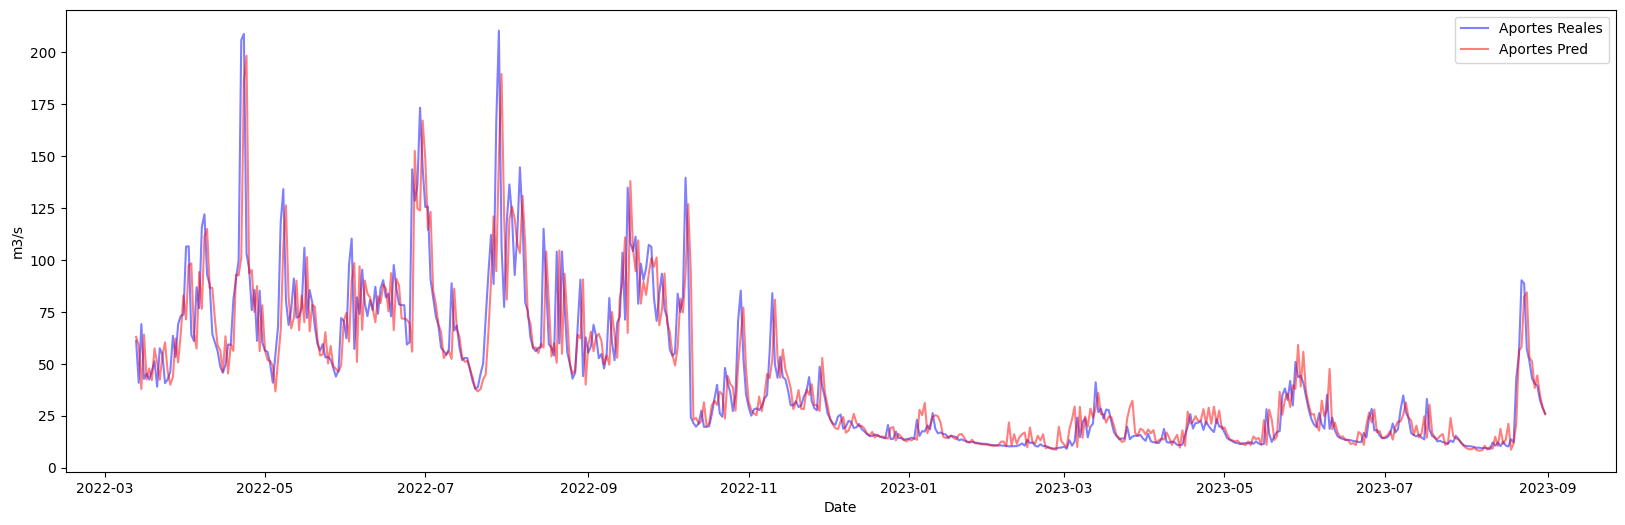

In [24]:
plot_pred_train(solution_PSO)

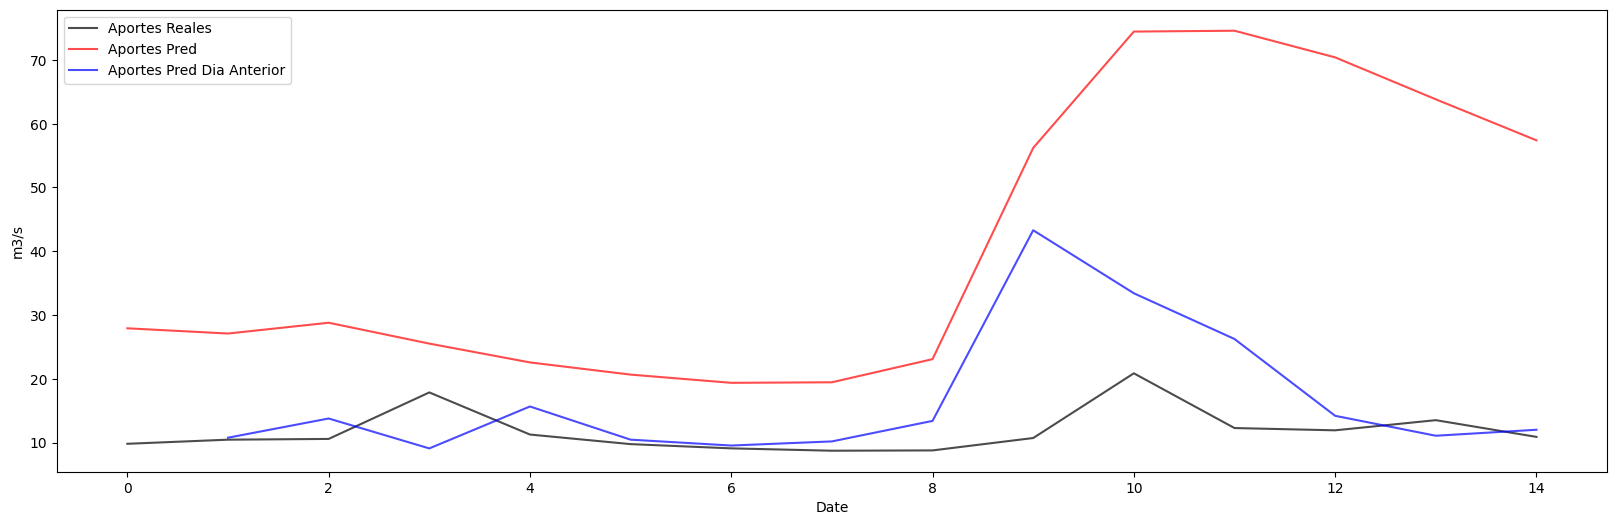

In [44]:
plot_pred_test(solution_PSO)

# 5. ACO: Optimización por Colonia de Hormigas

In [ ]:
parameters_history_ACO = []
solutions_ACO = []
fevalACO = []
for alpha in [0.01,0.1,1]:
    for beta in [0.01,0.1,1]:
        for epoch in [20,50,70]:
            for pop_size in [20,50]:
                parameters_history_ACO.append({'alpha': alpha, 'beta': beta, 'epoch': epoch, 'pop_size': pop_size})

                n_dim=13#df.shape[1]
                problem = {
                    "obj_func": objective_function,
                    "bounds":FloatVar(lb=[-1,]*n_dim,ub=[1,]*n_dim),
                    "minmax": "min",
                }
                ACO_model=ACOR.OriginalACOR(epoch=epoch,pop_size=pop_size)
                ACO_model.solve(problem)
                
                solution_result = ACO_model.g_best.solution
                solutions_ACO.append(solution_result)
                fevalACO.append(objective_function(solution_result))
                print(objective_function(solution_result))

2025-03-01 17:42:09,483 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - Solving single objective optimization problem.
2025-03-01 17:42:09,648 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 1, Current best: 3368.260302022713, Global best: 3368.260302022713, Runtime: 0.15660 seconds
2025-03-01 17:42:09,804 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3368.163133702283, Global best: 3368.163133702283, Runtime: 0.15235 seconds
2025-03-01 17:42:09,908 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3342.288004023792, Global best: 3342.288004023792, Runtime: 0.10037 seconds
2025-03-01 17:42:10,011 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3330.69797707011, Global best: 3330.69797707011, Runtime: 0.10152 seconds
2025-03-01 17:42:10,117 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3330.69797707011, Global

3318.478784544414


2025-03-01 17:42:11,199 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3358.2451320454793, Global best: 3358.2451320454793, Runtime: 0.05219 seconds
2025-03-01 17:42:11,262 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3356.3151316708745, Global best: 3356.3151316708745, Runtime: 0.05929 seconds
2025-03-01 17:42:11,328 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3354.970143155857, Global best: 3354.970143155857, Runtime: 0.06328 seconds
2025-03-01 17:42:11,403 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3348.986880790002, Global best: 3348.986880790002, Runtime: 0.07152 seconds
2025-03-01 17:42:11,484 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3325.214071285356, Global best: 3325.214071285356, Runtime: 0.07631 seconds
2025-03-01 17:42:11,558 - mealpy.swarm_based.ACOR.OriginalACO

3323.523814131143


2025-03-01 17:42:12,548 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3344.6033459136474, Global best: 3344.6033459136474, Runtime: 0.05386 seconds
2025-03-01 17:42:12,610 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3344.6033459136474, Global best: 3344.6033459136474, Runtime: 0.05977 seconds
2025-03-01 17:42:12,664 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3344.3611433091896, Global best: 3344.3611433091896, Runtime: 0.05256 seconds
2025-03-01 17:42:12,722 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3333.0387391985937, Global best: 3333.0387391985937, Runtime: 0.05461 seconds
2025-03-01 17:42:12,792 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3332.633031904306, Global best: 3332.633031904306, Runtime: 0.06900 seconds
2025-03-01 17:42:12,867 - mealpy.swarm_based.ACOR.Origina

3317.662039270156


2025-03-01 17:42:15,850 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3369.3182024785747, Global best: 3369.3182024785747, Runtime: 0.05633 seconds
2025-03-01 17:42:15,911 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3355.002355864672, Global best: 3355.002355864672, Runtime: 0.05596 seconds
2025-03-01 17:42:15,969 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3345.440153910597, Global best: 3345.440153910597, Runtime: 0.05735 seconds
2025-03-01 17:42:16,029 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3342.770027768271, Global best: 3342.770027768271, Runtime: 0.05663 seconds
2025-03-01 17:42:16,084 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3342.770027768271, Global best: 3342.770027768271, Runtime: 0.05337 seconds
2025-03-01 17:42:16,143 - mealpy.swarm_based.ACOR.OriginalACOR 

3318.0389791372395


2025-03-01 17:42:18,893 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3339.7115125563596, Global best: 3339.7115125563596, Runtime: 0.06225 seconds
2025-03-01 17:42:18,944 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3339.7115125563596, Global best: 3339.7115125563596, Runtime: 0.04936 seconds
2025-03-01 17:42:19,002 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3335.2329868864226, Global best: 3335.2329868864226, Runtime: 0.05325 seconds
2025-03-01 17:42:19,055 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3327.064943075633, Global best: 3327.064943075633, Runtime: 0.05036 seconds
2025-03-01 17:42:19,126 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3325.4082978914657, Global best: 3325.4082978914657, Runtime: 0.06910 seconds
2025-03-01 17:42:19,185 - mealpy.swarm_based.ACOR.Origina

3317.498972211605


2025-03-01 17:42:23,045 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3360.029800315137, Global best: 3360.029800315137, Runtime: 0.05599 seconds
2025-03-01 17:42:23,114 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3360.029800315137, Global best: 3360.029800315137, Runtime: 0.06653 seconds
2025-03-01 17:42:23,190 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3360.029800315137, Global best: 3360.029800315137, Runtime: 0.07289 seconds
2025-03-01 17:42:23,249 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3350.257661936664, Global best: 3350.257661936664, Runtime: 0.05504 seconds
2025-03-01 17:42:23,315 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3350.257661936664, Global best: 3350.257661936664, Runtime: 0.06500 seconds
2025-03-01 17:42:23,367 - mealpy.swarm_based.ACOR.OriginalACOR - 

3317.6666673698164


2025-03-01 17:42:28,346 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3342.6136171180037, Global best: 3342.6136171180037, Runtime: 0.07815 seconds
2025-03-01 17:42:28,428 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3342.6136171180037, Global best: 3342.6136171180037, Runtime: 0.08007 seconds
2025-03-01 17:42:28,511 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3337.3079861332353, Global best: 3337.3079861332353, Runtime: 0.08053 seconds
2025-03-01 17:42:28,579 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3337.3079861332353, Global best: 3337.3079861332353, Runtime: 0.06524 seconds
2025-03-01 17:42:28,660 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3336.259114485261, Global best: 3336.259114485261, Runtime: 0.07892 seconds
2025-03-01 17:42:28,763 - mealpy.swarm_based.ACOR.Origina

3319.9371525545907


2025-03-01 17:42:30,211 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3375.612995793088, Global best: 3375.612995793088, Runtime: 0.08073 seconds
2025-03-01 17:42:30,292 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3363.268018536702, Global best: 3363.268018536702, Runtime: 0.07703 seconds
2025-03-01 17:42:30,366 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3363.268018536702, Global best: 3363.268018536702, Runtime: 0.07133 seconds
2025-03-01 17:42:30,456 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3359.8565388648244, Global best: 3359.8565388648244, Runtime: 0.08787 seconds
2025-03-01 17:42:30,526 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3359.8565388648244, Global best: 3359.8565388648244, Runtime: 0.06634 seconds
2025-03-01 17:42:30,616 - mealpy.swarm_based.ACOR.OriginalACO

3325.858460539136


2025-03-01 17:42:31,863 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3378.9561920280607, Global best: 3378.9561920280607, Runtime: 0.21764 seconds
2025-03-01 17:42:32,009 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3326.42449339194, Global best: 3326.42449339194, Runtime: 0.14183 seconds
2025-03-01 17:42:32,155 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3326.42449339194, Global best: 3326.42449339194, Runtime: 0.14158 seconds
2025-03-01 17:42:32,260 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3326.42449339194, Global best: 3326.42449339194, Runtime: 0.09960 seconds
2025-03-01 17:42:32,363 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3326.42449339194, Global best: 3326.42449339194, Runtime: 0.09715 seconds
2025-03-01 17:42:32,473 - mealpy.swarm_based.ACOR.OriginalACOR - INFO -

3318.6030396497604


2025-03-01 17:42:37,542 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3374.902613206612, Global best: 3374.902613206612, Runtime: 0.06268 seconds
2025-03-01 17:42:37,619 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3359.4877903688716, Global best: 3359.4877903688716, Runtime: 0.07330 seconds
2025-03-01 17:42:37,695 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3347.686194370384, Global best: 3347.686194370384, Runtime: 0.07415 seconds
2025-03-01 17:42:37,791 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3347.686194370384, Global best: 3347.686194370384, Runtime: 0.09213 seconds
2025-03-01 17:42:37,897 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3347.686194370384, Global best: 3347.686194370384, Runtime: 0.10122 seconds
2025-03-01 17:42:37,997 - mealpy.swarm_based.ACOR.OriginalACOR 

3318.8279558697513


2025-03-01 17:42:41,346 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3355.0482940071247, Global best: 3355.0482940071247, Runtime: 0.05464 seconds
2025-03-01 17:42:41,434 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3355.0482940071247, Global best: 3355.0482940071247, Runtime: 0.08462 seconds
2025-03-01 17:42:41,517 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3339.002094312432, Global best: 3339.002094312432, Runtime: 0.07780 seconds
2025-03-01 17:42:41,583 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3337.7065926082364, Global best: 3337.7065926082364, Runtime: 0.06271 seconds
2025-03-01 17:42:41,644 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3337.7065926082364, Global best: 3337.7065926082364, Runtime: 0.05917 seconds
2025-03-01 17:42:41,708 - mealpy.swarm_based.ACOR.Origina

3318.5758405318225


2025-03-01 17:42:47,050 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3367.361766924782, Global best: 3367.361766924782, Runtime: 0.16872 seconds
2025-03-01 17:42:47,234 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3367.361766924782, Global best: 3367.361766924782, Runtime: 0.17733 seconds
2025-03-01 17:42:47,342 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3367.361766924782, Global best: 3367.361766924782, Runtime: 0.10435 seconds
2025-03-01 17:42:47,440 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3364.71804780674, Global best: 3364.71804780674, Runtime: 0.09380 seconds
2025-03-01 17:42:47,533 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3361.9903809249213, Global best: 3361.9903809249213, Runtime: 0.08856 seconds
2025-03-01 17:42:47,645 - mealpy.swarm_based.ACOR.OriginalACOR - 

3318.750462243436


2025-03-01 17:42:52,551 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3376.7741568417896, Global best: 3376.7741568417896, Runtime: 0.06435 seconds
2025-03-01 17:42:52,641 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3355.0654036101355, Global best: 3355.0654036101355, Runtime: 0.08671 seconds
2025-03-01 17:42:52,738 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3346.811052258121, Global best: 3346.811052258121, Runtime: 0.09370 seconds
2025-03-01 17:42:52,812 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3344.6525366046258, Global best: 3344.6525366046258, Runtime: 0.07125 seconds
2025-03-01 17:42:52,884 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3340.7423657604204, Global best: 3340.7423657604204, Runtime: 0.06636 seconds
2025-03-01 17:42:52,960 - mealpy.swarm_based.ACOR.Origina

3329.2015620479065


2025-03-01 17:42:54,123 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3355.715217278831, Global best: 3355.715217278831, Runtime: 0.09582 seconds
2025-03-01 17:42:54,228 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3355.715217278831, Global best: 3355.715217278831, Runtime: 0.10198 seconds
2025-03-01 17:42:54,321 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3346.6909514325475, Global best: 3346.6909514325475, Runtime: 0.09013 seconds
2025-03-01 17:42:54,455 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3346.6909514325475, Global best: 3346.6909514325475, Runtime: 0.12866 seconds
2025-03-01 17:42:54,679 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3346.6909514325475, Global best: 3346.6909514325475, Runtime: 0.22006 seconds
2025-03-01 17:42:54,741 - mealpy.swarm_based.ACOR.OriginalA

3335.512038161318


2025-03-01 17:42:56,611 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3384.7035400086634, Global best: 3384.7035400086634, Runtime: 0.09249 seconds
2025-03-01 17:42:56,725 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3381.815408271768, Global best: 3381.815408271768, Runtime: 0.11100 seconds
2025-03-01 17:42:56,847 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3360.858729868649, Global best: 3360.858729868649, Runtime: 0.11791 seconds
2025-03-01 17:42:56,902 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3338.338696058335, Global best: 3338.338696058335, Runtime: 0.05197 seconds
2025-03-01 17:42:56,953 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3338.338696058335, Global best: 3338.338696058335, Runtime: 0.04797 seconds
2025-03-01 17:42:57,005 - mealpy.swarm_based.ACOR.OriginalACOR 

3328.120650776151


2025-03-01 17:42:59,892 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3344.901929778949, Global best: 3344.901929778949, Runtime: 0.08716 seconds
2025-03-01 17:42:59,983 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3344.901929778949, Global best: 3344.901929778949, Runtime: 0.08777 seconds
2025-03-01 17:43:00,115 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3344.901929778949, Global best: 3344.901929778949, Runtime: 0.12901 seconds
2025-03-01 17:43:00,231 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3344.901929778949, Global best: 3344.901929778949, Runtime: 0.10581 seconds
2025-03-01 17:43:00,324 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3337.5201827029546, Global best: 3337.5201827029546, Runtime: 0.09062 seconds
2025-03-01 17:43:00,423 - mealpy.swarm_based.ACOR.OriginalACOR 

3328.6055802467654


2025-03-01 17:43:04,276 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3342.2983867682765, Global best: 3342.2983867682765, Runtime: 0.05833 seconds
2025-03-01 17:43:04,339 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3342.2983867682765, Global best: 3342.2983867682765, Runtime: 0.06143 seconds
2025-03-01 17:43:04,407 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3342.2983867682765, Global best: 3342.2983867682765, Runtime: 0.06637 seconds
2025-03-01 17:43:04,489 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3342.2983867682765, Global best: 3342.2983867682765, Runtime: 0.07779 seconds
2025-03-01 17:43:04,569 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3342.2983867682765, Global best: 3342.2983867682765, Runtime: 0.07769 seconds
2025-03-01 17:43:04,660 - mealpy.swarm_based.ACOR.Origi

3328.0885470320063


2025-03-01 17:43:09,924 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3349.1944394875527, Global best: 3349.1944394875527, Runtime: 0.05473 seconds
2025-03-01 17:43:09,988 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3349.1944394875527, Global best: 3349.1944394875527, Runtime: 0.06173 seconds
2025-03-01 17:43:10,042 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3349.1944394875527, Global best: 3349.1944394875527, Runtime: 0.05018 seconds
2025-03-01 17:43:10,116 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3338.557855590315, Global best: 3338.557855590315, Runtime: 0.07231 seconds
2025-03-01 17:43:10,181 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3338.557855590315, Global best: 3338.557855590315, Runtime: 0.06226 seconds
2025-03-01 17:43:10,234 - mealpy.swarm_based.ACOR.OriginalA

3328.4718471241667


2025-03-01 17:43:14,236 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3378.863244332553, Global best: 3378.863244332553, Runtime: 0.09958 seconds
2025-03-01 17:43:14,326 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3335.903496059682, Global best: 3335.903496059682, Runtime: 0.08815 seconds
2025-03-01 17:43:14,425 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3333.7966426366743, Global best: 3333.7966426366743, Runtime: 0.09577 seconds
2025-03-01 17:43:14,516 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3333.7966426366743, Global best: 3333.7966426366743, Runtime: 0.08868 seconds
2025-03-01 17:43:14,604 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3333.7966426366743, Global best: 3333.7966426366743, Runtime: 0.08431 seconds
2025-03-01 17:43:14,682 - mealpy.swarm_based.ACOR.OriginalA

3319.4884945379226


2025-03-01 17:43:15,626 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3385.6530043632874, Global best: 3385.6530043632874, Runtime: 0.05641 seconds
2025-03-01 17:43:15,684 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3381.4067059112185, Global best: 3381.4067059112185, Runtime: 0.05477 seconds
2025-03-01 17:43:15,736 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3369.0220359587934, Global best: 3369.0220359587934, Runtime: 0.04993 seconds
2025-03-01 17:43:15,786 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3356.225684425982, Global best: 3356.225684425982, Runtime: 0.04712 seconds
2025-03-01 17:43:15,841 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3342.046346103977, Global best: 3342.046346103977, Runtime: 0.05150 seconds
2025-03-01 17:43:15,898 - mealpy.swarm_based.ACOR.OriginalA

3320.79752654016


2025-03-01 17:43:16,843 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3331.309670114238, Global best: 3331.309670114238, Runtime: 0.05862 seconds
2025-03-01 17:43:16,901 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3324.0517166444133, Global best: 3324.0517166444133, Runtime: 0.05449 seconds
2025-03-01 17:43:16,959 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3324.0517166444133, Global best: 3324.0517166444133, Runtime: 0.05464 seconds
2025-03-01 17:43:17,017 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3324.0517166444133, Global best: 3324.0517166444133, Runtime: 0.05421 seconds
2025-03-01 17:43:17,075 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3323.2224913861787, Global best: 3323.2224913861787, Runtime: 0.05480 seconds
2025-03-01 17:43:17,139 - mealpy.swarm_based.ACOR.Origina

3318.5594007837217


2025-03-01 17:43:19,895 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3373.88256696495, Global best: 3373.88256696495, Runtime: 0.04487 seconds
2025-03-01 17:43:19,946 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3370.1104816490138, Global best: 3370.1104816490138, Runtime: 0.04873 seconds
2025-03-01 17:43:20,002 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3370.1104816490138, Global best: 3370.1104816490138, Runtime: 0.05234 seconds
2025-03-01 17:43:20,050 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3363.0161381677353, Global best: 3363.0161381677353, Runtime: 0.04492 seconds
2025-03-01 17:43:20,104 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3356.048820551985, Global best: 3356.048820551985, Runtime: 0.05149 seconds
2025-03-01 17:43:20,163 - mealpy.swarm_based.ACOR.OriginalACO

3319.007759242891


2025-03-01 17:43:22,483 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3339.520077357387, Global best: 3339.520077357387, Runtime: 0.05308 seconds
2025-03-01 17:43:22,616 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3336.271410245413, Global best: 3336.271410245413, Runtime: 0.12945 seconds
2025-03-01 17:43:22,727 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3334.7444757124117, Global best: 3334.7444757124117, Runtime: 0.10576 seconds
2025-03-01 17:43:22,800 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3330.1784412482107, Global best: 3330.1784412482107, Runtime: 0.07017 seconds
2025-03-01 17:43:22,860 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3327.3555997654794, Global best: 3327.3555997654794, Runtime: 0.05798 seconds
2025-03-01 17:43:22,929 - mealpy.swarm_based.ACOR.OriginalA

3318.519072697627


2025-03-01 17:43:26,229 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3355.052375567578, Global best: 3355.052375567578, Runtime: 0.05270 seconds
2025-03-01 17:43:26,283 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3355.052375567578, Global best: 3355.052375567578, Runtime: 0.05217 seconds
2025-03-01 17:43:26,343 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3355.052375567578, Global best: 3355.052375567578, Runtime: 0.05871 seconds
2025-03-01 17:43:26,396 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3349.2196235793626, Global best: 3349.2196235793626, Runtime: 0.04941 seconds
2025-03-01 17:43:26,460 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3349.2196235793626, Global best: 3349.2196235793626, Runtime: 0.06115 seconds
2025-03-01 17:43:26,550 - mealpy.swarm_based.ACOR.OriginalACO

3318.6831822464346


2025-03-01 17:43:30,157 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3361.6182030651084, Global best: 3361.6182030651084, Runtime: 0.08675 seconds
2025-03-01 17:43:30,230 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3358.4481329706014, Global best: 3358.4481329706014, Runtime: 0.06999 seconds
2025-03-01 17:43:30,325 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3339.3467484026914, Global best: 3339.3467484026914, Runtime: 0.08986 seconds
2025-03-01 17:43:30,408 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3335.9545964656045, Global best: 3335.9545964656045, Runtime: 0.08075 seconds
2025-03-01 17:43:30,457 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3335.9545964656045, Global best: 3335.9545964656045, Runtime: 0.04718 seconds
2025-03-01 17:43:30,506 - mealpy.swarm_based.ACOR.Origi

3320.2788972931066


2025-03-01 17:43:31,361 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3364.8239199658515, Global best: 3364.8239199658515, Runtime: 0.04427 seconds
2025-03-01 17:43:31,421 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3355.527716622109, Global best: 3355.527716622109, Runtime: 0.05585 seconds
2025-03-01 17:43:31,464 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3350.073185618967, Global best: 3350.073185618967, Runtime: 0.04204 seconds
2025-03-01 17:43:31,516 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3350.073185618967, Global best: 3350.073185618967, Runtime: 0.04927 seconds
2025-03-01 17:43:31,569 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3337.6693688840187, Global best: 3337.6693688840187, Runtime: 0.05103 seconds
2025-03-01 17:43:31,616 - mealpy.swarm_based.ACOR.OriginalACO

3326.1556865394264


2025-03-01 17:43:32,378 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3366.988525877837, Global best: 3366.988525877837, Runtime: 0.04388 seconds
2025-03-01 17:43:32,424 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3352.244860634903, Global best: 3352.244860634903, Runtime: 0.04321 seconds
2025-03-01 17:43:32,471 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3351.6128406581824, Global best: 3351.6128406581824, Runtime: 0.04493 seconds
2025-03-01 17:43:32,517 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3343.794307095951, Global best: 3343.794307095951, Runtime: 0.04427 seconds
2025-03-01 17:43:32,561 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3340.340325611379, Global best: 3340.340325611379, Runtime: 0.04191 seconds
2025-03-01 17:43:32,608 - mealpy.swarm_based.ACOR.OriginalACOR 

3319.555541460577


2025-03-01 17:43:35,124 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3370.5247298694912, Global best: 3370.5247298694912, Runtime: 0.06510 seconds
2025-03-01 17:43:35,190 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3364.1979841338243, Global best: 3364.1979841338243, Runtime: 0.06310 seconds
2025-03-01 17:43:35,236 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3348.6436784302828, Global best: 3348.6436784302828, Runtime: 0.04283 seconds
2025-03-01 17:43:35,293 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3348.6436784302828, Global best: 3348.6436784302828, Runtime: 0.05449 seconds
2025-03-01 17:43:35,338 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3344.6777352110535, Global best: 3344.6777352110535, Runtime: 0.04366 seconds
2025-03-01 17:43:35,392 - mealpy.swarm_based.ACOR.Origi

3319.841292474055


2025-03-01 17:43:37,905 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3342.7765217816104, Global best: 3342.7765217816104, Runtime: 0.04987 seconds
2025-03-01 17:43:37,955 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3342.7765217816104, Global best: 3342.7765217816104, Runtime: 0.04686 seconds
2025-03-01 17:43:38,008 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3334.4383038365227, Global best: 3334.4383038365227, Runtime: 0.05121 seconds
2025-03-01 17:43:38,053 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3334.4383038365227, Global best: 3334.4383038365227, Runtime: 0.04206 seconds
2025-03-01 17:43:38,110 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3334.4383038365227, Global best: 3334.4383038365227, Runtime: 0.05550 seconds
2025-03-01 17:43:38,160 - mealpy.swarm_based.ACOR.Origi

3319.5289155892597


2025-03-01 17:43:41,474 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3362.1578527462943, Global best: 3362.1578527462943, Runtime: 0.04696 seconds
2025-03-01 17:43:41,527 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3362.1578527462943, Global best: 3362.1578527462943, Runtime: 0.04859 seconds
2025-03-01 17:43:41,584 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3348.6657418439804, Global best: 3348.6657418439804, Runtime: 0.05358 seconds
2025-03-01 17:43:41,631 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3344.6431258884622, Global best: 3344.6431258884622, Runtime: 0.04477 seconds
2025-03-01 17:43:41,681 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3338.1769614658124, Global best: 3338.1769614658124, Runtime: 0.04905 seconds
2025-03-01 17:43:41,734 - mealpy.swarm_based.ACOR.Origi

3319.721208382176


2025-03-01 17:43:45,433 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3349.4349624700476, Global best: 3349.4349624700476, Runtime: 0.05253 seconds
2025-03-01 17:43:45,485 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3343.397819563866, Global best: 3343.397819563866, Runtime: 0.05015 seconds
2025-03-01 17:43:45,532 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3343.397819563866, Global best: 3343.397819563866, Runtime: 0.04520 seconds
2025-03-01 17:43:45,577 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3343.397819563866, Global best: 3343.397819563866, Runtime: 0.04356 seconds
2025-03-01 17:43:45,621 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 9, Current best: 3331.5302252342276, Global best: 3331.5302252342276, Runtime: 0.04249 seconds
2025-03-01 17:43:45,667 - mealpy.swarm_based.ACOR.OriginalACO

3329.9155343757134


2025-03-01 17:43:46,514 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3342.003180041793, Global best: 3342.003180041793, Runtime: 0.04649 seconds
2025-03-01 17:43:46,565 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3342.003180041793, Global best: 3342.003180041793, Runtime: 0.04836 seconds
2025-03-01 17:43:46,610 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3342.003180041793, Global best: 3342.003180041793, Runtime: 0.04178 seconds
2025-03-01 17:43:46,655 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3342.003180041793, Global best: 3342.003180041793, Runtime: 0.04404 seconds
2025-03-01 17:43:46,709 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3342.003180041793, Global best: 3342.003180041793, Runtime: 0.05110 seconds
2025-03-01 17:43:46,755 - mealpy.swarm_based.ACOR.OriginalACOR - 

3333.8492699480566


2025-03-01 17:43:47,519 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3356.6707334581483, Global best: 3356.6707334581483, Runtime: 0.04361 seconds
2025-03-01 17:43:47,563 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3356.6707334581483, Global best: 3356.6707334581483, Runtime: 0.04078 seconds
2025-03-01 17:43:47,611 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3349.4158753693373, Global best: 3349.4158753693373, Runtime: 0.04502 seconds
2025-03-01 17:43:47,650 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3349.4158753693373, Global best: 3349.4158753693373, Runtime: 0.03776 seconds
2025-03-01 17:43:47,705 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3347.5729620479606, Global best: 3347.5729620479606, Runtime: 0.05314 seconds
2025-03-01 17:43:47,744 - mealpy.swarm_based.ACOR.Origi

3329.044865839167


2025-03-01 17:43:50,575 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 1, Current best: 3377.944055343696, Global best: 3377.944055343696, Runtime: 0.19049 seconds
2025-03-01 17:43:50,719 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3377.944055343696, Global best: 3377.944055343696, Runtime: 0.13974 seconds
2025-03-01 17:43:50,846 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3360.8404390065916, Global best: 3360.8404390065916, Runtime: 0.12205 seconds
2025-03-01 17:43:50,932 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3360.8404390065916, Global best: 3360.8404390065916, Runtime: 0.08445 seconds
2025-03-01 17:43:51,061 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3353.844842980694, Global best: 3353.844842980694, Runtime: 0.12492 seconds
2025-03-01 17:43:51,199 - mealpy.swarm_based.ACOR.OriginalACO

3329.4822946936206


2025-03-01 17:43:56,963 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3376.9816205210827, Global best: 3376.9816205210827, Runtime: 0.12921 seconds
2025-03-01 17:43:57,119 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3369.4279504400197, Global best: 3369.4279504400197, Runtime: 0.15083 seconds
2025-03-01 17:43:57,244 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3358.893921046357, Global best: 3358.893921046357, Runtime: 0.12109 seconds
2025-03-01 17:43:57,423 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3358.893921046357, Global best: 3358.893921046357, Runtime: 0.17302 seconds
2025-03-01 17:43:57,546 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3351.7055503933475, Global best: 3351.7055503933475, Runtime: 0.12105 seconds
2025-03-01 17:43:57,680 - mealpy.swarm_based.ACOR.OriginalA

3328.926779650882


2025-03-01 17:44:04,748 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3370.2078583378066, Global best: 3370.2078583378066, Runtime: 0.07528 seconds
2025-03-01 17:44:04,839 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3366.3223449934762, Global best: 3366.3223449934762, Runtime: 0.08903 seconds
2025-03-01 17:44:04,944 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3365.556847028483, Global best: 3365.556847028483, Runtime: 0.10186 seconds
2025-03-01 17:44:05,036 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3361.9187791704776, Global best: 3361.9187791704776, Runtime: 0.08531 seconds
2025-03-01 17:44:05,157 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3356.770614997047, Global best: 3356.770614997047, Runtime: 0.11763 seconds
2025-03-01 17:44:05,237 - mealpy.swarm_based.ACOR.OriginalA

3329.1427523254783


2025-03-01 17:44:11,818 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3341.858980377824, Global best: 3341.858980377824, Runtime: 0.08937 seconds
2025-03-01 17:44:11,889 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3341.858980377824, Global best: 3341.858980377824, Runtime: 0.06837 seconds
2025-03-01 17:44:11,963 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3341.858980377824, Global best: 3341.858980377824, Runtime: 0.07015 seconds
2025-03-01 17:44:12,042 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3336.2576827993503, Global best: 3336.2576827993503, Runtime: 0.07566 seconds
2025-03-01 17:44:12,132 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3336.2576827993503, Global best: 3336.2576827993503, Runtime: 0.08780 seconds
2025-03-01 17:44:12,224 - mealpy.swarm_based.ACOR.OriginalACO

3327.903353348178


2025-03-01 17:44:13,598 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3387.5637647071667, Global best: 3387.5637647071667, Runtime: 0.08349 seconds
2025-03-01 17:44:13,684 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3363.4317793588866, Global best: 3363.4317793588866, Runtime: 0.08065 seconds
2025-03-01 17:44:13,758 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3363.4317793588866, Global best: 3363.4317793588866, Runtime: 0.07109 seconds
2025-03-01 17:44:13,842 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3355.1122858844524, Global best: 3355.1122858844524, Runtime: 0.07997 seconds
2025-03-01 17:44:13,923 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3355.1122858844524, Global best: 3355.1122858844524, Runtime: 0.07876 seconds
2025-03-01 17:44:14,007 - mealpy.swarm_based.ACOR.Origi

3331.023414228647


2025-03-01 17:44:15,155 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3349.5056728965133, Global best: 3349.5056728965133, Runtime: 0.07931 seconds
2025-03-01 17:44:15,229 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3339.6225497375062, Global best: 3339.6225497375062, Runtime: 0.07048 seconds
2025-03-01 17:44:15,289 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3339.6225497375062, Global best: 3339.6225497375062, Runtime: 0.05740 seconds
2025-03-01 17:44:15,359 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3335.4228557897336, Global best: 3335.4228557897336, Runtime: 0.06505 seconds
2025-03-01 17:44:15,425 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 8, Current best: 3335.4228557897336, Global best: 3335.4228557897336, Runtime: 0.06339 seconds
2025-03-01 17:44:15,495 - mealpy.swarm_based.ACOR.Origi

3327.3937945635057


2025-03-01 17:44:18,559 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3387.895884576336, Global best: 3387.895884576336, Runtime: 0.07011 seconds
2025-03-01 17:44:18,625 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3379.2481318347845, Global best: 3379.2481318347845, Runtime: 0.06402 seconds
2025-03-01 17:44:18,690 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3379.2481318347845, Global best: 3379.2481318347845, Runtime: 0.06156 seconds
2025-03-01 17:44:18,762 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3379.2481318347845, Global best: 3379.2481318347845, Runtime: 0.06912 seconds
2025-03-01 17:44:18,845 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3362.1766541962147, Global best: 3362.1766541962147, Runtime: 0.07928 seconds
2025-03-01 17:44:18,915 - mealpy.swarm_based.ACOR.Origina

3327.731381951577


2025-03-01 17:44:22,066 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3381.650071419282, Global best: 3381.650071419282, Runtime: 0.05717 seconds
2025-03-01 17:44:22,145 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3364.363730482352, Global best: 3364.363730482352, Runtime: 0.07662 seconds
2025-03-01 17:44:22,223 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3361.3913355537547, Global best: 3361.3913355537547, Runtime: 0.07450 seconds
2025-03-01 17:44:22,284 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3361.3913355537547, Global best: 3361.3913355537547, Runtime: 0.05612 seconds
2025-03-01 17:44:22,343 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3345.9581448248327, Global best: 3345.9581448248327, Runtime: 0.05528 seconds
2025-03-01 17:44:22,405 - mealpy.swarm_based.ACOR.OriginalA

3327.3312112807903


2025-03-01 17:44:27,367 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3356.976509267535, Global best: 3356.976509267535, Runtime: 0.07209 seconds
2025-03-01 17:44:27,444 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3356.976509267535, Global best: 3356.976509267535, Runtime: 0.07264 seconds
2025-03-01 17:44:27,520 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3356.976509267535, Global best: 3356.976509267535, Runtime: 0.07247 seconds
2025-03-01 17:44:27,591 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3356.976509267535, Global best: 3356.976509267535, Runtime: 0.06736 seconds
2025-03-01 17:44:27,658 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3345.9497946908377, Global best: 3345.9497946908377, Runtime: 0.06370 seconds
2025-03-01 17:44:27,725 - mealpy.swarm_based.ACOR.OriginalACOR 

3327.457345306635


2025-03-01 17:44:32,840 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3378.520720617241, Global best: 3378.520720617241, Runtime: 0.08758 seconds
2025-03-01 17:44:32,903 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3354.2115604546384, Global best: 3354.2115604546384, Runtime: 0.05970 seconds
2025-03-01 17:44:32,974 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3354.2115604546384, Global best: 3354.2115604546384, Runtime: 0.06834 seconds
2025-03-01 17:44:33,050 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3337.4601734600597, Global best: 3337.4601734600597, Runtime: 0.07017 seconds
2025-03-01 17:44:33,140 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3337.4601734600597, Global best: 3337.4601734600597, Runtime: 0.08603 seconds
2025-03-01 17:44:33,216 - mealpy.swarm_based.ACOR.Origina

3328.8816628108416


2025-03-01 17:44:34,380 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3351.495555795907, Global best: 3351.495555795907, Runtime: 0.08574 seconds
2025-03-01 17:44:34,459 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3351.495555795907, Global best: 3351.495555795907, Runtime: 0.07428 seconds
2025-03-01 17:44:34,564 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3351.495555795907, Global best: 3351.495555795907, Runtime: 0.10337 seconds
2025-03-01 17:44:34,639 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3351.495555795907, Global best: 3351.495555795907, Runtime: 0.07126 seconds
2025-03-01 17:44:34,713 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3351.495555795907, Global best: 3351.495555795907, Runtime: 0.06988 seconds
2025-03-01 17:44:34,784 - mealpy.swarm_based.ACOR.OriginalACOR - 

3331.106666969833


2025-03-01 17:44:36,057 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3345.541076196376, Global best: 3345.541076196376, Runtime: 0.06532 seconds
2025-03-01 17:44:36,150 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3345.541076196376, Global best: 3345.541076196376, Runtime: 0.08963 seconds
2025-03-01 17:44:36,227 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3343.890354081842, Global best: 3343.890354081842, Runtime: 0.07486 seconds
2025-03-01 17:44:36,292 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3340.788374309659, Global best: 3340.788374309659, Runtime: 0.06101 seconds
2025-03-01 17:44:36,364 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 7, Current best: 3340.788374309659, Global best: 3340.788374309659, Runtime: 0.07038 seconds
2025-03-01 17:44:36,437 - mealpy.swarm_based.ACOR.OriginalACOR - 

3328.2731413920515


2025-03-01 17:44:39,881 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 2, Current best: 3362.39384892723, Global best: 3362.39384892723, Runtime: 0.09819 seconds
2025-03-01 17:44:39,965 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 3, Current best: 3361.5757829667004, Global best: 3361.5757829667004, Runtime: 0.08053 seconds
2025-03-01 17:44:40,079 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 4, Current best: 3361.5757829667004, Global best: 3361.5757829667004, Runtime: 0.11136 seconds
2025-03-01 17:44:40,193 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 5, Current best: 3361.5757829667004, Global best: 3361.5757829667004, Runtime: 0.10948 seconds
2025-03-01 17:44:40,291 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - >>>Problem: P, Epoch: 6, Current best: 3361.5757829667004, Global best: 3361.5757829667004, Runtime: 0.09517 seconds
2025-03-01 17:44:40,392 - mealpy.swarm_based.ACOR.OriginalA

In [ ]:
best_fevalACO_idx=fevalACO.index(min(fevalACO))
best_solution_ACO = solutions_ACO[best_fevalACO_idx]
print(parameters_history_ACO[best_fevalACO_idx])
print(fevalACO[best_fevalACO_idx])

{'alpha': 0.01, 'beta': 0.01, 'epoch': 70, 'pop_size': 20}
365.1771543549591


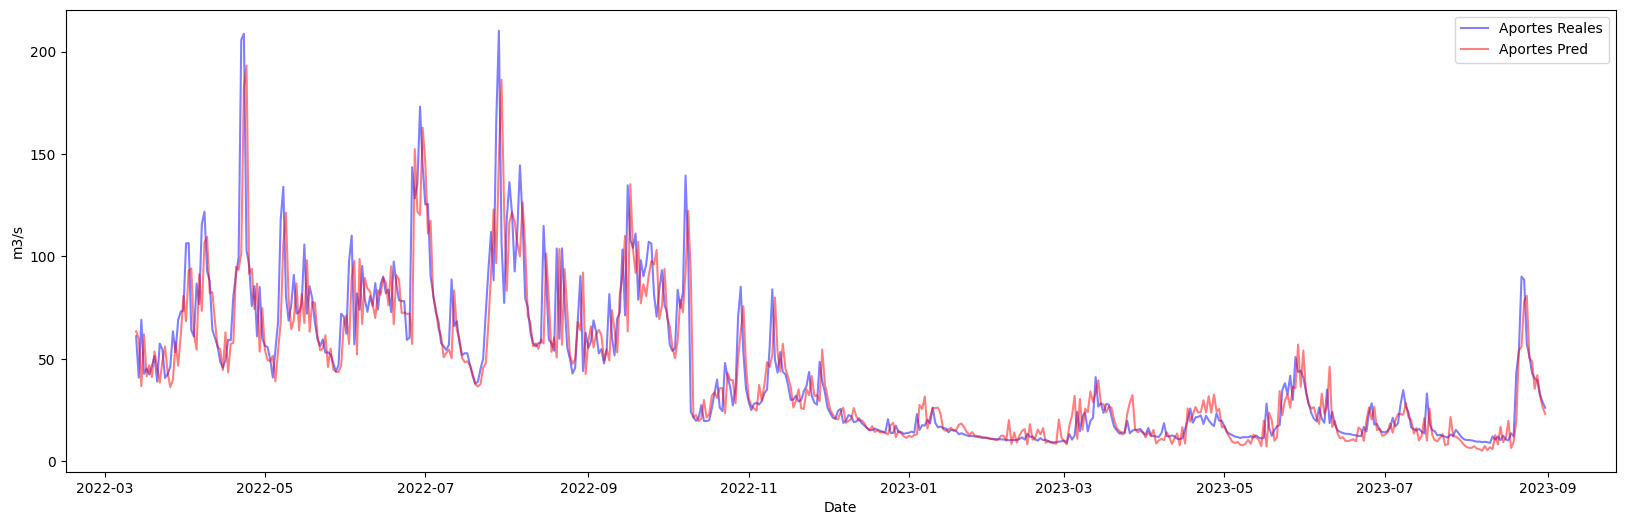

In [ ]:
plot_pred_train(best_solution_ACO)

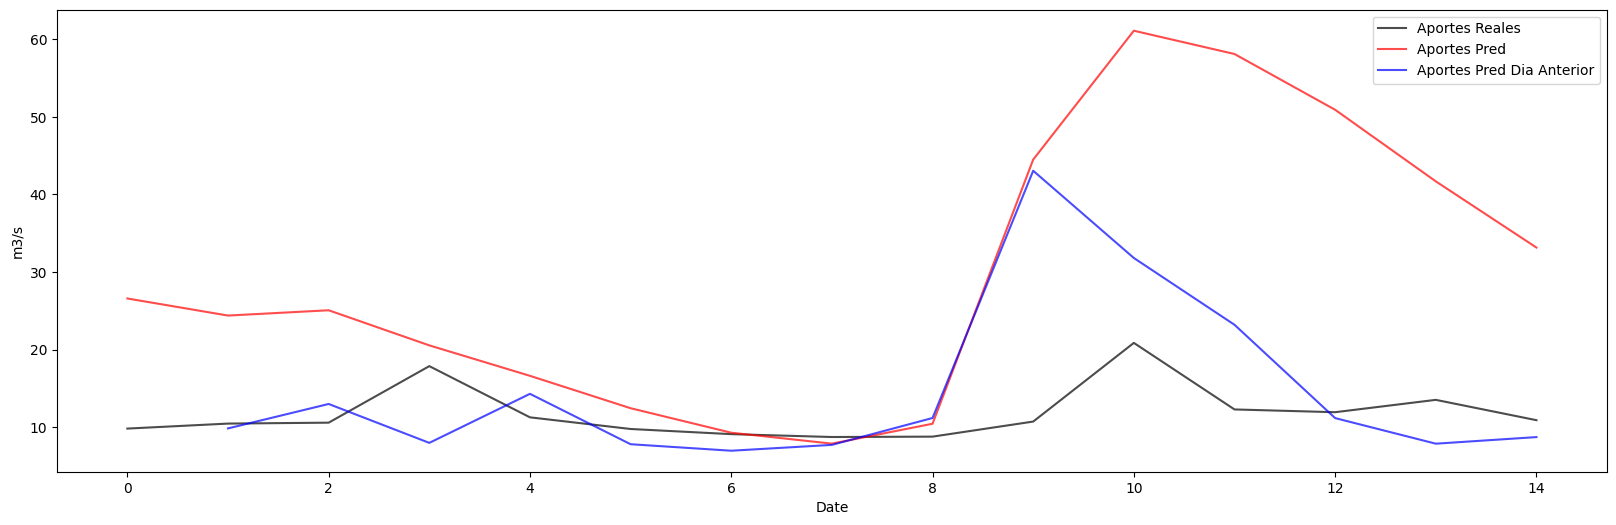

In [ ]:
plot_pred_test(best_solution_ACO)